In [1]:
import compute_charge_dist as fz
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

import PeHeat_Functions as peh
import parametric_fz as fzpar

import MCMCFit as mcmc

%matplotlib inline

microntocm    = 1.0e-4
cmtomicron    = 1.0e4
AAtocm        = 1.0e-8
cmtoAA        = 1.0e8
microntoAA    = 1.0e4
AAtomicron    = 1.0e-4
ergtoeV       = 6.242e11
eVtoerg       = 1.602e-12

hplanck       = 4.135667662e-15 # eV s
clight        = 2.99792458e10   # cm s-1

Loading the library to compute the charge distribution of dust grains.


In [115]:
def Cool_Grain(grain_size, grain_type, ZZ, fdist, ntot, xe, temp):
    """
    Compute the cooling per grain.
    """
    import numpy as np
    import math
    import compute_charge_dist as fz

    tau = grain_size * fz.AAtocm * fz.kb * temp / fz.echarge**2
    
    # Loop over species!
    Cool_spec = 0
    for partner in ["electron", "hydrogen", "carbon"]:
    
        Cool_Zall = 0
        # Loop over charge
        for zi in range(len(ZZ)):

            if partner == "electron":
                nu          = -1*ZZ[zi]
                stick_coef  = fz.get_stickCoef(ZZ[zi], grain_size, grain_type)
                charge_frac = xe
                mass        = fz.me
                
            elif partner == "hydrogen":
                nu         = ZZ[zi]
                stick_coef = 1.0
                charge_frac = xe
                mass        = fz.mH
                
            elif partner == "carbon":
                nu         = ZZ[zi]
                stick_coef = 1.0
                # Maximum fraction of ionized Carbon is 1e-4*ntot.
                charge_frac = min(1.0e-4, xe)
                mass        = fz.mC

            Cooltilde = 1.0

            if nu < 0:
                Cooltilde = fz.Jtilde_neg(tau, nu)
            elif nu == 0:
                Cooltilde = fz.Jtilde_0(tau, nu)
            else:
                Cooltilde = fz.Jtilde_pos(tau, nu)

            Cool_Zhere = fdist[zi]*Cooltilde*fz.kb*temp
            Cool_Zall += Cool_Zhere
            
        #print("Collisional Partner = ", partner)
        Cool_spec += ntot*charge_frac*stick_coef*np.sqrt(8.0*fz.kb*temp/(np.pi*mass))*Cool_Zall
        
    Cool_tot = math.pi * (grain_size*AAtocm)**2 * Cool_spec
    
    return Cool_tot

In [324]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

from scipy.optimize import curve_fit

import time

%matplotlib inline


grain_type = "silicate"
pcent      = 1

########################################################################################

grain_size = 3

save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju/Old_BeforeSept2018"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_00%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist3 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
Qabs3 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")

########################################################################################

grain_size = 5

save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju/Old_BeforeSept2018"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_00%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist5 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
Qabs5 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")

########################################################################################

grain_size =10

#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_00%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist10 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
Qabs10 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")

########################################################################################

grain_size =50

#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_00%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist50 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
Qabs50 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")


########################################################################################

grain_size =100

#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_0%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist100 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
Qabs100 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")

I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Using the absorption efficiency for a 10 AA grain
I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Using the absorption efficiency for a 10 AA grain


IOError: [Errno 2] No such file or directory: '/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju/fz_00100AA_silicate_CR_True_1_pcent.pkl'

In [325]:
########################################################################################

grain_size =100

#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_0%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist100 = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
Qabs100 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")

---

In [326]:
print(cdist100["grain_size"])

100


In [342]:
Cooling3AA = np.zeros_like(cdist3["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist3["nH"])):

    zmin = cdist3["zminmax"][index*2]
    zmax = cdist3["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist3["G"][index] + cdist3["G_CR"][index]

    ntot = cdist3["nH"][index]
    xe   = cdist3["new_xe"][index]
    temp = cdist3["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist3["fdist"][cum:cum+znum]
    cum +=znum
    
    Cooling3AA[index] = Cool_Grain(3.5, grain_type, ZZfz, ffz, ntot, xe, temp)

In [343]:
Cooling5AA = np.zeros_like(cdist5["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist5["nH"])):

    zmin = cdist5["zminmax"][index*2]
    zmax = cdist5["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist5["G"][index] + cdist5["G_CR"][index]

    ntot = cdist5["nH"][index]
    xe   = cdist5["new_xe"][index]
    temp = cdist5["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist5["fdist"][cum:cum+znum]
    cum +=znum
    
    Cooling5AA[index] = Cool_Grain(5.0, grain_type, ZZfz, ffz, ntot, xe, temp)

In [128]:
Cooling10AA = np.zeros_like(cdist10["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist10["nH"])):

    zmin = cdist10["zminmax"][index*2]
    zmax = cdist10["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist10["G"][index] + cdist10["G_CR"][index]

    ntot = cdist10["nH"][index]
    xe   = cdist10["new_xe"][index]
    temp = cdist10["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist10["fdist"][cum:cum+znum]
    cum +=znum
    
    Cooling10AA[index] = Cool_Grain(10.0, grain_type, ZZfz, ffz, ntot, xe, temp)

In [336]:
Cooling50AA = np.zeros_like(cdist50["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist50["nH"])):

    zmin = cdist50["zminmax"][index*2]
    zmax = cdist50["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist50["G"][index] + cdist50["G_CR"][index]

    ntot = cdist50["nH"][index]
    xe   = cdist50["new_xe"][index]
    temp = cdist50["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist50["fdist"][index]
    cum +=znum
    
    #print("Running cell", index)
    
    #print("Input parameters:", grain_size, grain_type, ZZfz, ffz, ntot, xe, temp, Gtot)
    Cooling50AA[index] = Cool_Grain(50.0, grain_type, ZZfz, ffz, ntot, xe, temp)

('Running cell', 0)
('Running cell', 1)
('Running cell', 2)
('Running cell', 3)
('Running cell', 4)
('Running cell', 5)
('Running cell', 6)
('Running cell', 7)
('Running cell', 8)
('Running cell', 9)
('Running cell', 10)
('Running cell', 11)
('Running cell', 12)
('Running cell', 13)
('Running cell', 14)
('Running cell', 15)
('Running cell', 16)
('Running cell', 17)
('Running cell', 18)
('Running cell', 19)
('Running cell', 20)
('Running cell', 21)
('Running cell', 22)
('Running cell', 23)
('Running cell', 24)
('Running cell', 25)
('Running cell', 26)
('Running cell', 27)
('Running cell', 28)
('Running cell', 29)
('Running cell', 30)
('Running cell', 31)
('Running cell', 32)
('Running cell', 33)
('Running cell', 34)
('Running cell', 35)
('Running cell', 36)
('Running cell', 37)
('Running cell', 38)
('Running cell', 39)
('Running cell', 40)
('Running cell', 41)
('Running cell', 42)
('Running cell', 43)
('Running cell', 44)
('Running cell', 45)
('Running cell', 46)
('Running cell', 47)
('

('Running cell', 475)
('Running cell', 476)
('Running cell', 477)
('Running cell', 478)
('Running cell', 479)
('Running cell', 480)
('Running cell', 481)
('Running cell', 482)
('Running cell', 483)
('Running cell', 484)
('Running cell', 485)
('Running cell', 486)
('Running cell', 487)
('Running cell', 488)
('Running cell', 489)
('Running cell', 490)
('Running cell', 491)
('Running cell', 492)
('Running cell', 493)
('Running cell', 494)
('Running cell', 495)
('Running cell', 496)
('Running cell', 497)
('Running cell', 498)
('Running cell', 499)
('Running cell', 500)
('Running cell', 501)
('Running cell', 502)
('Running cell', 503)
('Running cell', 504)
('Running cell', 505)
('Running cell', 506)
('Running cell', 507)
('Running cell', 508)
('Running cell', 509)
('Running cell', 510)
('Running cell', 511)
('Running cell', 512)
('Running cell', 513)
('Running cell', 514)
('Running cell', 515)
('Running cell', 516)
('Running cell', 517)
('Running cell', 518)
('Running cell', 519)
('Running 

('Running cell', 944)
('Running cell', 945)
('Running cell', 946)
('Running cell', 947)
('Running cell', 948)
('Running cell', 949)
('Running cell', 950)
('Running cell', 951)
('Running cell', 952)
('Running cell', 953)
('Running cell', 954)
('Running cell', 955)
('Running cell', 956)
('Running cell', 957)
('Running cell', 958)
('Running cell', 959)
('Running cell', 960)
('Running cell', 961)
('Running cell', 962)
('Running cell', 963)
('Running cell', 964)
('Running cell', 965)
('Running cell', 966)
('Running cell', 967)
('Running cell', 968)
('Running cell', 969)
('Running cell', 970)
('Running cell', 971)
('Running cell', 972)
('Running cell', 973)
('Running cell', 974)
('Running cell', 975)
('Running cell', 976)
('Running cell', 977)
('Running cell', 978)
('Running cell', 979)
('Running cell', 980)
('Running cell', 981)
('Running cell', 982)
('Running cell', 983)
('Running cell', 984)
('Running cell', 985)
('Running cell', 986)
('Running cell', 987)
('Running cell', 988)
('Running 

('Running cell', 1392)
('Running cell', 1393)
('Running cell', 1394)
('Running cell', 1395)
('Running cell', 1396)
('Running cell', 1397)
('Running cell', 1398)
('Running cell', 1399)
('Running cell', 1400)
('Running cell', 1401)
('Running cell', 1402)
('Running cell', 1403)
('Running cell', 1404)
('Running cell', 1405)
('Running cell', 1406)
('Running cell', 1407)
('Running cell', 1408)
('Running cell', 1409)
('Running cell', 1410)
('Running cell', 1411)
('Running cell', 1412)
('Running cell', 1413)
('Running cell', 1414)
('Running cell', 1415)
('Running cell', 1416)
('Running cell', 1417)
('Running cell', 1418)
('Running cell', 1419)
('Running cell', 1420)
('Running cell', 1421)
('Running cell', 1422)
('Running cell', 1423)
('Running cell', 1424)
('Running cell', 1425)
('Running cell', 1426)
('Running cell', 1427)
('Running cell', 1428)
('Running cell', 1429)
('Running cell', 1430)
('Running cell', 1431)
('Running cell', 1432)
('Running cell', 1433)
('Running cell', 1434)
('Running c

('Running cell', 1757)
('Running cell', 1758)
('Running cell', 1759)
('Running cell', 1760)
('Running cell', 1761)
('Running cell', 1762)
('Running cell', 1763)
('Running cell', 1764)
('Running cell', 1765)
('Running cell', 1766)
('Running cell', 1767)
('Running cell', 1768)
('Running cell', 1769)
('Running cell', 1770)
('Running cell', 1771)
('Running cell', 1772)
('Running cell', 1773)
('Running cell', 1774)
('Running cell', 1775)
('Running cell', 1776)
('Running cell', 1777)
('Running cell', 1778)
('Running cell', 1779)
('Running cell', 1780)
('Running cell', 1781)
('Running cell', 1782)
('Running cell', 1783)
('Running cell', 1784)
('Running cell', 1785)
('Running cell', 1786)
('Running cell', 1787)
('Running cell', 1788)
('Running cell', 1789)
('Running cell', 1790)
('Running cell', 1791)
('Running cell', 1792)
('Running cell', 1793)
('Running cell', 1794)
('Running cell', 1795)
('Running cell', 1796)
('Running cell', 1797)
('Running cell', 1798)
('Running cell', 1799)
('Running c

('Running cell', 2241)
('Running cell', 2242)
('Running cell', 2243)
('Running cell', 2244)
('Running cell', 2245)
('Running cell', 2246)
('Running cell', 2247)
('Running cell', 2248)
('Running cell', 2249)
('Running cell', 2250)
('Running cell', 2251)
('Running cell', 2252)
('Running cell', 2253)
('Running cell', 2254)
('Running cell', 2255)
('Running cell', 2256)
('Running cell', 2257)
('Running cell', 2258)
('Running cell', 2259)
('Running cell', 2260)
('Running cell', 2261)
('Running cell', 2262)
('Running cell', 2263)
('Running cell', 2264)
('Running cell', 2265)
('Running cell', 2266)
('Running cell', 2267)
('Running cell', 2268)
('Running cell', 2269)
('Running cell', 2270)
('Running cell', 2271)
('Running cell', 2272)
('Running cell', 2273)
('Running cell', 2274)
('Running cell', 2275)
('Running cell', 2276)
('Running cell', 2277)
('Running cell', 2278)
('Running cell', 2279)
('Running cell', 2280)
('Running cell', 2281)
('Running cell', 2282)
('Running cell', 2283)
('Running c

('Running cell', 2681)
('Running cell', 2682)
('Running cell', 2683)
('Running cell', 2684)
('Running cell', 2685)
('Running cell', 2686)
('Running cell', 2687)
('Running cell', 2688)
('Running cell', 2689)
('Running cell', 2690)
('Running cell', 2691)
('Running cell', 2692)
('Running cell', 2693)
('Running cell', 2694)
('Running cell', 2695)
('Running cell', 2696)
('Running cell', 2697)
('Running cell', 2698)
('Running cell', 2699)
('Running cell', 2700)
('Running cell', 2701)
('Running cell', 2702)
('Running cell', 2703)
('Running cell', 2704)
('Running cell', 2705)
('Running cell', 2706)
('Running cell', 2707)
('Running cell', 2708)
('Running cell', 2709)
('Running cell', 2710)
('Running cell', 2711)
('Running cell', 2712)
('Running cell', 2713)
('Running cell', 2714)
('Running cell', 2715)
('Running cell', 2716)
('Running cell', 2717)
('Running cell', 2718)
('Running cell', 2719)
('Running cell', 2720)
('Running cell', 2721)
('Running cell', 2722)
('Running cell', 2723)
('Running c

('Running cell', 3144)
('Running cell', 3145)
('Running cell', 3146)
('Running cell', 3147)
('Running cell', 3148)
('Running cell', 3149)
('Running cell', 3150)
('Running cell', 3151)
('Running cell', 3152)
('Running cell', 3153)
('Running cell', 3154)
('Running cell', 3155)
('Running cell', 3156)
('Running cell', 3157)
('Running cell', 3158)
('Running cell', 3159)
('Running cell', 3160)
('Running cell', 3161)
('Running cell', 3162)
('Running cell', 3163)
('Running cell', 3164)
('Running cell', 3165)
('Running cell', 3166)
('Running cell', 3167)
('Running cell', 3168)
('Running cell', 3169)
('Running cell', 3170)
('Running cell', 3171)
('Running cell', 3172)
('Running cell', 3173)
('Running cell', 3174)
('Running cell', 3175)
('Running cell', 3176)
('Running cell', 3177)
('Running cell', 3178)
('Running cell', 3179)
('Running cell', 3180)
('Running cell', 3181)
('Running cell', 3182)
('Running cell', 3183)
('Running cell', 3184)
('Running cell', 3185)
('Running cell', 3186)
('Running c

('Running cell', 3607)
('Running cell', 3608)
('Running cell', 3609)
('Running cell', 3610)
('Running cell', 3611)
('Running cell', 3612)
('Running cell', 3613)
('Running cell', 3614)
('Running cell', 3615)
('Running cell', 3616)
('Running cell', 3617)
('Running cell', 3618)
('Running cell', 3619)
('Running cell', 3620)
('Running cell', 3621)
('Running cell', 3622)
('Running cell', 3623)
('Running cell', 3624)
('Running cell', 3625)
('Running cell', 3626)
('Running cell', 3627)
('Running cell', 3628)
('Running cell', 3629)
('Running cell', 3630)
('Running cell', 3631)
('Running cell', 3632)
('Running cell', 3633)
('Running cell', 3634)
('Running cell', 3635)
('Running cell', 3636)
('Running cell', 3637)
('Running cell', 3638)
('Running cell', 3639)
('Running cell', 3640)
('Running cell', 3641)
('Running cell', 3642)
('Running cell', 3643)
('Running cell', 3644)
('Running cell', 3645)
('Running cell', 3646)
('Running cell', 3647)
('Running cell', 3648)
('Running cell', 3649)
('Running c

('Running cell', 4108)
('Running cell', 4109)
('Running cell', 4110)
('Running cell', 4111)
('Running cell', 4112)
('Running cell', 4113)
('Running cell', 4114)
('Running cell', 4115)
('Running cell', 4116)
('Running cell', 4117)
('Running cell', 4118)
('Running cell', 4119)
('Running cell', 4120)
('Running cell', 4121)
('Running cell', 4122)
('Running cell', 4123)
('Running cell', 4124)
('Running cell', 4125)
('Running cell', 4126)
('Running cell', 4127)
('Running cell', 4128)
('Running cell', 4129)
('Running cell', 4130)
('Running cell', 4131)
('Running cell', 4132)
('Running cell', 4133)
('Running cell', 4134)
('Running cell', 4135)
('Running cell', 4136)
('Running cell', 4137)
('Running cell', 4138)
('Running cell', 4139)
('Running cell', 4140)
('Running cell', 4141)
('Running cell', 4142)
('Running cell', 4143)
('Running cell', 4144)
('Running cell', 4145)
('Running cell', 4146)
('Running cell', 4147)
('Running cell', 4148)
('Running cell', 4149)
('Running cell', 4150)
('Running c

('Running cell', 4511)
('Running cell', 4512)
('Running cell', 4513)
('Running cell', 4514)
('Running cell', 4515)
('Running cell', 4516)
('Running cell', 4517)
('Running cell', 4518)
('Running cell', 4519)
('Running cell', 4520)
('Running cell', 4521)
('Running cell', 4522)
('Running cell', 4523)
('Running cell', 4524)
('Running cell', 4525)
('Running cell', 4526)
('Running cell', 4527)
('Running cell', 4528)
('Running cell', 4529)
('Running cell', 4530)
('Running cell', 4531)
('Running cell', 4532)
('Running cell', 4533)
('Running cell', 4534)
('Running cell', 4535)
('Running cell', 4536)
('Running cell', 4537)
('Running cell', 4538)
('Running cell', 4539)
('Running cell', 4540)
('Running cell', 4541)
('Running cell', 4542)
('Running cell', 4543)
('Running cell', 4544)
('Running cell', 4545)
('Running cell', 4546)
('Running cell', 4547)
('Running cell', 4548)
('Running cell', 4549)
('Running cell', 4550)
('Running cell', 4551)
('Running cell', 4552)
('Running cell', 4553)
('Running c

('Running cell', 4878)
('Running cell', 4879)
('Running cell', 4880)
('Running cell', 4881)
('Running cell', 4882)
('Running cell', 4883)
('Running cell', 4884)
('Running cell', 4885)
('Running cell', 4886)
('Running cell', 4887)
('Running cell', 4888)
('Running cell', 4889)
('Running cell', 4890)
('Running cell', 4891)
('Running cell', 4892)
('Running cell', 4893)
('Running cell', 4894)
('Running cell', 4895)
('Running cell', 4896)
('Running cell', 4897)
('Running cell', 4898)
('Running cell', 4899)
('Running cell', 4900)
('Running cell', 4901)
('Running cell', 4902)
('Running cell', 4903)
('Running cell', 4904)
('Running cell', 4905)
('Running cell', 4906)
('Running cell', 4907)
('Running cell', 4908)
('Running cell', 4909)
('Running cell', 4910)
('Running cell', 4911)
('Running cell', 4912)
('Running cell', 4913)
('Running cell', 4914)
('Running cell', 4915)
('Running cell', 4916)
('Running cell', 4917)
('Running cell', 4918)
('Running cell', 4919)
('Running cell', 4920)
('Running c

('Running cell', 5347)
('Running cell', 5348)
('Running cell', 5349)
('Running cell', 5350)
('Running cell', 5351)
('Running cell', 5352)
('Running cell', 5353)
('Running cell', 5354)
('Running cell', 5355)
('Running cell', 5356)
('Running cell', 5357)
('Running cell', 5358)
('Running cell', 5359)
('Running cell', 5360)
('Running cell', 5361)
('Running cell', 5362)
('Running cell', 5363)
('Running cell', 5364)
('Running cell', 5365)
('Running cell', 5366)
('Running cell', 5367)
('Running cell', 5368)
('Running cell', 5369)
('Running cell', 5370)
('Running cell', 5371)
('Running cell', 5372)
('Running cell', 5373)
('Running cell', 5374)
('Running cell', 5375)
('Running cell', 5376)
('Running cell', 5377)
('Running cell', 5378)
('Running cell', 5379)
('Running cell', 5380)
('Running cell', 5381)
('Running cell', 5382)
('Running cell', 5383)
('Running cell', 5384)
('Running cell', 5385)
('Running cell', 5386)
('Running cell', 5387)
('Running cell', 5388)
('Running cell', 5389)
('Running c

('Running cell', 5705)
('Running cell', 5706)
('Running cell', 5707)
('Running cell', 5708)
('Running cell', 5709)
('Running cell', 5710)
('Running cell', 5711)
('Running cell', 5712)
('Running cell', 5713)
('Running cell', 5714)
('Running cell', 5715)
('Running cell', 5716)
('Running cell', 5717)
('Running cell', 5718)
('Running cell', 5719)
('Running cell', 5720)
('Running cell', 5721)
('Running cell', 5722)
('Running cell', 5723)
('Running cell', 5724)
('Running cell', 5725)
('Running cell', 5726)
('Running cell', 5727)
('Running cell', 5728)
('Running cell', 5729)
('Running cell', 5730)
('Running cell', 5731)
('Running cell', 5732)
('Running cell', 5733)
('Running cell', 5734)
('Running cell', 5735)
('Running cell', 5736)
('Running cell', 5737)
('Running cell', 5738)
('Running cell', 5739)
('Running cell', 5740)
('Running cell', 5741)
('Running cell', 5742)
('Running cell', 5743)
('Running cell', 5744)
('Running cell', 5745)
('Running cell', 5746)
('Running cell', 5747)
('Running c

('Running cell', 6138)
('Running cell', 6139)
('Running cell', 6140)
('Running cell', 6141)
('Running cell', 6142)
('Running cell', 6143)
('Running cell', 6144)
('Running cell', 6145)
('Running cell', 6146)
('Running cell', 6147)
('Running cell', 6148)
('Running cell', 6149)
('Running cell', 6150)
('Running cell', 6151)
('Running cell', 6152)
('Running cell', 6153)
('Running cell', 6154)
('Running cell', 6155)
('Running cell', 6156)
('Running cell', 6157)
('Running cell', 6158)
('Running cell', 6159)
('Running cell', 6160)
('Running cell', 6161)
('Running cell', 6162)
('Running cell', 6163)
('Running cell', 6164)
('Running cell', 6165)
('Running cell', 6166)
('Running cell', 6167)
('Running cell', 6168)
('Running cell', 6169)
('Running cell', 6170)
('Running cell', 6171)
('Running cell', 6172)
('Running cell', 6173)
('Running cell', 6174)
('Running cell', 6175)
('Running cell', 6176)
('Running cell', 6177)
('Running cell', 6178)
('Running cell', 6179)
('Running cell', 6180)
('Running c

('Running cell', 6559)
('Running cell', 6560)
('Running cell', 6561)
('Running cell', 6562)
('Running cell', 6563)
('Running cell', 6564)
('Running cell', 6565)
('Running cell', 6566)
('Running cell', 6567)
('Running cell', 6568)
('Running cell', 6569)
('Running cell', 6570)
('Running cell', 6571)
('Running cell', 6572)
('Running cell', 6573)
('Running cell', 6574)
('Running cell', 6575)
('Running cell', 6576)
('Running cell', 6577)
('Running cell', 6578)
('Running cell', 6579)
('Running cell', 6580)
('Running cell', 6581)
('Running cell', 6582)
('Running cell', 6583)
('Running cell', 6584)
('Running cell', 6585)
('Running cell', 6586)
('Running cell', 6587)
('Running cell', 6588)
('Running cell', 6589)
('Running cell', 6590)
('Running cell', 6591)
('Running cell', 6592)
('Running cell', 6593)
('Running cell', 6594)
('Running cell', 6595)
('Running cell', 6596)
('Running cell', 6597)
('Running cell', 6598)
('Running cell', 6599)
('Running cell', 6600)
('Running cell', 6601)
('Running c

('Running cell', 7011)
('Running cell', 7012)
('Running cell', 7013)
('Running cell', 7014)
('Running cell', 7015)
('Running cell', 7016)
('Running cell', 7017)
('Running cell', 7018)
('Running cell', 7019)
('Running cell', 7020)
('Running cell', 7021)
('Running cell', 7022)
('Running cell', 7023)
('Running cell', 7024)
('Running cell', 7025)
('Running cell', 7026)
('Running cell', 7027)
('Running cell', 7028)
('Running cell', 7029)
('Running cell', 7030)
('Running cell', 7031)
('Running cell', 7032)
('Running cell', 7033)
('Running cell', 7034)
('Running cell', 7035)
('Running cell', 7036)
('Running cell', 7037)
('Running cell', 7038)
('Running cell', 7039)
('Running cell', 7040)
('Running cell', 7041)
('Running cell', 7042)
('Running cell', 7043)
('Running cell', 7044)
('Running cell', 7045)
('Running cell', 7046)
('Running cell', 7047)
('Running cell', 7048)
('Running cell', 7049)
('Running cell', 7050)
('Running cell', 7051)
('Running cell', 7052)
('Running cell', 7053)
('Running c

('Running cell', 7431)
('Running cell', 7432)
('Running cell', 7433)
('Running cell', 7434)
('Running cell', 7435)
('Running cell', 7436)
('Running cell', 7437)
('Running cell', 7438)
('Running cell', 7439)
('Running cell', 7440)
('Running cell', 7441)
('Running cell', 7442)
('Running cell', 7443)
('Running cell', 7444)
('Running cell', 7445)
('Running cell', 7446)
('Running cell', 7447)
('Running cell', 7448)
('Running cell', 7449)
('Running cell', 7450)
('Running cell', 7451)
('Running cell', 7452)
('Running cell', 7453)
('Running cell', 7454)
('Running cell', 7455)
('Running cell', 7456)
('Running cell', 7457)
('Running cell', 7458)
('Running cell', 7459)
('Running cell', 7460)
('Running cell', 7461)
('Running cell', 7462)
('Running cell', 7463)
('Running cell', 7464)
('Running cell', 7465)
('Running cell', 7466)
('Running cell', 7467)
('Running cell', 7468)
('Running cell', 7469)
('Running cell', 7470)
('Running cell', 7471)
('Running cell', 7472)
('Running cell', 7473)
('Running c

('Running cell', 7890)
('Running cell', 7891)
('Running cell', 7892)
('Running cell', 7893)
('Running cell', 7894)
('Running cell', 7895)
('Running cell', 7896)
('Running cell', 7897)
('Running cell', 7898)
('Running cell', 7899)
('Running cell', 7900)
('Running cell', 7901)
('Running cell', 7902)
('Running cell', 7903)
('Running cell', 7904)
('Running cell', 7905)
('Running cell', 7906)
('Running cell', 7907)
('Running cell', 7908)
('Running cell', 7909)
('Running cell', 7910)
('Running cell', 7911)
('Running cell', 7912)
('Running cell', 7913)
('Running cell', 7914)
('Running cell', 7915)
('Running cell', 7916)
('Running cell', 7917)
('Running cell', 7918)
('Running cell', 7919)
('Running cell', 7920)
('Running cell', 7921)
('Running cell', 7922)
('Running cell', 7923)
('Running cell', 7924)
('Running cell', 7925)
('Running cell', 7926)
('Running cell', 7927)
('Running cell', 7928)
('Running cell', 7929)
('Running cell', 7930)
('Running cell', 7931)
('Running cell', 7932)
('Running c

('Running cell', 8314)
('Running cell', 8315)
('Running cell', 8316)
('Running cell', 8317)
('Running cell', 8318)
('Running cell', 8319)
('Running cell', 8320)
('Running cell', 8321)
('Running cell', 8322)
('Running cell', 8323)
('Running cell', 8324)
('Running cell', 8325)
('Running cell', 8326)
('Running cell', 8327)
('Running cell', 8328)
('Running cell', 8329)
('Running cell', 8330)
('Running cell', 8331)
('Running cell', 8332)
('Running cell', 8333)
('Running cell', 8334)
('Running cell', 8335)
('Running cell', 8336)
('Running cell', 8337)
('Running cell', 8338)
('Running cell', 8339)
('Running cell', 8340)
('Running cell', 8341)
('Running cell', 8342)
('Running cell', 8343)
('Running cell', 8344)
('Running cell', 8345)
('Running cell', 8346)
('Running cell', 8347)
('Running cell', 8348)
('Running cell', 8349)
('Running cell', 8350)
('Running cell', 8351)
('Running cell', 8352)
('Running cell', 8353)
('Running cell', 8354)
('Running cell', 8355)
('Running cell', 8356)
('Running c

('Running cell', 8738)
('Running cell', 8739)
('Running cell', 8740)
('Running cell', 8741)
('Running cell', 8742)
('Running cell', 8743)
('Running cell', 8744)
('Running cell', 8745)
('Running cell', 8746)
('Running cell', 8747)
('Running cell', 8748)
('Running cell', 8749)
('Running cell', 8750)
('Running cell', 8751)
('Running cell', 8752)
('Running cell', 8753)
('Running cell', 8754)
('Running cell', 8755)
('Running cell', 8756)
('Running cell', 8757)
('Running cell', 8758)
('Running cell', 8759)
('Running cell', 8760)
('Running cell', 8761)
('Running cell', 8762)
('Running cell', 8763)
('Running cell', 8764)
('Running cell', 8765)
('Running cell', 8766)
('Running cell', 8767)
('Running cell', 8768)
('Running cell', 8769)
('Running cell', 8770)
('Running cell', 8771)
('Running cell', 8772)
('Running cell', 8773)
('Running cell', 8774)
('Running cell', 8775)
('Running cell', 8776)
('Running cell', 8777)
('Running cell', 8778)
('Running cell', 8779)
('Running cell', 8780)
('Running c

('Running cell', 9163)
('Running cell', 9164)
('Running cell', 9165)
('Running cell', 9166)
('Running cell', 9167)
('Running cell', 9168)
('Running cell', 9169)
('Running cell', 9170)
('Running cell', 9171)
('Running cell', 9172)
('Running cell', 9173)
('Running cell', 9174)
('Running cell', 9175)
('Running cell', 9176)
('Running cell', 9177)
('Running cell', 9178)
('Running cell', 9179)
('Running cell', 9180)
('Running cell', 9181)
('Running cell', 9182)
('Running cell', 9183)
('Running cell', 9184)
('Running cell', 9185)
('Running cell', 9186)
('Running cell', 9187)
('Running cell', 9188)
('Running cell', 9189)
('Running cell', 9190)
('Running cell', 9191)
('Running cell', 9192)
('Running cell', 9193)
('Running cell', 9194)
('Running cell', 9195)
('Running cell', 9196)
('Running cell', 9197)
('Running cell', 9198)
('Running cell', 9199)
('Running cell', 9200)
('Running cell', 9201)
('Running cell', 9202)
('Running cell', 9203)
('Running cell', 9204)
('Running cell', 9205)
('Running c

('Running cell', 9634)
('Running cell', 9635)
('Running cell', 9636)
('Running cell', 9637)
('Running cell', 9638)
('Running cell', 9639)
('Running cell', 9640)
('Running cell', 9641)
('Running cell', 9642)
('Running cell', 9643)
('Running cell', 9644)
('Running cell', 9645)
('Running cell', 9646)
('Running cell', 9647)
('Running cell', 9648)
('Running cell', 9649)
('Running cell', 9650)
('Running cell', 9651)
('Running cell', 9652)
('Running cell', 9653)
('Running cell', 9654)
('Running cell', 9655)
('Running cell', 9656)
('Running cell', 9657)
('Running cell', 9658)
('Running cell', 9659)
('Running cell', 9660)
('Running cell', 9661)
('Running cell', 9662)
('Running cell', 9663)
('Running cell', 9664)
('Running cell', 9665)
('Running cell', 9666)
('Running cell', 9667)
('Running cell', 9668)
('Running cell', 9669)
('Running cell', 9670)
('Running cell', 9671)
('Running cell', 9672)
('Running cell', 9673)
('Running cell', 9674)
('Running cell', 9675)
('Running cell', 9676)
('Running c

('Running cell', 10093)
('Running cell', 10094)
('Running cell', 10095)
('Running cell', 10096)
('Running cell', 10097)
('Running cell', 10098)
('Running cell', 10099)
('Running cell', 10100)
('Running cell', 10101)
('Running cell', 10102)
('Running cell', 10103)
('Running cell', 10104)
('Running cell', 10105)
('Running cell', 10106)
('Running cell', 10107)
('Running cell', 10108)
('Running cell', 10109)
('Running cell', 10110)
('Running cell', 10111)
('Running cell', 10112)
('Running cell', 10113)
('Running cell', 10114)
('Running cell', 10115)
('Running cell', 10116)
('Running cell', 10117)
('Running cell', 10118)
('Running cell', 10119)
('Running cell', 10120)
('Running cell', 10121)
('Running cell', 10122)
('Running cell', 10123)
('Running cell', 10124)
('Running cell', 10125)
('Running cell', 10126)
('Running cell', 10127)
('Running cell', 10128)
('Running cell', 10129)
('Running cell', 10130)
('Running cell', 10131)
('Running cell', 10132)
('Running cell', 10133)
('Running cell',

('Running cell', 10498)
('Running cell', 10499)
('Running cell', 10500)
('Running cell', 10501)
('Running cell', 10502)
('Running cell', 10503)
('Running cell', 10504)
('Running cell', 10505)
('Running cell', 10506)
('Running cell', 10507)
('Running cell', 10508)
('Running cell', 10509)
('Running cell', 10510)
('Running cell', 10511)
('Running cell', 10512)
('Running cell', 10513)
('Running cell', 10514)
('Running cell', 10515)
('Running cell', 10516)
('Running cell', 10517)
('Running cell', 10518)
('Running cell', 10519)
('Running cell', 10520)
('Running cell', 10521)
('Running cell', 10522)
('Running cell', 10523)
('Running cell', 10524)
('Running cell', 10525)
('Running cell', 10526)
('Running cell', 10527)
('Running cell', 10528)
('Running cell', 10529)
('Running cell', 10530)
('Running cell', 10531)
('Running cell', 10532)
('Running cell', 10533)
('Running cell', 10534)
('Running cell', 10535)
('Running cell', 10536)
('Running cell', 10537)
('Running cell', 10538)
('Running cell',

('Running cell', 10963)
('Running cell', 10964)
('Running cell', 10965)
('Running cell', 10966)
('Running cell', 10967)
('Running cell', 10968)
('Running cell', 10969)
('Running cell', 10970)
('Running cell', 10971)
('Running cell', 10972)
('Running cell', 10973)
('Running cell', 10974)
('Running cell', 10975)
('Running cell', 10976)
('Running cell', 10977)
('Running cell', 10978)
('Running cell', 10979)
('Running cell', 10980)
('Running cell', 10981)
('Running cell', 10982)
('Running cell', 10983)
('Running cell', 10984)
('Running cell', 10985)
('Running cell', 10986)
('Running cell', 10987)
('Running cell', 10988)
('Running cell', 10989)
('Running cell', 10990)
('Running cell', 10991)
('Running cell', 10992)
('Running cell', 10993)
('Running cell', 10994)
('Running cell', 10995)
('Running cell', 10996)
('Running cell', 10997)
('Running cell', 10998)
('Running cell', 10999)
('Running cell', 11000)
('Running cell', 11001)
('Running cell', 11002)
('Running cell', 11003)
('Running cell',

('Running cell', 11417)
('Running cell', 11418)
('Running cell', 11419)
('Running cell', 11420)
('Running cell', 11421)
('Running cell', 11422)
('Running cell', 11423)
('Running cell', 11424)
('Running cell', 11425)
('Running cell', 11426)
('Running cell', 11427)
('Running cell', 11428)
('Running cell', 11429)
('Running cell', 11430)
('Running cell', 11431)
('Running cell', 11432)
('Running cell', 11433)
('Running cell', 11434)
('Running cell', 11435)
('Running cell', 11436)
('Running cell', 11437)
('Running cell', 11438)
('Running cell', 11439)
('Running cell', 11440)
('Running cell', 11441)
('Running cell', 11442)
('Running cell', 11443)
('Running cell', 11444)
('Running cell', 11445)
('Running cell', 11446)
('Running cell', 11447)
('Running cell', 11448)
('Running cell', 11449)
('Running cell', 11450)
('Running cell', 11451)
('Running cell', 11452)
('Running cell', 11453)
('Running cell', 11454)
('Running cell', 11455)
('Running cell', 11456)
('Running cell', 11457)
('Running cell',

('Running cell', 11866)
('Running cell', 11867)
('Running cell', 11868)
('Running cell', 11869)
('Running cell', 11870)
('Running cell', 11871)
('Running cell', 11872)
('Running cell', 11873)
('Running cell', 11874)
('Running cell', 11875)
('Running cell', 11876)
('Running cell', 11877)
('Running cell', 11878)
('Running cell', 11879)
('Running cell', 11880)
('Running cell', 11881)
('Running cell', 11882)
('Running cell', 11883)
('Running cell', 11884)
('Running cell', 11885)
('Running cell', 11886)
('Running cell', 11887)
('Running cell', 11888)
('Running cell', 11889)
('Running cell', 11890)
('Running cell', 11891)
('Running cell', 11892)
('Running cell', 11893)
('Running cell', 11894)
('Running cell', 11895)
('Running cell', 11896)
('Running cell', 11897)
('Running cell', 11898)
('Running cell', 11899)
('Running cell', 11900)
('Running cell', 11901)
('Running cell', 11902)
('Running cell', 11903)
('Running cell', 11904)
('Running cell', 11905)
('Running cell', 11906)
('Running cell',

('Running cell', 12327)
('Running cell', 12328)
('Running cell', 12329)
('Running cell', 12330)
('Running cell', 12331)
('Running cell', 12332)
('Running cell', 12333)
('Running cell', 12334)
('Running cell', 12335)
('Running cell', 12336)
('Running cell', 12337)
('Running cell', 12338)
('Running cell', 12339)
('Running cell', 12340)
('Running cell', 12341)
('Running cell', 12342)
('Running cell', 12343)
('Running cell', 12344)
('Running cell', 12345)
('Running cell', 12346)
('Running cell', 12347)
('Running cell', 12348)
('Running cell', 12349)
('Running cell', 12350)
('Running cell', 12351)
('Running cell', 12352)
('Running cell', 12353)
('Running cell', 12354)
('Running cell', 12355)
('Running cell', 12356)
('Running cell', 12357)
('Running cell', 12358)
('Running cell', 12359)
('Running cell', 12360)
('Running cell', 12361)
('Running cell', 12362)
('Running cell', 12363)
('Running cell', 12364)
('Running cell', 12365)
('Running cell', 12366)
('Running cell', 12367)
('Running cell',

('Running cell', 12776)
('Running cell', 12777)
('Running cell', 12778)
('Running cell', 12779)
('Running cell', 12780)
('Running cell', 12781)
('Running cell', 12782)
('Running cell', 12783)
('Running cell', 12784)
('Running cell', 12785)
('Running cell', 12786)
('Running cell', 12787)
('Running cell', 12788)
('Running cell', 12789)
('Running cell', 12790)
('Running cell', 12791)
('Running cell', 12792)
('Running cell', 12793)
('Running cell', 12794)
('Running cell', 12795)
('Running cell', 12796)
('Running cell', 12797)
('Running cell', 12798)
('Running cell', 12799)
('Running cell', 12800)
('Running cell', 12801)
('Running cell', 12802)
('Running cell', 12803)
('Running cell', 12804)
('Running cell', 12805)
('Running cell', 12806)
('Running cell', 12807)
('Running cell', 12808)
('Running cell', 12809)
('Running cell', 12810)
('Running cell', 12811)
('Running cell', 12812)
('Running cell', 12813)
('Running cell', 12814)
('Running cell', 12815)
('Running cell', 12816)
('Running cell',

('Running cell', 13216)
('Running cell', 13217)
('Running cell', 13218)
('Running cell', 13219)
('Running cell', 13220)
('Running cell', 13221)
('Running cell', 13222)
('Running cell', 13223)
('Running cell', 13224)
('Running cell', 13225)
('Running cell', 13226)
('Running cell', 13227)
('Running cell', 13228)
('Running cell', 13229)
('Running cell', 13230)
('Running cell', 13231)
('Running cell', 13232)
('Running cell', 13233)
('Running cell', 13234)
('Running cell', 13235)
('Running cell', 13236)
('Running cell', 13237)
('Running cell', 13238)
('Running cell', 13239)
('Running cell', 13240)
('Running cell', 13241)
('Running cell', 13242)
('Running cell', 13243)
('Running cell', 13244)
('Running cell', 13245)
('Running cell', 13246)
('Running cell', 13247)
('Running cell', 13248)
('Running cell', 13249)
('Running cell', 13250)
('Running cell', 13251)
('Running cell', 13252)
('Running cell', 13253)
('Running cell', 13254)
('Running cell', 13255)
('Running cell', 13256)
('Running cell',

('Running cell', 13686)
('Running cell', 13687)
('Running cell', 13688)
('Running cell', 13689)
('Running cell', 13690)
('Running cell', 13691)
('Running cell', 13692)
('Running cell', 13693)
('Running cell', 13694)
('Running cell', 13695)
('Running cell', 13696)
('Running cell', 13697)
('Running cell', 13698)
('Running cell', 13699)
('Running cell', 13700)
('Running cell', 13701)
('Running cell', 13702)
('Running cell', 13703)
('Running cell', 13704)
('Running cell', 13705)
('Running cell', 13706)
('Running cell', 13707)
('Running cell', 13708)
('Running cell', 13709)
('Running cell', 13710)
('Running cell', 13711)
('Running cell', 13712)
('Running cell', 13713)
('Running cell', 13714)
('Running cell', 13715)
('Running cell', 13716)
('Running cell', 13717)
('Running cell', 13718)
('Running cell', 13719)
('Running cell', 13720)
('Running cell', 13721)
('Running cell', 13722)
('Running cell', 13723)
('Running cell', 13724)
('Running cell', 13725)
('Running cell', 13726)
('Running cell',

('Running cell', 14142)
('Running cell', 14143)
('Running cell', 14144)
('Running cell', 14145)
('Running cell', 14146)
('Running cell', 14147)
('Running cell', 14148)
('Running cell', 14149)
('Running cell', 14150)
('Running cell', 14151)
('Running cell', 14152)
('Running cell', 14153)
('Running cell', 14154)
('Running cell', 14155)
('Running cell', 14156)
('Running cell', 14157)
('Running cell', 14158)
('Running cell', 14159)
('Running cell', 14160)
('Running cell', 14161)
('Running cell', 14162)
('Running cell', 14163)
('Running cell', 14164)
('Running cell', 14165)
('Running cell', 14166)
('Running cell', 14167)
('Running cell', 14168)
('Running cell', 14169)
('Running cell', 14170)
('Running cell', 14171)
('Running cell', 14172)
('Running cell', 14173)
('Running cell', 14174)
('Running cell', 14175)
('Running cell', 14176)
('Running cell', 14177)
('Running cell', 14178)
('Running cell', 14179)
('Running cell', 14180)
('Running cell', 14181)
('Running cell', 14182)
('Running cell',

('Running cell', 14596)
('Running cell', 14597)
('Running cell', 14598)
('Running cell', 14599)
('Running cell', 14600)
('Running cell', 14601)
('Running cell', 14602)
('Running cell', 14603)
('Running cell', 14604)
('Running cell', 14605)
('Running cell', 14606)
('Running cell', 14607)
('Running cell', 14608)
('Running cell', 14609)
('Running cell', 14610)
('Running cell', 14611)
('Running cell', 14612)
('Running cell', 14613)
('Running cell', 14614)
('Running cell', 14615)
('Running cell', 14616)
('Running cell', 14617)
('Running cell', 14618)
('Running cell', 14619)
('Running cell', 14620)
('Running cell', 14621)
('Running cell', 14622)
('Running cell', 14623)
('Running cell', 14624)
('Running cell', 14625)
('Running cell', 14626)
('Running cell', 14627)
('Running cell', 14628)
('Running cell', 14629)
('Running cell', 14630)
('Running cell', 14631)
('Running cell', 14632)
('Running cell', 14633)
('Running cell', 14634)
('Running cell', 14635)
('Running cell', 14636)
('Running cell',

('Running cell', 15051)
('Running cell', 15052)
('Running cell', 15053)
('Running cell', 15054)
('Running cell', 15055)
('Running cell', 15056)
('Running cell', 15057)
('Running cell', 15058)
('Running cell', 15059)
('Running cell', 15060)
('Running cell', 15061)
('Running cell', 15062)
('Running cell', 15063)
('Running cell', 15064)
('Running cell', 15065)
('Running cell', 15066)
('Running cell', 15067)
('Running cell', 15068)
('Running cell', 15069)
('Running cell', 15070)
('Running cell', 15071)
('Running cell', 15072)
('Running cell', 15073)
('Running cell', 15074)
('Running cell', 15075)
('Running cell', 15076)
('Running cell', 15077)
('Running cell', 15078)
('Running cell', 15079)
('Running cell', 15080)
('Running cell', 15081)
('Running cell', 15082)
('Running cell', 15083)
('Running cell', 15084)
('Running cell', 15085)
('Running cell', 15086)
('Running cell', 15087)
('Running cell', 15088)
('Running cell', 15089)
('Running cell', 15090)
('Running cell', 15091)
('Running cell',

('Running cell', 15451)
('Running cell', 15452)
('Running cell', 15453)
('Running cell', 15454)
('Running cell', 15455)
('Running cell', 15456)
('Running cell', 15457)
('Running cell', 15458)
('Running cell', 15459)
('Running cell', 15460)
('Running cell', 15461)
('Running cell', 15462)
('Running cell', 15463)
('Running cell', 15464)
('Running cell', 15465)
('Running cell', 15466)
('Running cell', 15467)
('Running cell', 15468)
('Running cell', 15469)
('Running cell', 15470)
('Running cell', 15471)
('Running cell', 15472)
('Running cell', 15473)
('Running cell', 15474)
('Running cell', 15475)
('Running cell', 15476)
('Running cell', 15477)
('Running cell', 15478)
('Running cell', 15479)
('Running cell', 15480)
('Running cell', 15481)
('Running cell', 15482)
('Running cell', 15483)
('Running cell', 15484)
('Running cell', 15485)
('Running cell', 15486)
('Running cell', 15487)
('Running cell', 15488)
('Running cell', 15489)
('Running cell', 15490)
('Running cell', 15491)
('Running cell',

('Running cell', 15796)
('Running cell', 15797)
('Running cell', 15798)
('Running cell', 15799)
('Running cell', 15800)
('Running cell', 15801)
('Running cell', 15802)
('Running cell', 15803)
('Running cell', 15804)
('Running cell', 15805)
('Running cell', 15806)
('Running cell', 15807)
('Running cell', 15808)
('Running cell', 15809)
('Running cell', 15810)
('Running cell', 15811)
('Running cell', 15812)
('Running cell', 15813)
('Running cell', 15814)
('Running cell', 15815)
('Running cell', 15816)
('Running cell', 15817)
('Running cell', 15818)
('Running cell', 15819)
('Running cell', 15820)
('Running cell', 15821)
('Running cell', 15822)
('Running cell', 15823)
('Running cell', 15824)
('Running cell', 15825)
('Running cell', 15826)
('Running cell', 15827)
('Running cell', 15828)
('Running cell', 15829)
('Running cell', 15830)
('Running cell', 15831)
('Running cell', 15832)
('Running cell', 15833)
('Running cell', 15834)
('Running cell', 15835)
('Running cell', 15836)
('Running cell',

('Running cell', 16239)
('Running cell', 16240)
('Running cell', 16241)
('Running cell', 16242)
('Running cell', 16243)
('Running cell', 16244)
('Running cell', 16245)
('Running cell', 16246)
('Running cell', 16247)
('Running cell', 16248)
('Running cell', 16249)
('Running cell', 16250)
('Running cell', 16251)
('Running cell', 16252)
('Running cell', 16253)
('Running cell', 16254)
('Running cell', 16255)
('Running cell', 16256)
('Running cell', 16257)
('Running cell', 16258)
('Running cell', 16259)
('Running cell', 16260)
('Running cell', 16261)
('Running cell', 16262)
('Running cell', 16263)
('Running cell', 16264)
('Running cell', 16265)
('Running cell', 16266)
('Running cell', 16267)
('Running cell', 16268)
('Running cell', 16269)
('Running cell', 16270)
('Running cell', 16271)
('Running cell', 16272)
('Running cell', 16273)
('Running cell', 16274)
('Running cell', 16275)
('Running cell', 16276)
('Running cell', 16277)
('Running cell', 16278)
('Running cell', 16279)
('Running cell',

('Running cell', 16651)
('Running cell', 16652)
('Running cell', 16653)
('Running cell', 16654)
('Running cell', 16655)
('Running cell', 16656)
('Running cell', 16657)
('Running cell', 16658)
('Running cell', 16659)
('Running cell', 16660)
('Running cell', 16661)
('Running cell', 16662)
('Running cell', 16663)
('Running cell', 16664)
('Running cell', 16665)
('Running cell', 16666)
('Running cell', 16667)
('Running cell', 16668)
('Running cell', 16669)
('Running cell', 16670)
('Running cell', 16671)
('Running cell', 16672)
('Running cell', 16673)
('Running cell', 16674)
('Running cell', 16675)
('Running cell', 16676)
('Running cell', 16677)
('Running cell', 16678)
('Running cell', 16679)
('Running cell', 16680)
('Running cell', 16681)
('Running cell', 16682)
('Running cell', 16683)
('Running cell', 16684)
('Running cell', 16685)
('Running cell', 16686)
('Running cell', 16687)
('Running cell', 16688)
('Running cell', 16689)
('Running cell', 16690)
('Running cell', 16691)
('Running cell',

('Running cell', 17154)
('Running cell', 17155)
('Running cell', 17156)
('Running cell', 17157)
('Running cell', 17158)
('Running cell', 17159)
('Running cell', 17160)
('Running cell', 17161)
('Running cell', 17162)
('Running cell', 17163)
('Running cell', 17164)
('Running cell', 17165)
('Running cell', 17166)
('Running cell', 17167)
('Running cell', 17168)
('Running cell', 17169)
('Running cell', 17170)
('Running cell', 17171)
('Running cell', 17172)
('Running cell', 17173)
('Running cell', 17174)
('Running cell', 17175)
('Running cell', 17176)
('Running cell', 17177)
('Running cell', 17178)
('Running cell', 17179)
('Running cell', 17180)
('Running cell', 17181)
('Running cell', 17182)
('Running cell', 17183)
('Running cell', 17184)
('Running cell', 17185)
('Running cell', 17186)
('Running cell', 17187)
('Running cell', 17188)
('Running cell', 17189)
('Running cell', 17190)
('Running cell', 17191)
('Running cell', 17192)
('Running cell', 17193)
('Running cell', 17194)
('Running cell',

('Running cell', 17592)
('Running cell', 17593)
('Running cell', 17594)
('Running cell', 17595)
('Running cell', 17596)
('Running cell', 17597)
('Running cell', 17598)
('Running cell', 17599)
('Running cell', 17600)
('Running cell', 17601)
('Running cell', 17602)
('Running cell', 17603)
('Running cell', 17604)
('Running cell', 17605)
('Running cell', 17606)
('Running cell', 17607)
('Running cell', 17608)
('Running cell', 17609)
('Running cell', 17610)
('Running cell', 17611)
('Running cell', 17612)
('Running cell', 17613)
('Running cell', 17614)
('Running cell', 17615)
('Running cell', 17616)
('Running cell', 17617)
('Running cell', 17618)
('Running cell', 17619)
('Running cell', 17620)
('Running cell', 17621)
('Running cell', 17622)
('Running cell', 17623)
('Running cell', 17624)
('Running cell', 17625)
('Running cell', 17626)
('Running cell', 17627)
('Running cell', 17628)
('Running cell', 17629)
('Running cell', 17630)
('Running cell', 17631)
('Running cell', 17632)
('Running cell',

('Running cell', 18041)
('Running cell', 18042)
('Running cell', 18043)
('Running cell', 18044)
('Running cell', 18045)
('Running cell', 18046)
('Running cell', 18047)
('Running cell', 18048)
('Running cell', 18049)
('Running cell', 18050)
('Running cell', 18051)
('Running cell', 18052)
('Running cell', 18053)
('Running cell', 18054)
('Running cell', 18055)
('Running cell', 18056)
('Running cell', 18057)
('Running cell', 18058)
('Running cell', 18059)
('Running cell', 18060)
('Running cell', 18061)
('Running cell', 18062)
('Running cell', 18063)
('Running cell', 18064)
('Running cell', 18065)
('Running cell', 18066)
('Running cell', 18067)
('Running cell', 18068)
('Running cell', 18069)
('Running cell', 18070)
('Running cell', 18071)
('Running cell', 18072)
('Running cell', 18073)
('Running cell', 18074)
('Running cell', 18075)
('Running cell', 18076)
('Running cell', 18077)
('Running cell', 18078)
('Running cell', 18079)
('Running cell', 18080)
('Running cell', 18081)
('Running cell',

('Running cell', 18451)
('Running cell', 18452)
('Running cell', 18453)
('Running cell', 18454)
('Running cell', 18455)
('Running cell', 18456)
('Running cell', 18457)
('Running cell', 18458)
('Running cell', 18459)
('Running cell', 18460)
('Running cell', 18461)
('Running cell', 18462)
('Running cell', 18463)
('Running cell', 18464)
('Running cell', 18465)
('Running cell', 18466)
('Running cell', 18467)
('Running cell', 18468)
('Running cell', 18469)
('Running cell', 18470)
('Running cell', 18471)
('Running cell', 18472)
('Running cell', 18473)
('Running cell', 18474)
('Running cell', 18475)
('Running cell', 18476)
('Running cell', 18477)
('Running cell', 18478)
('Running cell', 18479)
('Running cell', 18480)
('Running cell', 18481)
('Running cell', 18482)
('Running cell', 18483)
('Running cell', 18484)
('Running cell', 18485)
('Running cell', 18486)
('Running cell', 18487)
('Running cell', 18488)
('Running cell', 18489)
('Running cell', 18490)
('Running cell', 18491)
('Running cell',

('Running cell', 18864)
('Running cell', 18865)
('Running cell', 18866)
('Running cell', 18867)
('Running cell', 18868)
('Running cell', 18869)
('Running cell', 18870)
('Running cell', 18871)
('Running cell', 18872)
('Running cell', 18873)
('Running cell', 18874)
('Running cell', 18875)
('Running cell', 18876)
('Running cell', 18877)
('Running cell', 18878)
('Running cell', 18879)
('Running cell', 18880)
('Running cell', 18881)
('Running cell', 18882)
('Running cell', 18883)
('Running cell', 18884)
('Running cell', 18885)
('Running cell', 18886)
('Running cell', 18887)
('Running cell', 18888)
('Running cell', 18889)
('Running cell', 18890)
('Running cell', 18891)
('Running cell', 18892)
('Running cell', 18893)
('Running cell', 18894)
('Running cell', 18895)
('Running cell', 18896)
('Running cell', 18897)
('Running cell', 18898)
('Running cell', 18899)
('Running cell', 18900)
('Running cell', 18901)
('Running cell', 18902)
('Running cell', 18903)
('Running cell', 18904)
('Running cell',

('Running cell', 19367)
('Running cell', 19368)
('Running cell', 19369)
('Running cell', 19370)
('Running cell', 19371)
('Running cell', 19372)
('Running cell', 19373)
('Running cell', 19374)
('Running cell', 19375)
('Running cell', 19376)
('Running cell', 19377)
('Running cell', 19378)
('Running cell', 19379)
('Running cell', 19380)
('Running cell', 19381)
('Running cell', 19382)
('Running cell', 19383)
('Running cell', 19384)
('Running cell', 19385)
('Running cell', 19386)
('Running cell', 19387)
('Running cell', 19388)
('Running cell', 19389)
('Running cell', 19390)
('Running cell', 19391)
('Running cell', 19392)
('Running cell', 19393)
('Running cell', 19394)
('Running cell', 19395)
('Running cell', 19396)
('Running cell', 19397)
('Running cell', 19398)
('Running cell', 19399)
('Running cell', 19400)
('Running cell', 19401)
('Running cell', 19402)
('Running cell', 19403)
('Running cell', 19404)
('Running cell', 19405)
('Running cell', 19406)
('Running cell', 19407)
('Running cell',

('Running cell', 19800)
('Running cell', 19801)
('Running cell', 19802)
('Running cell', 19803)
('Running cell', 19804)
('Running cell', 19805)
('Running cell', 19806)
('Running cell', 19807)
('Running cell', 19808)
('Running cell', 19809)
('Running cell', 19810)
('Running cell', 19811)
('Running cell', 19812)
('Running cell', 19813)
('Running cell', 19814)
('Running cell', 19815)
('Running cell', 19816)
('Running cell', 19817)
('Running cell', 19818)
('Running cell', 19819)
('Running cell', 19820)
('Running cell', 19821)
('Running cell', 19822)
('Running cell', 19823)
('Running cell', 19824)
('Running cell', 19825)
('Running cell', 19826)
('Running cell', 19827)
('Running cell', 19828)
('Running cell', 19829)
('Running cell', 19830)
('Running cell', 19831)
('Running cell', 19832)
('Running cell', 19833)
('Running cell', 19834)
('Running cell', 19835)
('Running cell', 19836)
('Running cell', 19837)
('Running cell', 19838)
('Running cell', 19839)
('Running cell', 19840)
('Running cell',

('Running cell', 20252)
('Running cell', 20253)
('Running cell', 20254)
('Running cell', 20255)
('Running cell', 20256)
('Running cell', 20257)
('Running cell', 20258)
('Running cell', 20259)
('Running cell', 20260)
('Running cell', 20261)
('Running cell', 20262)
('Running cell', 20263)
('Running cell', 20264)
('Running cell', 20265)
('Running cell', 20266)
('Running cell', 20267)
('Running cell', 20268)
('Running cell', 20269)
('Running cell', 20270)
('Running cell', 20271)
('Running cell', 20272)
('Running cell', 20273)
('Running cell', 20274)
('Running cell', 20275)
('Running cell', 20276)
('Running cell', 20277)
('Running cell', 20278)
('Running cell', 20279)
('Running cell', 20280)
('Running cell', 20281)
('Running cell', 20282)
('Running cell', 20283)
('Running cell', 20284)
('Running cell', 20285)
('Running cell', 20286)
('Running cell', 20287)
('Running cell', 20288)
('Running cell', 20289)
('Running cell', 20290)
('Running cell', 20291)
('Running cell', 20292)
('Running cell',

('Running cell', 20684)
('Running cell', 20685)
('Running cell', 20686)
('Running cell', 20687)
('Running cell', 20688)
('Running cell', 20689)
('Running cell', 20690)
('Running cell', 20691)
('Running cell', 20692)
('Running cell', 20693)
('Running cell', 20694)
('Running cell', 20695)
('Running cell', 20696)
('Running cell', 20697)
('Running cell', 20698)
('Running cell', 20699)
('Running cell', 20700)
('Running cell', 20701)
('Running cell', 20702)
('Running cell', 20703)
('Running cell', 20704)
('Running cell', 20705)
('Running cell', 20706)
('Running cell', 20707)
('Running cell', 20708)
('Running cell', 20709)
('Running cell', 20710)
('Running cell', 20711)
('Running cell', 20712)
('Running cell', 20713)
('Running cell', 20714)
('Running cell', 20715)
('Running cell', 20716)
('Running cell', 20717)
('Running cell', 20718)
('Running cell', 20719)
('Running cell', 20720)
('Running cell', 20721)
('Running cell', 20722)
('Running cell', 20723)
('Running cell', 20724)
('Running cell',

('Running cell', 21113)
('Running cell', 21114)
('Running cell', 21115)
('Running cell', 21116)
('Running cell', 21117)
('Running cell', 21118)
('Running cell', 21119)
('Running cell', 21120)
('Running cell', 21121)
('Running cell', 21122)
('Running cell', 21123)
('Running cell', 21124)
('Running cell', 21125)
('Running cell', 21126)
('Running cell', 21127)
('Running cell', 21128)
('Running cell', 21129)
('Running cell', 21130)
('Running cell', 21131)
('Running cell', 21132)
('Running cell', 21133)
('Running cell', 21134)
('Running cell', 21135)
('Running cell', 21136)
('Running cell', 21137)
('Running cell', 21138)
('Running cell', 21139)
('Running cell', 21140)
('Running cell', 21141)
('Running cell', 21142)
('Running cell', 21143)
('Running cell', 21144)
('Running cell', 21145)
('Running cell', 21146)
('Running cell', 21147)
('Running cell', 21148)
('Running cell', 21149)
('Running cell', 21150)
('Running cell', 21151)
('Running cell', 21152)
('Running cell', 21153)
('Running cell',

('Running cell', 21565)
('Running cell', 21566)
('Running cell', 21567)
('Running cell', 21568)
('Running cell', 21569)
('Running cell', 21570)
('Running cell', 21571)
('Running cell', 21572)
('Running cell', 21573)
('Running cell', 21574)
('Running cell', 21575)
('Running cell', 21576)
('Running cell', 21577)
('Running cell', 21578)
('Running cell', 21579)
('Running cell', 21580)
('Running cell', 21581)
('Running cell', 21582)
('Running cell', 21583)
('Running cell', 21584)
('Running cell', 21585)
('Running cell', 21586)
('Running cell', 21587)
('Running cell', 21588)
('Running cell', 21589)
('Running cell', 21590)
('Running cell', 21591)
('Running cell', 21592)
('Running cell', 21593)
('Running cell', 21594)
('Running cell', 21595)
('Running cell', 21596)
('Running cell', 21597)
('Running cell', 21598)
('Running cell', 21599)
('Running cell', 21600)
('Running cell', 21601)
('Running cell', 21602)
('Running cell', 21603)
('Running cell', 21604)
('Running cell', 21605)
('Running cell',

('Running cell', 21945)
('Running cell', 21946)
('Running cell', 21947)
('Running cell', 21948)
('Running cell', 21949)
('Running cell', 21950)
('Running cell', 21951)
('Running cell', 21952)
('Running cell', 21953)
('Running cell', 21954)
('Running cell', 21955)
('Running cell', 21956)
('Running cell', 21957)
('Running cell', 21958)
('Running cell', 21959)
('Running cell', 21960)
('Running cell', 21961)
('Running cell', 21962)
('Running cell', 21963)
('Running cell', 21964)
('Running cell', 21965)
('Running cell', 21966)
('Running cell', 21967)
('Running cell', 21968)
('Running cell', 21969)
('Running cell', 21970)
('Running cell', 21971)
('Running cell', 21972)
('Running cell', 21973)
('Running cell', 21974)
('Running cell', 21975)
('Running cell', 21976)
('Running cell', 21977)
('Running cell', 21978)
('Running cell', 21979)
('Running cell', 21980)
('Running cell', 21981)
('Running cell', 21982)
('Running cell', 21983)
('Running cell', 21984)
('Running cell', 21985)
('Running cell',

('Running cell', 22301)
('Running cell', 22302)
('Running cell', 22303)
('Running cell', 22304)
('Running cell', 22305)
('Running cell', 22306)
('Running cell', 22307)
('Running cell', 22308)
('Running cell', 22309)
('Running cell', 22310)
('Running cell', 22311)
('Running cell', 22312)
('Running cell', 22313)
('Running cell', 22314)
('Running cell', 22315)
('Running cell', 22316)
('Running cell', 22317)
('Running cell', 22318)
('Running cell', 22319)
('Running cell', 22320)
('Running cell', 22321)
('Running cell', 22322)
('Running cell', 22323)
('Running cell', 22324)
('Running cell', 22325)
('Running cell', 22326)
('Running cell', 22327)
('Running cell', 22328)
('Running cell', 22329)
('Running cell', 22330)
('Running cell', 22331)
('Running cell', 22332)
('Running cell', 22333)
('Running cell', 22334)
('Running cell', 22335)
('Running cell', 22336)
('Running cell', 22337)
('Running cell', 22338)
('Running cell', 22339)
('Running cell', 22340)
('Running cell', 22341)
('Running cell',

('Running cell', 22736)
('Running cell', 22737)
('Running cell', 22738)
('Running cell', 22739)
('Running cell', 22740)
('Running cell', 22741)
('Running cell', 22742)
('Running cell', 22743)
('Running cell', 22744)
('Running cell', 22745)
('Running cell', 22746)
('Running cell', 22747)
('Running cell', 22748)
('Running cell', 22749)
('Running cell', 22750)
('Running cell', 22751)
('Running cell', 22752)
('Running cell', 22753)
('Running cell', 22754)
('Running cell', 22755)
('Running cell', 22756)
('Running cell', 22757)
('Running cell', 22758)
('Running cell', 22759)
('Running cell', 22760)
('Running cell', 22761)
('Running cell', 22762)
('Running cell', 22763)
('Running cell', 22764)
('Running cell', 22765)
('Running cell', 22766)
('Running cell', 22767)
('Running cell', 22768)
('Running cell', 22769)
('Running cell', 22770)
('Running cell', 22771)
('Running cell', 22772)
('Running cell', 22773)
('Running cell', 22774)
('Running cell', 22775)
('Running cell', 22776)
('Running cell',

('Running cell', 23151)
('Running cell', 23152)
('Running cell', 23153)
('Running cell', 23154)
('Running cell', 23155)
('Running cell', 23156)
('Running cell', 23157)
('Running cell', 23158)
('Running cell', 23159)
('Running cell', 23160)
('Running cell', 23161)
('Running cell', 23162)
('Running cell', 23163)
('Running cell', 23164)
('Running cell', 23165)
('Running cell', 23166)
('Running cell', 23167)
('Running cell', 23168)
('Running cell', 23169)
('Running cell', 23170)
('Running cell', 23171)
('Running cell', 23172)
('Running cell', 23173)
('Running cell', 23174)
('Running cell', 23175)
('Running cell', 23176)
('Running cell', 23177)
('Running cell', 23178)
('Running cell', 23179)
('Running cell', 23180)
('Running cell', 23181)
('Running cell', 23182)
('Running cell', 23183)
('Running cell', 23184)
('Running cell', 23185)
('Running cell', 23186)
('Running cell', 23187)
('Running cell', 23188)
('Running cell', 23189)
('Running cell', 23190)
('Running cell', 23191)
('Running cell',

('Running cell', 23617)
('Running cell', 23618)
('Running cell', 23619)
('Running cell', 23620)
('Running cell', 23621)
('Running cell', 23622)
('Running cell', 23623)
('Running cell', 23624)
('Running cell', 23625)
('Running cell', 23626)
('Running cell', 23627)
('Running cell', 23628)
('Running cell', 23629)
('Running cell', 23630)
('Running cell', 23631)
('Running cell', 23632)
('Running cell', 23633)
('Running cell', 23634)
('Running cell', 23635)
('Running cell', 23636)
('Running cell', 23637)
('Running cell', 23638)
('Running cell', 23639)
('Running cell', 23640)
('Running cell', 23641)
('Running cell', 23642)
('Running cell', 23643)
('Running cell', 23644)
('Running cell', 23645)
('Running cell', 23646)
('Running cell', 23647)
('Running cell', 23648)
('Running cell', 23649)
('Running cell', 23650)
('Running cell', 23651)
('Running cell', 23652)
('Running cell', 23653)
('Running cell', 23654)
('Running cell', 23655)
('Running cell', 23656)
('Running cell', 23657)
('Running cell',

('Running cell', 24022)
('Running cell', 24023)
('Running cell', 24024)
('Running cell', 24025)
('Running cell', 24026)
('Running cell', 24027)
('Running cell', 24028)
('Running cell', 24029)
('Running cell', 24030)
('Running cell', 24031)
('Running cell', 24032)
('Running cell', 24033)
('Running cell', 24034)
('Running cell', 24035)
('Running cell', 24036)
('Running cell', 24037)
('Running cell', 24038)
('Running cell', 24039)
('Running cell', 24040)
('Running cell', 24041)
('Running cell', 24042)
('Running cell', 24043)
('Running cell', 24044)
('Running cell', 24045)
('Running cell', 24046)
('Running cell', 24047)
('Running cell', 24048)
('Running cell', 24049)
('Running cell', 24050)
('Running cell', 24051)
('Running cell', 24052)
('Running cell', 24053)
('Running cell', 24054)
('Running cell', 24055)
('Running cell', 24056)
('Running cell', 24057)
('Running cell', 24058)
('Running cell', 24059)
('Running cell', 24060)
('Running cell', 24061)
('Running cell', 24062)
('Running cell',

('Running cell', 24493)
('Running cell', 24494)
('Running cell', 24495)
('Running cell', 24496)
('Running cell', 24497)
('Running cell', 24498)
('Running cell', 24499)
('Running cell', 24500)
('Running cell', 24501)
('Running cell', 24502)
('Running cell', 24503)
('Running cell', 24504)
('Running cell', 24505)
('Running cell', 24506)
('Running cell', 24507)
('Running cell', 24508)
('Running cell', 24509)
('Running cell', 24510)
('Running cell', 24511)
('Running cell', 24512)
('Running cell', 24513)
('Running cell', 24514)
('Running cell', 24515)
('Running cell', 24516)
('Running cell', 24517)
('Running cell', 24518)
('Running cell', 24519)
('Running cell', 24520)
('Running cell', 24521)
('Running cell', 24522)
('Running cell', 24523)
('Running cell', 24524)
('Running cell', 24525)
('Running cell', 24526)
('Running cell', 24527)
('Running cell', 24528)
('Running cell', 24529)
('Running cell', 24530)
('Running cell', 24531)
('Running cell', 24532)
('Running cell', 24533)
('Running cell',

('Running cell', 24842)
('Running cell', 24843)
('Running cell', 24844)
('Running cell', 24845)
('Running cell', 24846)
('Running cell', 24847)
('Running cell', 24848)
('Running cell', 24849)
('Running cell', 24850)
('Running cell', 24851)
('Running cell', 24852)
('Running cell', 24853)
('Running cell', 24854)
('Running cell', 24855)
('Running cell', 24856)
('Running cell', 24857)
('Running cell', 24858)
('Running cell', 24859)
('Running cell', 24860)
('Running cell', 24861)
('Running cell', 24862)
('Running cell', 24863)
('Running cell', 24864)
('Running cell', 24865)
('Running cell', 24866)
('Running cell', 24867)
('Running cell', 24868)
('Running cell', 24869)
('Running cell', 24870)
('Running cell', 24871)
('Running cell', 24872)
('Running cell', 24873)
('Running cell', 24874)
('Running cell', 24875)
('Running cell', 24876)
('Running cell', 24877)
('Running cell', 24878)
('Running cell', 24879)
('Running cell', 24880)
('Running cell', 24881)
('Running cell', 24882)
('Running cell',

('Running cell', 25307)
('Running cell', 25308)
('Running cell', 25309)
('Running cell', 25310)
('Running cell', 25311)
('Running cell', 25312)
('Running cell', 25313)
('Running cell', 25314)
('Running cell', 25315)
('Running cell', 25316)
('Running cell', 25317)
('Running cell', 25318)
('Running cell', 25319)
('Running cell', 25320)
('Running cell', 25321)
('Running cell', 25322)
('Running cell', 25323)
('Running cell', 25324)
('Running cell', 25325)
('Running cell', 25326)
('Running cell', 25327)
('Running cell', 25328)
('Running cell', 25329)
('Running cell', 25330)
('Running cell', 25331)
('Running cell', 25332)
('Running cell', 25333)
('Running cell', 25334)
('Running cell', 25335)
('Running cell', 25336)
('Running cell', 25337)
('Running cell', 25338)
('Running cell', 25339)
('Running cell', 25340)
('Running cell', 25341)
('Running cell', 25342)
('Running cell', 25343)
('Running cell', 25344)
('Running cell', 25345)
('Running cell', 25346)
('Running cell', 25347)
('Running cell',

('Running cell', 25848)
('Running cell', 25849)
('Running cell', 25850)
('Running cell', 25851)
('Running cell', 25852)
('Running cell', 25853)
('Running cell', 25854)
('Running cell', 25855)
('Running cell', 25856)
('Running cell', 25857)
('Running cell', 25858)
('Running cell', 25859)
('Running cell', 25860)
('Running cell', 25861)
('Running cell', 25862)
('Running cell', 25863)
('Running cell', 25864)
('Running cell', 25865)
('Running cell', 25866)
('Running cell', 25867)
('Running cell', 25868)
('Running cell', 25869)
('Running cell', 25870)
('Running cell', 25871)
('Running cell', 25872)
('Running cell', 25873)
('Running cell', 25874)
('Running cell', 25875)
('Running cell', 25876)
('Running cell', 25877)
('Running cell', 25878)
('Running cell', 25879)
('Running cell', 25880)
('Running cell', 25881)
('Running cell', 25882)
('Running cell', 25883)
('Running cell', 25884)
('Running cell', 25885)
('Running cell', 25886)
('Running cell', 25887)
('Running cell', 25888)
('Running cell',

('Running cell', 26318)
('Running cell', 26319)
('Running cell', 26320)
('Running cell', 26321)
('Running cell', 26322)
('Running cell', 26323)
('Running cell', 26324)
('Running cell', 26325)
('Running cell', 26326)
('Running cell', 26327)
('Running cell', 26328)
('Running cell', 26329)
('Running cell', 26330)
('Running cell', 26331)
('Running cell', 26332)
('Running cell', 26333)
('Running cell', 26334)
('Running cell', 26335)
('Running cell', 26336)
('Running cell', 26337)
('Running cell', 26338)
('Running cell', 26339)
('Running cell', 26340)
('Running cell', 26341)
('Running cell', 26342)
('Running cell', 26343)
('Running cell', 26344)
('Running cell', 26345)
('Running cell', 26346)
('Running cell', 26347)
('Running cell', 26348)
('Running cell', 26349)
('Running cell', 26350)
('Running cell', 26351)
('Running cell', 26352)
('Running cell', 26353)
('Running cell', 26354)
('Running cell', 26355)
('Running cell', 26356)
('Running cell', 26357)
('Running cell', 26358)
('Running cell',

('Running cell', 26668)
('Running cell', 26669)
('Running cell', 26670)
('Running cell', 26671)
('Running cell', 26672)
('Running cell', 26673)
('Running cell', 26674)
('Running cell', 26675)
('Running cell', 26676)
('Running cell', 26677)
('Running cell', 26678)
('Running cell', 26679)
('Running cell', 26680)
('Running cell', 26681)
('Running cell', 26682)
('Running cell', 26683)
('Running cell', 26684)
('Running cell', 26685)
('Running cell', 26686)
('Running cell', 26687)
('Running cell', 26688)
('Running cell', 26689)
('Running cell', 26690)
('Running cell', 26691)
('Running cell', 26692)
('Running cell', 26693)
('Running cell', 26694)
('Running cell', 26695)
('Running cell', 26696)
('Running cell', 26697)
('Running cell', 26698)
('Running cell', 26699)
('Running cell', 26700)
('Running cell', 26701)
('Running cell', 26702)
('Running cell', 26703)
('Running cell', 26704)
('Running cell', 26705)
('Running cell', 26706)
('Running cell', 26707)
('Running cell', 26708)
('Running cell',

('Running cell', 27148)
('Running cell', 27149)
('Running cell', 27150)
('Running cell', 27151)
('Running cell', 27152)
('Running cell', 27153)
('Running cell', 27154)
('Running cell', 27155)
('Running cell', 27156)
('Running cell', 27157)
('Running cell', 27158)
('Running cell', 27159)
('Running cell', 27160)
('Running cell', 27161)
('Running cell', 27162)
('Running cell', 27163)
('Running cell', 27164)
('Running cell', 27165)
('Running cell', 27166)
('Running cell', 27167)
('Running cell', 27168)
('Running cell', 27169)
('Running cell', 27170)
('Running cell', 27171)
('Running cell', 27172)
('Running cell', 27173)
('Running cell', 27174)
('Running cell', 27175)
('Running cell', 27176)
('Running cell', 27177)
('Running cell', 27178)
('Running cell', 27179)
('Running cell', 27180)
('Running cell', 27181)
('Running cell', 27182)
('Running cell', 27183)
('Running cell', 27184)
('Running cell', 27185)
('Running cell', 27186)
('Running cell', 27187)
('Running cell', 27188)
('Running cell',

('Running cell', 27561)
('Running cell', 27562)
('Running cell', 27563)
('Running cell', 27564)
('Running cell', 27565)
('Running cell', 27566)
('Running cell', 27567)
('Running cell', 27568)
('Running cell', 27569)
('Running cell', 27570)
('Running cell', 27571)
('Running cell', 27572)
('Running cell', 27573)
('Running cell', 27574)
('Running cell', 27575)
('Running cell', 27576)
('Running cell', 27577)
('Running cell', 27578)
('Running cell', 27579)
('Running cell', 27580)
('Running cell', 27581)
('Running cell', 27582)
('Running cell', 27583)
('Running cell', 27584)
('Running cell', 27585)
('Running cell', 27586)
('Running cell', 27587)
('Running cell', 27588)
('Running cell', 27589)
('Running cell', 27590)
('Running cell', 27591)
('Running cell', 27592)
('Running cell', 27593)
('Running cell', 27594)
('Running cell', 27595)
('Running cell', 27596)
('Running cell', 27597)
('Running cell', 27598)
('Running cell', 27599)
('Running cell', 27600)
('Running cell', 27601)
('Running cell',

('Running cell', 28002)
('Running cell', 28003)
('Running cell', 28004)
('Running cell', 28005)
('Running cell', 28006)
('Running cell', 28007)
('Running cell', 28008)
('Running cell', 28009)
('Running cell', 28010)
('Running cell', 28011)
('Running cell', 28012)
('Running cell', 28013)
('Running cell', 28014)
('Running cell', 28015)
('Running cell', 28016)
('Running cell', 28017)
('Running cell', 28018)
('Running cell', 28019)
('Running cell', 28020)
('Running cell', 28021)
('Running cell', 28022)
('Running cell', 28023)
('Running cell', 28024)
('Running cell', 28025)
('Running cell', 28026)
('Running cell', 28027)
('Running cell', 28028)
('Running cell', 28029)
('Running cell', 28030)
('Running cell', 28031)
('Running cell', 28032)
('Running cell', 28033)
('Running cell', 28034)
('Running cell', 28035)
('Running cell', 28036)
('Running cell', 28037)
('Running cell', 28038)
('Running cell', 28039)
('Running cell', 28040)
('Running cell', 28041)
('Running cell', 28042)
('Running cell',

('Running cell', 28408)
('Running cell', 28409)
('Running cell', 28410)
('Running cell', 28411)
('Running cell', 28412)
('Running cell', 28413)
('Running cell', 28414)
('Running cell', 28415)
('Running cell', 28416)
('Running cell', 28417)
('Running cell', 28418)
('Running cell', 28419)
('Running cell', 28420)
('Running cell', 28421)
('Running cell', 28422)
('Running cell', 28423)
('Running cell', 28424)
('Running cell', 28425)
('Running cell', 28426)
('Running cell', 28427)
('Running cell', 28428)
('Running cell', 28429)
('Running cell', 28430)
('Running cell', 28431)
('Running cell', 28432)
('Running cell', 28433)
('Running cell', 28434)
('Running cell', 28435)
('Running cell', 28436)
('Running cell', 28437)
('Running cell', 28438)
('Running cell', 28439)
('Running cell', 28440)
('Running cell', 28441)
('Running cell', 28442)
('Running cell', 28443)
('Running cell', 28444)
('Running cell', 28445)
('Running cell', 28446)
('Running cell', 28447)
('Running cell', 28448)
('Running cell',

('Running cell', 28833)
('Running cell', 28834)
('Running cell', 28835)
('Running cell', 28836)
('Running cell', 28837)
('Running cell', 28838)
('Running cell', 28839)
('Running cell', 28840)
('Running cell', 28841)
('Running cell', 28842)
('Running cell', 28843)
('Running cell', 28844)
('Running cell', 28845)
('Running cell', 28846)
('Running cell', 28847)
('Running cell', 28848)
('Running cell', 28849)
('Running cell', 28850)
('Running cell', 28851)
('Running cell', 28852)
('Running cell', 28853)
('Running cell', 28854)
('Running cell', 28855)
('Running cell', 28856)
('Running cell', 28857)
('Running cell', 28858)
('Running cell', 28859)
('Running cell', 28860)
('Running cell', 28861)
('Running cell', 28862)
('Running cell', 28863)
('Running cell', 28864)
('Running cell', 28865)
('Running cell', 28866)
('Running cell', 28867)
('Running cell', 28868)
('Running cell', 28869)
('Running cell', 28870)
('Running cell', 28871)
('Running cell', 28872)
('Running cell', 28873)
('Running cell',

('Running cell', 29276)
('Running cell', 29277)
('Running cell', 29278)
('Running cell', 29279)
('Running cell', 29280)
('Running cell', 29281)
('Running cell', 29282)
('Running cell', 29283)
('Running cell', 29284)
('Running cell', 29285)
('Running cell', 29286)
('Running cell', 29287)
('Running cell', 29288)
('Running cell', 29289)
('Running cell', 29290)
('Running cell', 29291)
('Running cell', 29292)
('Running cell', 29293)
('Running cell', 29294)
('Running cell', 29295)
('Running cell', 29296)
('Running cell', 29297)
('Running cell', 29298)
('Running cell', 29299)
('Running cell', 29300)
('Running cell', 29301)
('Running cell', 29302)
('Running cell', 29303)
('Running cell', 29304)
('Running cell', 29305)
('Running cell', 29306)
('Running cell', 29307)
('Running cell', 29308)
('Running cell', 29309)
('Running cell', 29310)
('Running cell', 29311)
('Running cell', 29312)
('Running cell', 29313)
('Running cell', 29314)
('Running cell', 29315)
('Running cell', 29316)
('Running cell',

('Running cell', 29698)
('Running cell', 29699)
('Running cell', 29700)
('Running cell', 29701)
('Running cell', 29702)
('Running cell', 29703)
('Running cell', 29704)
('Running cell', 29705)
('Running cell', 29706)
('Running cell', 29707)
('Running cell', 29708)
('Running cell', 29709)
('Running cell', 29710)
('Running cell', 29711)
('Running cell', 29712)
('Running cell', 29713)
('Running cell', 29714)
('Running cell', 29715)
('Running cell', 29716)
('Running cell', 29717)
('Running cell', 29718)
('Running cell', 29719)
('Running cell', 29720)
('Running cell', 29721)
('Running cell', 29722)
('Running cell', 29723)
('Running cell', 29724)
('Running cell', 29725)
('Running cell', 29726)
('Running cell', 29727)
('Running cell', 29728)
('Running cell', 29729)
('Running cell', 29730)
('Running cell', 29731)
('Running cell', 29732)
('Running cell', 29733)
('Running cell', 29734)
('Running cell', 29735)
('Running cell', 29736)
('Running cell', 29737)
('Running cell', 29738)
('Running cell',

('Running cell', 30149)
('Running cell', 30150)
('Running cell', 30151)
('Running cell', 30152)
('Running cell', 30153)
('Running cell', 30154)
('Running cell', 30155)
('Running cell', 30156)
('Running cell', 30157)
('Running cell', 30158)
('Running cell', 30159)
('Running cell', 30160)
('Running cell', 30161)
('Running cell', 30162)
('Running cell', 30163)
('Running cell', 30164)
('Running cell', 30165)
('Running cell', 30166)
('Running cell', 30167)
('Running cell', 30168)
('Running cell', 30169)
('Running cell', 30170)
('Running cell', 30171)
('Running cell', 30172)
('Running cell', 30173)
('Running cell', 30174)
('Running cell', 30175)
('Running cell', 30176)
('Running cell', 30177)
('Running cell', 30178)
('Running cell', 30179)
('Running cell', 30180)
('Running cell', 30181)
('Running cell', 30182)
('Running cell', 30183)
('Running cell', 30184)
('Running cell', 30185)
('Running cell', 30186)
('Running cell', 30187)
('Running cell', 30188)
('Running cell', 30189)
('Running cell',

('Running cell', 30598)
('Running cell', 30599)
('Running cell', 30600)
('Running cell', 30601)
('Running cell', 30602)
('Running cell', 30603)
('Running cell', 30604)
('Running cell', 30605)
('Running cell', 30606)
('Running cell', 30607)
('Running cell', 30608)
('Running cell', 30609)
('Running cell', 30610)
('Running cell', 30611)
('Running cell', 30612)
('Running cell', 30613)
('Running cell', 30614)
('Running cell', 30615)
('Running cell', 30616)
('Running cell', 30617)
('Running cell', 30618)
('Running cell', 30619)
('Running cell', 30620)
('Running cell', 30621)
('Running cell', 30622)
('Running cell', 30623)
('Running cell', 30624)
('Running cell', 30625)
('Running cell', 30626)
('Running cell', 30627)
('Running cell', 30628)
('Running cell', 30629)
('Running cell', 30630)
('Running cell', 30631)
('Running cell', 30632)
('Running cell', 30633)
('Running cell', 30634)
('Running cell', 30635)
('Running cell', 30636)
('Running cell', 30637)
('Running cell', 30638)
('Running cell',

('Running cell', 31055)
('Running cell', 31056)
('Running cell', 31057)
('Running cell', 31058)
('Running cell', 31059)
('Running cell', 31060)
('Running cell', 31061)
('Running cell', 31062)
('Running cell', 31063)
('Running cell', 31064)
('Running cell', 31065)
('Running cell', 31066)
('Running cell', 31067)
('Running cell', 31068)
('Running cell', 31069)
('Running cell', 31070)
('Running cell', 31071)
('Running cell', 31072)
('Running cell', 31073)
('Running cell', 31074)
('Running cell', 31075)
('Running cell', 31076)
('Running cell', 31077)
('Running cell', 31078)
('Running cell', 31079)
('Running cell', 31080)
('Running cell', 31081)
('Running cell', 31082)
('Running cell', 31083)
('Running cell', 31084)
('Running cell', 31085)
('Running cell', 31086)
('Running cell', 31087)
('Running cell', 31088)
('Running cell', 31089)
('Running cell', 31090)
('Running cell', 31091)
('Running cell', 31092)
('Running cell', 31093)
('Running cell', 31094)
('Running cell', 31095)
('Running cell',

('Running cell', 31534)
('Running cell', 31535)
('Running cell', 31536)
('Running cell', 31537)
('Running cell', 31538)
('Running cell', 31539)
('Running cell', 31540)
('Running cell', 31541)
('Running cell', 31542)
('Running cell', 31543)
('Running cell', 31544)
('Running cell', 31545)
('Running cell', 31546)
('Running cell', 31547)
('Running cell', 31548)
('Running cell', 31549)
('Running cell', 31550)
('Running cell', 31551)
('Running cell', 31552)
('Running cell', 31553)
('Running cell', 31554)
('Running cell', 31555)
('Running cell', 31556)
('Running cell', 31557)
('Running cell', 31558)
('Running cell', 31559)
('Running cell', 31560)
('Running cell', 31561)
('Running cell', 31562)
('Running cell', 31563)
('Running cell', 31564)
('Running cell', 31565)
('Running cell', 31566)
('Running cell', 31567)
('Running cell', 31568)
('Running cell', 31569)
('Running cell', 31570)
('Running cell', 31571)
('Running cell', 31572)
('Running cell', 31573)
('Running cell', 31574)
('Running cell',

('Running cell', 31966)
('Running cell', 31967)
('Running cell', 31968)
('Running cell', 31969)
('Running cell', 31970)
('Running cell', 31971)
('Running cell', 31972)
('Running cell', 31973)
('Running cell', 31974)
('Running cell', 31975)
('Running cell', 31976)
('Running cell', 31977)
('Running cell', 31978)
('Running cell', 31979)
('Running cell', 31980)
('Running cell', 31981)
('Running cell', 31982)
('Running cell', 31983)
('Running cell', 31984)
('Running cell', 31985)
('Running cell', 31986)
('Running cell', 31987)
('Running cell', 31988)
('Running cell', 31989)
('Running cell', 31990)
('Running cell', 31991)
('Running cell', 31992)
('Running cell', 31993)
('Running cell', 31994)
('Running cell', 31995)
('Running cell', 31996)
('Running cell', 31997)
('Running cell', 31998)
('Running cell', 31999)
('Running cell', 32000)
('Running cell', 32001)
('Running cell', 32002)
('Running cell', 32003)
('Running cell', 32004)
('Running cell', 32005)
('Running cell', 32006)
('Running cell',

('Running cell', 32309)
('Running cell', 32310)
('Running cell', 32311)
('Running cell', 32312)
('Running cell', 32313)
('Running cell', 32314)
('Running cell', 32315)
('Running cell', 32316)
('Running cell', 32317)
('Running cell', 32318)
('Running cell', 32319)
('Running cell', 32320)
('Running cell', 32321)
('Running cell', 32322)
('Running cell', 32323)
('Running cell', 32324)
('Running cell', 32325)
('Running cell', 32326)
('Running cell', 32327)
('Running cell', 32328)
('Running cell', 32329)
('Running cell', 32330)
('Running cell', 32331)
('Running cell', 32332)
('Running cell', 32333)
('Running cell', 32334)
('Running cell', 32335)
('Running cell', 32336)
('Running cell', 32337)
('Running cell', 32338)
('Running cell', 32339)
('Running cell', 32340)
('Running cell', 32341)
('Running cell', 32342)
('Running cell', 32343)
('Running cell', 32344)
('Running cell', 32345)
('Running cell', 32346)
('Running cell', 32347)
('Running cell', 32348)
('Running cell', 32349)
('Running cell',

('Running cell', 32677)
('Running cell', 32678)
('Running cell', 32679)
('Running cell', 32680)
('Running cell', 32681)
('Running cell', 32682)
('Running cell', 32683)
('Running cell', 32684)
('Running cell', 32685)
('Running cell', 32686)
('Running cell', 32687)
('Running cell', 32688)
('Running cell', 32689)
('Running cell', 32690)
('Running cell', 32691)
('Running cell', 32692)
('Running cell', 32693)
('Running cell', 32694)
('Running cell', 32695)
('Running cell', 32696)
('Running cell', 32697)
('Running cell', 32698)
('Running cell', 32699)
('Running cell', 32700)
('Running cell', 32701)
('Running cell', 32702)
('Running cell', 32703)
('Running cell', 32704)
('Running cell', 32705)
('Running cell', 32706)
('Running cell', 32707)
('Running cell', 32708)
('Running cell', 32709)
('Running cell', 32710)
('Running cell', 32711)
('Running cell', 32712)
('Running cell', 32713)
('Running cell', 32714)
('Running cell', 32715)
('Running cell', 32716)
('Running cell', 32717)
('Running cell',

('Running cell', 33133)
('Running cell', 33134)
('Running cell', 33135)
('Running cell', 33136)
('Running cell', 33137)
('Running cell', 33138)
('Running cell', 33139)
('Running cell', 33140)
('Running cell', 33141)
('Running cell', 33142)
('Running cell', 33143)
('Running cell', 33144)
('Running cell', 33145)
('Running cell', 33146)
('Running cell', 33147)
('Running cell', 33148)
('Running cell', 33149)
('Running cell', 33150)
('Running cell', 33151)
('Running cell', 33152)
('Running cell', 33153)
('Running cell', 33154)
('Running cell', 33155)
('Running cell', 33156)
('Running cell', 33157)
('Running cell', 33158)
('Running cell', 33159)
('Running cell', 33160)
('Running cell', 33161)
('Running cell', 33162)
('Running cell', 33163)
('Running cell', 33164)
('Running cell', 33165)
('Running cell', 33166)
('Running cell', 33167)
('Running cell', 33168)
('Running cell', 33169)
('Running cell', 33170)
('Running cell', 33171)
('Running cell', 33172)
('Running cell', 33173)
('Running cell',

('Running cell', 33613)
('Running cell', 33614)
('Running cell', 33615)
('Running cell', 33616)
('Running cell', 33617)
('Running cell', 33618)
('Running cell', 33619)
('Running cell', 33620)
('Running cell', 33621)
('Running cell', 33622)
('Running cell', 33623)
('Running cell', 33624)
('Running cell', 33625)
('Running cell', 33626)
('Running cell', 33627)
('Running cell', 33628)
('Running cell', 33629)
('Running cell', 33630)
('Running cell', 33631)
('Running cell', 33632)
('Running cell', 33633)
('Running cell', 33634)
('Running cell', 33635)
('Running cell', 33636)
('Running cell', 33637)
('Running cell', 33638)
('Running cell', 33639)
('Running cell', 33640)
('Running cell', 33641)
('Running cell', 33642)
('Running cell', 33643)
('Running cell', 33644)
('Running cell', 33645)
('Running cell', 33646)
('Running cell', 33647)
('Running cell', 33648)
('Running cell', 33649)
('Running cell', 33650)
('Running cell', 33651)
('Running cell', 33652)
('Running cell', 33653)
('Running cell',

('Running cell', 34051)
('Running cell', 34052)
('Running cell', 34053)
('Running cell', 34054)
('Running cell', 34055)
('Running cell', 34056)
('Running cell', 34057)
('Running cell', 34058)
('Running cell', 34059)
('Running cell', 34060)
('Running cell', 34061)
('Running cell', 34062)
('Running cell', 34063)
('Running cell', 34064)
('Running cell', 34065)
('Running cell', 34066)
('Running cell', 34067)
('Running cell', 34068)
('Running cell', 34069)
('Running cell', 34070)
('Running cell', 34071)
('Running cell', 34072)
('Running cell', 34073)
('Running cell', 34074)
('Running cell', 34075)
('Running cell', 34076)
('Running cell', 34077)
('Running cell', 34078)
('Running cell', 34079)
('Running cell', 34080)
('Running cell', 34081)
('Running cell', 34082)
('Running cell', 34083)
('Running cell', 34084)
('Running cell', 34085)
('Running cell', 34086)
('Running cell', 34087)
('Running cell', 34088)
('Running cell', 34089)
('Running cell', 34090)
('Running cell', 34091)
('Running cell',

('Running cell', 34395)
('Running cell', 34396)
('Running cell', 34397)
('Running cell', 34398)
('Running cell', 34399)
('Running cell', 34400)
('Running cell', 34401)
('Running cell', 34402)
('Running cell', 34403)
('Running cell', 34404)
('Running cell', 34405)
('Running cell', 34406)
('Running cell', 34407)
('Running cell', 34408)
('Running cell', 34409)
('Running cell', 34410)
('Running cell', 34411)
('Running cell', 34412)
('Running cell', 34413)
('Running cell', 34414)
('Running cell', 34415)
('Running cell', 34416)
('Running cell', 34417)
('Running cell', 34418)
('Running cell', 34419)
('Running cell', 34420)
('Running cell', 34421)
('Running cell', 34422)
('Running cell', 34423)
('Running cell', 34424)
('Running cell', 34425)
('Running cell', 34426)
('Running cell', 34427)
('Running cell', 34428)
('Running cell', 34429)
('Running cell', 34430)
('Running cell', 34431)
('Running cell', 34432)
('Running cell', 34433)
('Running cell', 34434)
('Running cell', 34435)
('Running cell',

('Running cell', 34867)
('Running cell', 34868)
('Running cell', 34869)
('Running cell', 34870)
('Running cell', 34871)
('Running cell', 34872)
('Running cell', 34873)
('Running cell', 34874)
('Running cell', 34875)
('Running cell', 34876)
('Running cell', 34877)
('Running cell', 34878)
('Running cell', 34879)
('Running cell', 34880)
('Running cell', 34881)
('Running cell', 34882)
('Running cell', 34883)
('Running cell', 34884)
('Running cell', 34885)
('Running cell', 34886)
('Running cell', 34887)
('Running cell', 34888)
('Running cell', 34889)
('Running cell', 34890)
('Running cell', 34891)
('Running cell', 34892)
('Running cell', 34893)
('Running cell', 34894)
('Running cell', 34895)
('Running cell', 34896)
('Running cell', 34897)
('Running cell', 34898)
('Running cell', 34899)
('Running cell', 34900)
('Running cell', 34901)
('Running cell', 34902)
('Running cell', 34903)
('Running cell', 34904)
('Running cell', 34905)
('Running cell', 34906)
('Running cell', 34907)
('Running cell',

('Running cell', 35344)
('Running cell', 35345)
('Running cell', 35346)
('Running cell', 35347)
('Running cell', 35348)
('Running cell', 35349)
('Running cell', 35350)
('Running cell', 35351)
('Running cell', 35352)
('Running cell', 35353)
('Running cell', 35354)
('Running cell', 35355)
('Running cell', 35356)
('Running cell', 35357)
('Running cell', 35358)
('Running cell', 35359)
('Running cell', 35360)
('Running cell', 35361)
('Running cell', 35362)
('Running cell', 35363)
('Running cell', 35364)
('Running cell', 35365)
('Running cell', 35366)
('Running cell', 35367)
('Running cell', 35368)
('Running cell', 35369)
('Running cell', 35370)
('Running cell', 35371)
('Running cell', 35372)
('Running cell', 35373)
('Running cell', 35374)
('Running cell', 35375)
('Running cell', 35376)
('Running cell', 35377)
('Running cell', 35378)
('Running cell', 35379)
('Running cell', 35380)
('Running cell', 35381)
('Running cell', 35382)
('Running cell', 35383)
('Running cell', 35384)
('Running cell',

('Running cell', 35686)
('Running cell', 35687)
('Running cell', 35688)
('Running cell', 35689)
('Running cell', 35690)
('Running cell', 35691)
('Running cell', 35692)
('Running cell', 35693)
('Running cell', 35694)
('Running cell', 35695)
('Running cell', 35696)
('Running cell', 35697)
('Running cell', 35698)
('Running cell', 35699)
('Running cell', 35700)
('Running cell', 35701)
('Running cell', 35702)
('Running cell', 35703)
('Running cell', 35704)
('Running cell', 35705)
('Running cell', 35706)
('Running cell', 35707)
('Running cell', 35708)
('Running cell', 35709)
('Running cell', 35710)
('Running cell', 35711)
('Running cell', 35712)
('Running cell', 35713)
('Running cell', 35714)
('Running cell', 35715)
('Running cell', 35716)
('Running cell', 35717)
('Running cell', 35718)
('Running cell', 35719)
('Running cell', 35720)
('Running cell', 35721)
('Running cell', 35722)
('Running cell', 35723)
('Running cell', 35724)
('Running cell', 35725)
('Running cell', 35726)
('Running cell',

('Running cell', 36135)
('Running cell', 36136)
('Running cell', 36137)
('Running cell', 36138)
('Running cell', 36139)
('Running cell', 36140)
('Running cell', 36141)
('Running cell', 36142)
('Running cell', 36143)
('Running cell', 36144)
('Running cell', 36145)
('Running cell', 36146)
('Running cell', 36147)
('Running cell', 36148)
('Running cell', 36149)
('Running cell', 36150)
('Running cell', 36151)
('Running cell', 36152)
('Running cell', 36153)
('Running cell', 36154)
('Running cell', 36155)
('Running cell', 36156)
('Running cell', 36157)
('Running cell', 36158)
('Running cell', 36159)
('Running cell', 36160)
('Running cell', 36161)
('Running cell', 36162)
('Running cell', 36163)
('Running cell', 36164)
('Running cell', 36165)
('Running cell', 36166)
('Running cell', 36167)
('Running cell', 36168)
('Running cell', 36169)
('Running cell', 36170)
('Running cell', 36171)
('Running cell', 36172)
('Running cell', 36173)
('Running cell', 36174)
('Running cell', 36175)
('Running cell',

('Running cell', 36504)
('Running cell', 36505)
('Running cell', 36506)
('Running cell', 36507)
('Running cell', 36508)
('Running cell', 36509)
('Running cell', 36510)
('Running cell', 36511)
('Running cell', 36512)
('Running cell', 36513)
('Running cell', 36514)
('Running cell', 36515)
('Running cell', 36516)
('Running cell', 36517)
('Running cell', 36518)
('Running cell', 36519)
('Running cell', 36520)
('Running cell', 36521)
('Running cell', 36522)
('Running cell', 36523)
('Running cell', 36524)
('Running cell', 36525)
('Running cell', 36526)
('Running cell', 36527)
('Running cell', 36528)
('Running cell', 36529)
('Running cell', 36530)
('Running cell', 36531)
('Running cell', 36532)
('Running cell', 36533)
('Running cell', 36534)
('Running cell', 36535)
('Running cell', 36536)
('Running cell', 36537)
('Running cell', 36538)
('Running cell', 36539)
('Running cell', 36540)
('Running cell', 36541)
('Running cell', 36542)
('Running cell', 36543)
('Running cell', 36544)
('Running cell',

('Running cell', 36974)
('Running cell', 36975)
('Running cell', 36976)
('Running cell', 36977)
('Running cell', 36978)
('Running cell', 36979)
('Running cell', 36980)
('Running cell', 36981)
('Running cell', 36982)
('Running cell', 36983)
('Running cell', 36984)
('Running cell', 36985)
('Running cell', 36986)
('Running cell', 36987)
('Running cell', 36988)
('Running cell', 36989)
('Running cell', 36990)
('Running cell', 36991)
('Running cell', 36992)
('Running cell', 36993)
('Running cell', 36994)
('Running cell', 36995)
('Running cell', 36996)
('Running cell', 36997)
('Running cell', 36998)
('Running cell', 36999)
('Running cell', 37000)
('Running cell', 37001)
('Running cell', 37002)
('Running cell', 37003)
('Running cell', 37004)
('Running cell', 37005)
('Running cell', 37006)
('Running cell', 37007)
('Running cell', 37008)
('Running cell', 37009)
('Running cell', 37010)
('Running cell', 37011)
('Running cell', 37012)
('Running cell', 37013)
('Running cell', 37014)
('Running cell',

('Running cell', 37406)
('Running cell', 37407)
('Running cell', 37408)
('Running cell', 37409)
('Running cell', 37410)
('Running cell', 37411)
('Running cell', 37412)
('Running cell', 37413)
('Running cell', 37414)
('Running cell', 37415)
('Running cell', 37416)
('Running cell', 37417)
('Running cell', 37418)
('Running cell', 37419)
('Running cell', 37420)
('Running cell', 37421)
('Running cell', 37422)
('Running cell', 37423)
('Running cell', 37424)
('Running cell', 37425)
('Running cell', 37426)
('Running cell', 37427)
('Running cell', 37428)
('Running cell', 37429)
('Running cell', 37430)
('Running cell', 37431)
('Running cell', 37432)
('Running cell', 37433)
('Running cell', 37434)
('Running cell', 37435)
('Running cell', 37436)
('Running cell', 37437)
('Running cell', 37438)
('Running cell', 37439)
('Running cell', 37440)
('Running cell', 37441)
('Running cell', 37442)
('Running cell', 37443)
('Running cell', 37444)
('Running cell', 37445)
('Running cell', 37446)
('Running cell',

('Running cell', 37850)
('Running cell', 37851)
('Running cell', 37852)
('Running cell', 37853)
('Running cell', 37854)
('Running cell', 37855)
('Running cell', 37856)
('Running cell', 37857)
('Running cell', 37858)
('Running cell', 37859)
('Running cell', 37860)
('Running cell', 37861)
('Running cell', 37862)
('Running cell', 37863)
('Running cell', 37864)
('Running cell', 37865)
('Running cell', 37866)
('Running cell', 37867)
('Running cell', 37868)
('Running cell', 37869)
('Running cell', 37870)
('Running cell', 37871)
('Running cell', 37872)
('Running cell', 37873)
('Running cell', 37874)
('Running cell', 37875)
('Running cell', 37876)
('Running cell', 37877)
('Running cell', 37878)
('Running cell', 37879)
('Running cell', 37880)
('Running cell', 37881)
('Running cell', 37882)
('Running cell', 37883)
('Running cell', 37884)
('Running cell', 37885)
('Running cell', 37886)
('Running cell', 37887)
('Running cell', 37888)
('Running cell', 37889)
('Running cell', 37890)
('Running cell',

('Running cell', 38307)
('Running cell', 38308)
('Running cell', 38309)
('Running cell', 38310)
('Running cell', 38311)
('Running cell', 38312)
('Running cell', 38313)
('Running cell', 38314)
('Running cell', 38315)
('Running cell', 38316)
('Running cell', 38317)
('Running cell', 38318)
('Running cell', 38319)
('Running cell', 38320)
('Running cell', 38321)
('Running cell', 38322)
('Running cell', 38323)
('Running cell', 38324)
('Running cell', 38325)
('Running cell', 38326)
('Running cell', 38327)
('Running cell', 38328)
('Running cell', 38329)
('Running cell', 38330)
('Running cell', 38331)
('Running cell', 38332)
('Running cell', 38333)
('Running cell', 38334)
('Running cell', 38335)
('Running cell', 38336)
('Running cell', 38337)
('Running cell', 38338)
('Running cell', 38339)
('Running cell', 38340)
('Running cell', 38341)
('Running cell', 38342)
('Running cell', 38343)
('Running cell', 38344)
('Running cell', 38345)
('Running cell', 38346)
('Running cell', 38347)
('Running cell',

('Running cell', 38678)
('Running cell', 38679)
('Running cell', 38680)
('Running cell', 38681)
('Running cell', 38682)
('Running cell', 38683)
('Running cell', 38684)
('Running cell', 38685)
('Running cell', 38686)
('Running cell', 38687)
('Running cell', 38688)
('Running cell', 38689)
('Running cell', 38690)
('Running cell', 38691)
('Running cell', 38692)
('Running cell', 38693)
('Running cell', 38694)
('Running cell', 38695)
('Running cell', 38696)
('Running cell', 38697)
('Running cell', 38698)
('Running cell', 38699)
('Running cell', 38700)
('Running cell', 38701)
('Running cell', 38702)
('Running cell', 38703)
('Running cell', 38704)
('Running cell', 38705)
('Running cell', 38706)
('Running cell', 38707)
('Running cell', 38708)
('Running cell', 38709)
('Running cell', 38710)
('Running cell', 38711)
('Running cell', 38712)
('Running cell', 38713)
('Running cell', 38714)
('Running cell', 38715)
('Running cell', 38716)
('Running cell', 38717)
('Running cell', 38718)
('Running cell',

('Running cell', 39060)
('Running cell', 39061)
('Running cell', 39062)
('Running cell', 39063)
('Running cell', 39064)
('Running cell', 39065)
('Running cell', 39066)
('Running cell', 39067)
('Running cell', 39068)
('Running cell', 39069)
('Running cell', 39070)
('Running cell', 39071)
('Running cell', 39072)
('Running cell', 39073)
('Running cell', 39074)
('Running cell', 39075)
('Running cell', 39076)
('Running cell', 39077)
('Running cell', 39078)
('Running cell', 39079)
('Running cell', 39080)
('Running cell', 39081)
('Running cell', 39082)
('Running cell', 39083)
('Running cell', 39084)
('Running cell', 39085)
('Running cell', 39086)
('Running cell', 39087)
('Running cell', 39088)
('Running cell', 39089)
('Running cell', 39090)
('Running cell', 39091)
('Running cell', 39092)
('Running cell', 39093)
('Running cell', 39094)
('Running cell', 39095)
('Running cell', 39096)
('Running cell', 39097)
('Running cell', 39098)
('Running cell', 39099)
('Running cell', 39100)
('Running cell',

('Running cell', 39497)
('Running cell', 39498)
('Running cell', 39499)
('Running cell', 39500)
('Running cell', 39501)
('Running cell', 39502)
('Running cell', 39503)
('Running cell', 39504)
('Running cell', 39505)
('Running cell', 39506)
('Running cell', 39507)
('Running cell', 39508)
('Running cell', 39509)
('Running cell', 39510)
('Running cell', 39511)
('Running cell', 39512)
('Running cell', 39513)
('Running cell', 39514)
('Running cell', 39515)
('Running cell', 39516)
('Running cell', 39517)
('Running cell', 39518)
('Running cell', 39519)
('Running cell', 39520)
('Running cell', 39521)
('Running cell', 39522)
('Running cell', 39523)
('Running cell', 39524)
('Running cell', 39525)
('Running cell', 39526)
('Running cell', 39527)
('Running cell', 39528)
('Running cell', 39529)
('Running cell', 39530)
('Running cell', 39531)
('Running cell', 39532)
('Running cell', 39533)
('Running cell', 39534)
('Running cell', 39535)
('Running cell', 39536)
('Running cell', 39537)
('Running cell',

('Running cell', 39917)
('Running cell', 39918)
('Running cell', 39919)
('Running cell', 39920)
('Running cell', 39921)
('Running cell', 39922)
('Running cell', 39923)
('Running cell', 39924)
('Running cell', 39925)
('Running cell', 39926)
('Running cell', 39927)
('Running cell', 39928)
('Running cell', 39929)
('Running cell', 39930)
('Running cell', 39931)
('Running cell', 39932)
('Running cell', 39933)
('Running cell', 39934)
('Running cell', 39935)
('Running cell', 39936)
('Running cell', 39937)
('Running cell', 39938)
('Running cell', 39939)
('Running cell', 39940)
('Running cell', 39941)
('Running cell', 39942)
('Running cell', 39943)
('Running cell', 39944)
('Running cell', 39945)
('Running cell', 39946)
('Running cell', 39947)
('Running cell', 39948)
('Running cell', 39949)
('Running cell', 39950)
('Running cell', 39951)
('Running cell', 39952)
('Running cell', 39953)
('Running cell', 39954)
('Running cell', 39955)
('Running cell', 39956)
('Running cell', 39957)
('Running cell',

('Running cell', 40408)
('Running cell', 40409)
('Running cell', 40410)
('Running cell', 40411)
('Running cell', 40412)
('Running cell', 40413)
('Running cell', 40414)
('Running cell', 40415)
('Running cell', 40416)
('Running cell', 40417)
('Running cell', 40418)
('Running cell', 40419)
('Running cell', 40420)
('Running cell', 40421)
('Running cell', 40422)
('Running cell', 40423)
('Running cell', 40424)
('Running cell', 40425)
('Running cell', 40426)
('Running cell', 40427)
('Running cell', 40428)
('Running cell', 40429)
('Running cell', 40430)
('Running cell', 40431)
('Running cell', 40432)
('Running cell', 40433)
('Running cell', 40434)
('Running cell', 40435)
('Running cell', 40436)
('Running cell', 40437)
('Running cell', 40438)
('Running cell', 40439)
('Running cell', 40440)
('Running cell', 40441)
('Running cell', 40442)
('Running cell', 40443)
('Running cell', 40444)
('Running cell', 40445)
('Running cell', 40446)
('Running cell', 40447)
('Running cell', 40448)
('Running cell',

('Running cell', 40841)
('Running cell', 40842)
('Running cell', 40843)
('Running cell', 40844)
('Running cell', 40845)
('Running cell', 40846)
('Running cell', 40847)
('Running cell', 40848)
('Running cell', 40849)
('Running cell', 40850)
('Running cell', 40851)
('Running cell', 40852)
('Running cell', 40853)
('Running cell', 40854)
('Running cell', 40855)
('Running cell', 40856)
('Running cell', 40857)
('Running cell', 40858)
('Running cell', 40859)
('Running cell', 40860)
('Running cell', 40861)
('Running cell', 40862)
('Running cell', 40863)
('Running cell', 40864)
('Running cell', 40865)
('Running cell', 40866)
('Running cell', 40867)
('Running cell', 40868)
('Running cell', 40869)
('Running cell', 40870)
('Running cell', 40871)
('Running cell', 40872)
('Running cell', 40873)
('Running cell', 40874)
('Running cell', 40875)
('Running cell', 40876)
('Running cell', 40877)
('Running cell', 40878)
('Running cell', 40879)
('Running cell', 40880)
('Running cell', 40881)
('Running cell',

('Running cell', 41190)
('Running cell', 41191)
('Running cell', 41192)
('Running cell', 41193)
('Running cell', 41194)
('Running cell', 41195)
('Running cell', 41196)
('Running cell', 41197)
('Running cell', 41198)
('Running cell', 41199)
('Running cell', 41200)
('Running cell', 41201)
('Running cell', 41202)
('Running cell', 41203)
('Running cell', 41204)
('Running cell', 41205)
('Running cell', 41206)
('Running cell', 41207)
('Running cell', 41208)
('Running cell', 41209)
('Running cell', 41210)
('Running cell', 41211)
('Running cell', 41212)
('Running cell', 41213)
('Running cell', 41214)
('Running cell', 41215)
('Running cell', 41216)
('Running cell', 41217)
('Running cell', 41218)
('Running cell', 41219)
('Running cell', 41220)
('Running cell', 41221)
('Running cell', 41222)
('Running cell', 41223)
('Running cell', 41224)
('Running cell', 41225)
('Running cell', 41226)
('Running cell', 41227)
('Running cell', 41228)
('Running cell', 41229)
('Running cell', 41230)
('Running cell',

('Running cell', 41614)
('Running cell', 41615)
('Running cell', 41616)
('Running cell', 41617)
('Running cell', 41618)
('Running cell', 41619)
('Running cell', 41620)
('Running cell', 41621)
('Running cell', 41622)
('Running cell', 41623)
('Running cell', 41624)
('Running cell', 41625)
('Running cell', 41626)
('Running cell', 41627)
('Running cell', 41628)
('Running cell', 41629)
('Running cell', 41630)
('Running cell', 41631)
('Running cell', 41632)
('Running cell', 41633)
('Running cell', 41634)
('Running cell', 41635)
('Running cell', 41636)
('Running cell', 41637)
('Running cell', 41638)
('Running cell', 41639)
('Running cell', 41640)
('Running cell', 41641)
('Running cell', 41642)
('Running cell', 41643)
('Running cell', 41644)
('Running cell', 41645)
('Running cell', 41646)
('Running cell', 41647)
('Running cell', 41648)
('Running cell', 41649)
('Running cell', 41650)
('Running cell', 41651)
('Running cell', 41652)
('Running cell', 41653)
('Running cell', 41654)
('Running cell',

('Running cell', 42063)
('Running cell', 42064)
('Running cell', 42065)
('Running cell', 42066)
('Running cell', 42067)
('Running cell', 42068)
('Running cell', 42069)
('Running cell', 42070)
('Running cell', 42071)
('Running cell', 42072)
('Running cell', 42073)
('Running cell', 42074)
('Running cell', 42075)
('Running cell', 42076)
('Running cell', 42077)
('Running cell', 42078)
('Running cell', 42079)
('Running cell', 42080)
('Running cell', 42081)
('Running cell', 42082)
('Running cell', 42083)
('Running cell', 42084)
('Running cell', 42085)
('Running cell', 42086)
('Running cell', 42087)
('Running cell', 42088)
('Running cell', 42089)
('Running cell', 42090)
('Running cell', 42091)
('Running cell', 42092)
('Running cell', 42093)
('Running cell', 42094)
('Running cell', 42095)
('Running cell', 42096)
('Running cell', 42097)
('Running cell', 42098)
('Running cell', 42099)
('Running cell', 42100)
('Running cell', 42101)
('Running cell', 42102)
('Running cell', 42103)
('Running cell',

('Running cell', 42497)
('Running cell', 42498)
('Running cell', 42499)
('Running cell', 42500)
('Running cell', 42501)
('Running cell', 42502)
('Running cell', 42503)
('Running cell', 42504)
('Running cell', 42505)
('Running cell', 42506)
('Running cell', 42507)
('Running cell', 42508)
('Running cell', 42509)
('Running cell', 42510)
('Running cell', 42511)
('Running cell', 42512)
('Running cell', 42513)
('Running cell', 42514)
('Running cell', 42515)
('Running cell', 42516)
('Running cell', 42517)
('Running cell', 42518)
('Running cell', 42519)
('Running cell', 42520)
('Running cell', 42521)
('Running cell', 42522)
('Running cell', 42523)
('Running cell', 42524)
('Running cell', 42525)
('Running cell', 42526)
('Running cell', 42527)
('Running cell', 42528)
('Running cell', 42529)
('Running cell', 42530)
('Running cell', 42531)
('Running cell', 42532)
('Running cell', 42533)
('Running cell', 42534)
('Running cell', 42535)
('Running cell', 42536)
('Running cell', 42537)
('Running cell',

('Running cell', 42843)
('Running cell', 42844)
('Running cell', 42845)
('Running cell', 42846)
('Running cell', 42847)
('Running cell', 42848)
('Running cell', 42849)
('Running cell', 42850)
('Running cell', 42851)
('Running cell', 42852)
('Running cell', 42853)
('Running cell', 42854)
('Running cell', 42855)
('Running cell', 42856)
('Running cell', 42857)
('Running cell', 42858)
('Running cell', 42859)
('Running cell', 42860)
('Running cell', 42861)
('Running cell', 42862)
('Running cell', 42863)
('Running cell', 42864)
('Running cell', 42865)
('Running cell', 42866)
('Running cell', 42867)
('Running cell', 42868)
('Running cell', 42869)
('Running cell', 42870)
('Running cell', 42871)
('Running cell', 42872)
('Running cell', 42873)
('Running cell', 42874)
('Running cell', 42875)
('Running cell', 42876)
('Running cell', 42877)
('Running cell', 42878)
('Running cell', 42879)
('Running cell', 42880)
('Running cell', 42881)
('Running cell', 42882)
('Running cell', 42883)
('Running cell',

('Running cell', 43257)
('Running cell', 43258)
('Running cell', 43259)
('Running cell', 43260)
('Running cell', 43261)
('Running cell', 43262)
('Running cell', 43263)
('Running cell', 43264)
('Running cell', 43265)
('Running cell', 43266)
('Running cell', 43267)
('Running cell', 43268)
('Running cell', 43269)
('Running cell', 43270)
('Running cell', 43271)
('Running cell', 43272)
('Running cell', 43273)
('Running cell', 43274)
('Running cell', 43275)
('Running cell', 43276)
('Running cell', 43277)
('Running cell', 43278)
('Running cell', 43279)
('Running cell', 43280)
('Running cell', 43281)
('Running cell', 43282)
('Running cell', 43283)
('Running cell', 43284)
('Running cell', 43285)
('Running cell', 43286)
('Running cell', 43287)
('Running cell', 43288)
('Running cell', 43289)
('Running cell', 43290)
('Running cell', 43291)
('Running cell', 43292)
('Running cell', 43293)
('Running cell', 43294)
('Running cell', 43295)
('Running cell', 43296)
('Running cell', 43297)
('Running cell',

('Running cell', 43708)
('Running cell', 43709)
('Running cell', 43710)
('Running cell', 43711)
('Running cell', 43712)
('Running cell', 43713)
('Running cell', 43714)
('Running cell', 43715)
('Running cell', 43716)
('Running cell', 43717)
('Running cell', 43718)
('Running cell', 43719)
('Running cell', 43720)
('Running cell', 43721)
('Running cell', 43722)
('Running cell', 43723)
('Running cell', 43724)
('Running cell', 43725)
('Running cell', 43726)
('Running cell', 43727)
('Running cell', 43728)
('Running cell', 43729)
('Running cell', 43730)
('Running cell', 43731)
('Running cell', 43732)
('Running cell', 43733)
('Running cell', 43734)
('Running cell', 43735)
('Running cell', 43736)
('Running cell', 43737)
('Running cell', 43738)
('Running cell', 43739)
('Running cell', 43740)
('Running cell', 43741)
('Running cell', 43742)
('Running cell', 43743)
('Running cell', 43744)
('Running cell', 43745)
('Running cell', 43746)
('Running cell', 43747)
('Running cell', 43748)
('Running cell',

('Running cell', 44049)
('Running cell', 44050)
('Running cell', 44051)
('Running cell', 44052)
('Running cell', 44053)
('Running cell', 44054)
('Running cell', 44055)
('Running cell', 44056)
('Running cell', 44057)
('Running cell', 44058)
('Running cell', 44059)
('Running cell', 44060)
('Running cell', 44061)
('Running cell', 44062)
('Running cell', 44063)
('Running cell', 44064)
('Running cell', 44065)
('Running cell', 44066)
('Running cell', 44067)
('Running cell', 44068)
('Running cell', 44069)
('Running cell', 44070)
('Running cell', 44071)
('Running cell', 44072)
('Running cell', 44073)
('Running cell', 44074)
('Running cell', 44075)
('Running cell', 44076)
('Running cell', 44077)
('Running cell', 44078)
('Running cell', 44079)
('Running cell', 44080)
('Running cell', 44081)
('Running cell', 44082)
('Running cell', 44083)
('Running cell', 44084)
('Running cell', 44085)
('Running cell', 44086)
('Running cell', 44087)
('Running cell', 44088)
('Running cell', 44089)
('Running cell',

('Running cell', 44560)
('Running cell', 44561)
('Running cell', 44562)
('Running cell', 44563)
('Running cell', 44564)
('Running cell', 44565)
('Running cell', 44566)
('Running cell', 44567)
('Running cell', 44568)
('Running cell', 44569)
('Running cell', 44570)
('Running cell', 44571)
('Running cell', 44572)
('Running cell', 44573)
('Running cell', 44574)
('Running cell', 44575)
('Running cell', 44576)
('Running cell', 44577)
('Running cell', 44578)
('Running cell', 44579)
('Running cell', 44580)
('Running cell', 44581)
('Running cell', 44582)
('Running cell', 44583)
('Running cell', 44584)
('Running cell', 44585)
('Running cell', 44586)
('Running cell', 44587)
('Running cell', 44588)
('Running cell', 44589)
('Running cell', 44590)
('Running cell', 44591)
('Running cell', 44592)
('Running cell', 44593)
('Running cell', 44594)
('Running cell', 44595)
('Running cell', 44596)
('Running cell', 44597)
('Running cell', 44598)
('Running cell', 44599)
('Running cell', 44600)
('Running cell',

('Running cell', 45030)
('Running cell', 45031)
('Running cell', 45032)
('Running cell', 45033)
('Running cell', 45034)
('Running cell', 45035)
('Running cell', 45036)
('Running cell', 45037)
('Running cell', 45038)
('Running cell', 45039)
('Running cell', 45040)
('Running cell', 45041)
('Running cell', 45042)
('Running cell', 45043)
('Running cell', 45044)
('Running cell', 45045)
('Running cell', 45046)
('Running cell', 45047)
('Running cell', 45048)
('Running cell', 45049)
('Running cell', 45050)
('Running cell', 45051)
('Running cell', 45052)
('Running cell', 45053)
('Running cell', 45054)
('Running cell', 45055)
('Running cell', 45056)
('Running cell', 45057)
('Running cell', 45058)
('Running cell', 45059)
('Running cell', 45060)
('Running cell', 45061)
('Running cell', 45062)
('Running cell', 45063)
('Running cell', 45064)
('Running cell', 45065)
('Running cell', 45066)
('Running cell', 45067)
('Running cell', 45068)
('Running cell', 45069)
('Running cell', 45070)
('Running cell',

('Running cell', 45473)
('Running cell', 45474)
('Running cell', 45475)
('Running cell', 45476)
('Running cell', 45477)
('Running cell', 45478)
('Running cell', 45479)
('Running cell', 45480)
('Running cell', 45481)
('Running cell', 45482)
('Running cell', 45483)
('Running cell', 45484)
('Running cell', 45485)
('Running cell', 45486)
('Running cell', 45487)
('Running cell', 45488)
('Running cell', 45489)
('Running cell', 45490)
('Running cell', 45491)
('Running cell', 45492)
('Running cell', 45493)
('Running cell', 45494)
('Running cell', 45495)
('Running cell', 45496)
('Running cell', 45497)
('Running cell', 45498)
('Running cell', 45499)
('Running cell', 45500)
('Running cell', 45501)
('Running cell', 45502)
('Running cell', 45503)
('Running cell', 45504)
('Running cell', 45505)
('Running cell', 45506)
('Running cell', 45507)
('Running cell', 45508)
('Running cell', 45509)
('Running cell', 45510)
('Running cell', 45511)
('Running cell', 45512)
('Running cell', 45513)
('Running cell',

('Running cell', 45961)
('Running cell', 45962)
('Running cell', 45963)
('Running cell', 45964)
('Running cell', 45965)
('Running cell', 45966)
('Running cell', 45967)
('Running cell', 45968)
('Running cell', 45969)
('Running cell', 45970)
('Running cell', 45971)
('Running cell', 45972)
('Running cell', 45973)
('Running cell', 45974)
('Running cell', 45975)
('Running cell', 45976)
('Running cell', 45977)
('Running cell', 45978)
('Running cell', 45979)
('Running cell', 45980)
('Running cell', 45981)
('Running cell', 45982)
('Running cell', 45983)
('Running cell', 45984)
('Running cell', 45985)
('Running cell', 45986)
('Running cell', 45987)
('Running cell', 45988)
('Running cell', 45989)
('Running cell', 45990)
('Running cell', 45991)
('Running cell', 45992)
('Running cell', 45993)
('Running cell', 45994)
('Running cell', 45995)
('Running cell', 45996)
('Running cell', 45997)
('Running cell', 45998)
('Running cell', 45999)
('Running cell', 46000)
('Running cell', 46001)
('Running cell',

('Running cell', 46375)
('Running cell', 46376)
('Running cell', 46377)
('Running cell', 46378)
('Running cell', 46379)
('Running cell', 46380)
('Running cell', 46381)
('Running cell', 46382)
('Running cell', 46383)
('Running cell', 46384)
('Running cell', 46385)
('Running cell', 46386)
('Running cell', 46387)
('Running cell', 46388)
('Running cell', 46389)
('Running cell', 46390)
('Running cell', 46391)
('Running cell', 46392)
('Running cell', 46393)
('Running cell', 46394)
('Running cell', 46395)
('Running cell', 46396)
('Running cell', 46397)
('Running cell', 46398)
('Running cell', 46399)
('Running cell', 46400)
('Running cell', 46401)
('Running cell', 46402)
('Running cell', 46403)
('Running cell', 46404)
('Running cell', 46405)
('Running cell', 46406)
('Running cell', 46407)
('Running cell', 46408)
('Running cell', 46409)
('Running cell', 46410)
('Running cell', 46411)
('Running cell', 46412)
('Running cell', 46413)
('Running cell', 46414)
('Running cell', 46415)
('Running cell',

('Running cell', 46794)
('Running cell', 46795)
('Running cell', 46796)
('Running cell', 46797)
('Running cell', 46798)
('Running cell', 46799)
('Running cell', 46800)
('Running cell', 46801)
('Running cell', 46802)
('Running cell', 46803)
('Running cell', 46804)
('Running cell', 46805)
('Running cell', 46806)
('Running cell', 46807)
('Running cell', 46808)
('Running cell', 46809)
('Running cell', 46810)
('Running cell', 46811)
('Running cell', 46812)
('Running cell', 46813)
('Running cell', 46814)
('Running cell', 46815)
('Running cell', 46816)
('Running cell', 46817)
('Running cell', 46818)
('Running cell', 46819)
('Running cell', 46820)
('Running cell', 46821)
('Running cell', 46822)
('Running cell', 46823)
('Running cell', 46824)
('Running cell', 46825)
('Running cell', 46826)
('Running cell', 46827)
('Running cell', 46828)
('Running cell', 46829)
('Running cell', 46830)
('Running cell', 46831)
('Running cell', 46832)
('Running cell', 46833)
('Running cell', 46834)
('Running cell',

('Running cell', 47237)
('Running cell', 47238)
('Running cell', 47239)
('Running cell', 47240)
('Running cell', 47241)
('Running cell', 47242)
('Running cell', 47243)
('Running cell', 47244)
('Running cell', 47245)
('Running cell', 47246)
('Running cell', 47247)
('Running cell', 47248)
('Running cell', 47249)
('Running cell', 47250)
('Running cell', 47251)
('Running cell', 47252)
('Running cell', 47253)
('Running cell', 47254)
('Running cell', 47255)
('Running cell', 47256)
('Running cell', 47257)
('Running cell', 47258)
('Running cell', 47259)
('Running cell', 47260)
('Running cell', 47261)
('Running cell', 47262)
('Running cell', 47263)
('Running cell', 47264)
('Running cell', 47265)
('Running cell', 47266)
('Running cell', 47267)
('Running cell', 47268)
('Running cell', 47269)
('Running cell', 47270)
('Running cell', 47271)
('Running cell', 47272)
('Running cell', 47273)
('Running cell', 47274)
('Running cell', 47275)
('Running cell', 47276)
('Running cell', 47277)
('Running cell',

('Running cell', 47729)
('Running cell', 47730)
('Running cell', 47731)
('Running cell', 47732)
('Running cell', 47733)
('Running cell', 47734)
('Running cell', 47735)
('Running cell', 47736)
('Running cell', 47737)
('Running cell', 47738)
('Running cell', 47739)
('Running cell', 47740)
('Running cell', 47741)
('Running cell', 47742)
('Running cell', 47743)
('Running cell', 47744)
('Running cell', 47745)
('Running cell', 47746)
('Running cell', 47747)
('Running cell', 47748)
('Running cell', 47749)
('Running cell', 47750)
('Running cell', 47751)
('Running cell', 47752)
('Running cell', 47753)
('Running cell', 47754)
('Running cell', 47755)
('Running cell', 47756)
('Running cell', 47757)
('Running cell', 47758)
('Running cell', 47759)
('Running cell', 47760)
('Running cell', 47761)
('Running cell', 47762)
('Running cell', 47763)
('Running cell', 47764)
('Running cell', 47765)
('Running cell', 47766)
('Running cell', 47767)
('Running cell', 47768)
('Running cell', 47769)
('Running cell',

('Running cell', 48198)
('Running cell', 48199)
('Running cell', 48200)
('Running cell', 48201)
('Running cell', 48202)
('Running cell', 48203)
('Running cell', 48204)
('Running cell', 48205)
('Running cell', 48206)
('Running cell', 48207)
('Running cell', 48208)
('Running cell', 48209)
('Running cell', 48210)
('Running cell', 48211)
('Running cell', 48212)
('Running cell', 48213)
('Running cell', 48214)
('Running cell', 48215)
('Running cell', 48216)
('Running cell', 48217)
('Running cell', 48218)
('Running cell', 48219)
('Running cell', 48220)
('Running cell', 48221)
('Running cell', 48222)
('Running cell', 48223)
('Running cell', 48224)
('Running cell', 48225)
('Running cell', 48226)
('Running cell', 48227)
('Running cell', 48228)
('Running cell', 48229)
('Running cell', 48230)
('Running cell', 48231)
('Running cell', 48232)
('Running cell', 48233)
('Running cell', 48234)
('Running cell', 48235)
('Running cell', 48236)
('Running cell', 48237)
('Running cell', 48238)
('Running cell',

('Running cell', 48670)
('Running cell', 48671)
('Running cell', 48672)
('Running cell', 48673)
('Running cell', 48674)
('Running cell', 48675)
('Running cell', 48676)
('Running cell', 48677)
('Running cell', 48678)
('Running cell', 48679)
('Running cell', 48680)
('Running cell', 48681)
('Running cell', 48682)
('Running cell', 48683)
('Running cell', 48684)
('Running cell', 48685)
('Running cell', 48686)
('Running cell', 48687)
('Running cell', 48688)
('Running cell', 48689)
('Running cell', 48690)
('Running cell', 48691)
('Running cell', 48692)
('Running cell', 48693)
('Running cell', 48694)
('Running cell', 48695)
('Running cell', 48696)
('Running cell', 48697)
('Running cell', 48698)
('Running cell', 48699)
('Running cell', 48700)
('Running cell', 48701)
('Running cell', 48702)
('Running cell', 48703)
('Running cell', 48704)
('Running cell', 48705)
('Running cell', 48706)
('Running cell', 48707)
('Running cell', 48708)
('Running cell', 48709)
('Running cell', 48710)
('Running cell',

('Running cell', 49081)
('Running cell', 49082)
('Running cell', 49083)
('Running cell', 49084)
('Running cell', 49085)
('Running cell', 49086)
('Running cell', 49087)
('Running cell', 49088)
('Running cell', 49089)
('Running cell', 49090)
('Running cell', 49091)
('Running cell', 49092)
('Running cell', 49093)
('Running cell', 49094)
('Running cell', 49095)
('Running cell', 49096)
('Running cell', 49097)
('Running cell', 49098)
('Running cell', 49099)
('Running cell', 49100)
('Running cell', 49101)
('Running cell', 49102)
('Running cell', 49103)
('Running cell', 49104)
('Running cell', 49105)
('Running cell', 49106)
('Running cell', 49107)
('Running cell', 49108)
('Running cell', 49109)
('Running cell', 49110)
('Running cell', 49111)
('Running cell', 49112)
('Running cell', 49113)
('Running cell', 49114)
('Running cell', 49115)
('Running cell', 49116)
('Running cell', 49117)
('Running cell', 49118)
('Running cell', 49119)
('Running cell', 49120)
('Running cell', 49121)
('Running cell',

('Running cell', 49423)
('Running cell', 49424)
('Running cell', 49425)
('Running cell', 49426)
('Running cell', 49427)
('Running cell', 49428)
('Running cell', 49429)
('Running cell', 49430)
('Running cell', 49431)
('Running cell', 49432)
('Running cell', 49433)
('Running cell', 49434)
('Running cell', 49435)
('Running cell', 49436)
('Running cell', 49437)
('Running cell', 49438)
('Running cell', 49439)
('Running cell', 49440)
('Running cell', 49441)
('Running cell', 49442)
('Running cell', 49443)
('Running cell', 49444)
('Running cell', 49445)
('Running cell', 49446)
('Running cell', 49447)
('Running cell', 49448)
('Running cell', 49449)
('Running cell', 49450)
('Running cell', 49451)
('Running cell', 49452)
('Running cell', 49453)
('Running cell', 49454)
('Running cell', 49455)
('Running cell', 49456)
('Running cell', 49457)
('Running cell', 49458)
('Running cell', 49459)
('Running cell', 49460)
('Running cell', 49461)
('Running cell', 49462)
('Running cell', 49463)
('Running cell',

('Running cell', 49804)
('Running cell', 49805)
('Running cell', 49806)
('Running cell', 49807)
('Running cell', 49808)
('Running cell', 49809)
('Running cell', 49810)
('Running cell', 49811)
('Running cell', 49812)
('Running cell', 49813)
('Running cell', 49814)
('Running cell', 49815)
('Running cell', 49816)
('Running cell', 49817)
('Running cell', 49818)
('Running cell', 49819)
('Running cell', 49820)
('Running cell', 49821)
('Running cell', 49822)
('Running cell', 49823)
('Running cell', 49824)
('Running cell', 49825)
('Running cell', 49826)
('Running cell', 49827)
('Running cell', 49828)
('Running cell', 49829)
('Running cell', 49830)
('Running cell', 49831)
('Running cell', 49832)
('Running cell', 49833)
('Running cell', 49834)
('Running cell', 49835)
('Running cell', 49836)
('Running cell', 49837)
('Running cell', 49838)
('Running cell', 49839)
('Running cell', 49840)
('Running cell', 49841)
('Running cell', 49842)
('Running cell', 49843)
('Running cell', 49844)
('Running cell',

('Running cell', 50219)
('Running cell', 50220)
('Running cell', 50221)
('Running cell', 50222)
('Running cell', 50223)
('Running cell', 50224)
('Running cell', 50225)
('Running cell', 50226)
('Running cell', 50227)
('Running cell', 50228)
('Running cell', 50229)
('Running cell', 50230)
('Running cell', 50231)
('Running cell', 50232)
('Running cell', 50233)
('Running cell', 50234)
('Running cell', 50235)
('Running cell', 50236)
('Running cell', 50237)
('Running cell', 50238)
('Running cell', 50239)
('Running cell', 50240)
('Running cell', 50241)
('Running cell', 50242)
('Running cell', 50243)
('Running cell', 50244)
('Running cell', 50245)
('Running cell', 50246)
('Running cell', 50247)
('Running cell', 50248)
('Running cell', 50249)
('Running cell', 50250)
('Running cell', 50251)
('Running cell', 50252)
('Running cell', 50253)
('Running cell', 50254)
('Running cell', 50255)
('Running cell', 50256)
('Running cell', 50257)
('Running cell', 50258)
('Running cell', 50259)
('Running cell',

('Running cell', 50668)
('Running cell', 50669)
('Running cell', 50670)
('Running cell', 50671)
('Running cell', 50672)
('Running cell', 50673)
('Running cell', 50674)
('Running cell', 50675)
('Running cell', 50676)
('Running cell', 50677)
('Running cell', 50678)
('Running cell', 50679)
('Running cell', 50680)
('Running cell', 50681)
('Running cell', 50682)
('Running cell', 50683)
('Running cell', 50684)
('Running cell', 50685)
('Running cell', 50686)
('Running cell', 50687)
('Running cell', 50688)
('Running cell', 50689)
('Running cell', 50690)
('Running cell', 50691)
('Running cell', 50692)
('Running cell', 50693)
('Running cell', 50694)
('Running cell', 50695)
('Running cell', 50696)
('Running cell', 50697)
('Running cell', 50698)
('Running cell', 50699)
('Running cell', 50700)
('Running cell', 50701)
('Running cell', 50702)
('Running cell', 50703)
('Running cell', 50704)
('Running cell', 50705)
('Running cell', 50706)
('Running cell', 50707)
('Running cell', 50708)
('Running cell',

('Running cell', 51113)
('Running cell', 51114)
('Running cell', 51115)
('Running cell', 51116)
('Running cell', 51117)
('Running cell', 51118)
('Running cell', 51119)
('Running cell', 51120)
('Running cell', 51121)
('Running cell', 51122)
('Running cell', 51123)
('Running cell', 51124)
('Running cell', 51125)
('Running cell', 51126)
('Running cell', 51127)
('Running cell', 51128)
('Running cell', 51129)
('Running cell', 51130)
('Running cell', 51131)
('Running cell', 51132)
('Running cell', 51133)
('Running cell', 51134)
('Running cell', 51135)
('Running cell', 51136)
('Running cell', 51137)
('Running cell', 51138)
('Running cell', 51139)
('Running cell', 51140)
('Running cell', 51141)
('Running cell', 51142)
('Running cell', 51143)
('Running cell', 51144)
('Running cell', 51145)
('Running cell', 51146)
('Running cell', 51147)
('Running cell', 51148)
('Running cell', 51149)
('Running cell', 51150)
('Running cell', 51151)
('Running cell', 51152)
('Running cell', 51153)
('Running cell',

('Running cell', 51593)
('Running cell', 51594)
('Running cell', 51595)
('Running cell', 51596)
('Running cell', 51597)
('Running cell', 51598)
('Running cell', 51599)
('Running cell', 51600)
('Running cell', 51601)
('Running cell', 51602)
('Running cell', 51603)
('Running cell', 51604)
('Running cell', 51605)
('Running cell', 51606)
('Running cell', 51607)
('Running cell', 51608)
('Running cell', 51609)
('Running cell', 51610)
('Running cell', 51611)
('Running cell', 51612)
('Running cell', 51613)
('Running cell', 51614)
('Running cell', 51615)
('Running cell', 51616)
('Running cell', 51617)
('Running cell', 51618)
('Running cell', 51619)
('Running cell', 51620)
('Running cell', 51621)
('Running cell', 51622)
('Running cell', 51623)
('Running cell', 51624)
('Running cell', 51625)
('Running cell', 51626)
('Running cell', 51627)
('Running cell', 51628)
('Running cell', 51629)
('Running cell', 51630)
('Running cell', 51631)
('Running cell', 51632)
('Running cell', 51633)
('Running cell',

('Running cell', 52018)
('Running cell', 52019)
('Running cell', 52020)
('Running cell', 52021)
('Running cell', 52022)
('Running cell', 52023)
('Running cell', 52024)
('Running cell', 52025)
('Running cell', 52026)
('Running cell', 52027)
('Running cell', 52028)
('Running cell', 52029)
('Running cell', 52030)
('Running cell', 52031)
('Running cell', 52032)
('Running cell', 52033)
('Running cell', 52034)
('Running cell', 52035)
('Running cell', 52036)
('Running cell', 52037)
('Running cell', 52038)
('Running cell', 52039)
('Running cell', 52040)
('Running cell', 52041)
('Running cell', 52042)
('Running cell', 52043)
('Running cell', 52044)
('Running cell', 52045)
('Running cell', 52046)
('Running cell', 52047)
('Running cell', 52048)
('Running cell', 52049)
('Running cell', 52050)
('Running cell', 52051)
('Running cell', 52052)
('Running cell', 52053)
('Running cell', 52054)
('Running cell', 52055)
('Running cell', 52056)
('Running cell', 52057)
('Running cell', 52058)
('Running cell',

('Running cell', 52473)
('Running cell', 52474)
('Running cell', 52475)
('Running cell', 52476)
('Running cell', 52477)
('Running cell', 52478)
('Running cell', 52479)
('Running cell', 52480)
('Running cell', 52481)
('Running cell', 52482)
('Running cell', 52483)
('Running cell', 52484)
('Running cell', 52485)
('Running cell', 52486)
('Running cell', 52487)
('Running cell', 52488)
('Running cell', 52489)
('Running cell', 52490)
('Running cell', 52491)
('Running cell', 52492)
('Running cell', 52493)
('Running cell', 52494)
('Running cell', 52495)
('Running cell', 52496)
('Running cell', 52497)
('Running cell', 52498)
('Running cell', 52499)
('Running cell', 52500)
('Running cell', 52501)
('Running cell', 52502)
('Running cell', 52503)
('Running cell', 52504)
('Running cell', 52505)
('Running cell', 52506)
('Running cell', 52507)
('Running cell', 52508)
('Running cell', 52509)
('Running cell', 52510)
('Running cell', 52511)
('Running cell', 52512)
('Running cell', 52513)
('Running cell',

('Running cell', 52824)
('Running cell', 52825)
('Running cell', 52826)
('Running cell', 52827)
('Running cell', 52828)
('Running cell', 52829)
('Running cell', 52830)
('Running cell', 52831)
('Running cell', 52832)
('Running cell', 52833)
('Running cell', 52834)
('Running cell', 52835)
('Running cell', 52836)
('Running cell', 52837)
('Running cell', 52838)
('Running cell', 52839)
('Running cell', 52840)
('Running cell', 52841)
('Running cell', 52842)
('Running cell', 52843)
('Running cell', 52844)
('Running cell', 52845)
('Running cell', 52846)
('Running cell', 52847)
('Running cell', 52848)
('Running cell', 52849)
('Running cell', 52850)
('Running cell', 52851)
('Running cell', 52852)
('Running cell', 52853)
('Running cell', 52854)
('Running cell', 52855)
('Running cell', 52856)
('Running cell', 52857)
('Running cell', 52858)
('Running cell', 52859)
('Running cell', 52860)
('Running cell', 52861)
('Running cell', 52862)
('Running cell', 52863)
('Running cell', 52864)
('Running cell',

('Running cell', 53205)
('Running cell', 53206)
('Running cell', 53207)
('Running cell', 53208)
('Running cell', 53209)
('Running cell', 53210)
('Running cell', 53211)
('Running cell', 53212)
('Running cell', 53213)
('Running cell', 53214)
('Running cell', 53215)
('Running cell', 53216)
('Running cell', 53217)
('Running cell', 53218)
('Running cell', 53219)
('Running cell', 53220)
('Running cell', 53221)
('Running cell', 53222)
('Running cell', 53223)
('Running cell', 53224)
('Running cell', 53225)
('Running cell', 53226)
('Running cell', 53227)
('Running cell', 53228)
('Running cell', 53229)
('Running cell', 53230)
('Running cell', 53231)
('Running cell', 53232)
('Running cell', 53233)
('Running cell', 53234)
('Running cell', 53235)
('Running cell', 53236)
('Running cell', 53237)
('Running cell', 53238)
('Running cell', 53239)
('Running cell', 53240)
('Running cell', 53241)
('Running cell', 53242)
('Running cell', 53243)
('Running cell', 53244)
('Running cell', 53245)
('Running cell',

('Running cell', 53575)
('Running cell', 53576)
('Running cell', 53577)
('Running cell', 53578)
('Running cell', 53579)
('Running cell', 53580)
('Running cell', 53581)
('Running cell', 53582)
('Running cell', 53583)
('Running cell', 53584)
('Running cell', 53585)
('Running cell', 53586)
('Running cell', 53587)
('Running cell', 53588)
('Running cell', 53589)
('Running cell', 53590)
('Running cell', 53591)
('Running cell', 53592)
('Running cell', 53593)
('Running cell', 53594)
('Running cell', 53595)
('Running cell', 53596)
('Running cell', 53597)
('Running cell', 53598)
('Running cell', 53599)
('Running cell', 53600)
('Running cell', 53601)
('Running cell', 53602)
('Running cell', 53603)
('Running cell', 53604)
('Running cell', 53605)
('Running cell', 53606)
('Running cell', 53607)
('Running cell', 53608)
('Running cell', 53609)
('Running cell', 53610)
('Running cell', 53611)
('Running cell', 53612)
('Running cell', 53613)
('Running cell', 53614)
('Running cell', 53615)
('Running cell',

('Running cell', 53942)
('Running cell', 53943)
('Running cell', 53944)
('Running cell', 53945)
('Running cell', 53946)
('Running cell', 53947)
('Running cell', 53948)
('Running cell', 53949)
('Running cell', 53950)
('Running cell', 53951)
('Running cell', 53952)
('Running cell', 53953)
('Running cell', 53954)
('Running cell', 53955)
('Running cell', 53956)
('Running cell', 53957)
('Running cell', 53958)
('Running cell', 53959)
('Running cell', 53960)
('Running cell', 53961)
('Running cell', 53962)
('Running cell', 53963)
('Running cell', 53964)
('Running cell', 53965)
('Running cell', 53966)
('Running cell', 53967)
('Running cell', 53968)
('Running cell', 53969)
('Running cell', 53970)
('Running cell', 53971)
('Running cell', 53972)
('Running cell', 53973)
('Running cell', 53974)
('Running cell', 53975)
('Running cell', 53976)
('Running cell', 53977)
('Running cell', 53978)
('Running cell', 53979)
('Running cell', 53980)
('Running cell', 53981)
('Running cell', 53982)
('Running cell',

('Running cell', 54359)
('Running cell', 54360)
('Running cell', 54361)
('Running cell', 54362)
('Running cell', 54363)
('Running cell', 54364)
('Running cell', 54365)
('Running cell', 54366)
('Running cell', 54367)
('Running cell', 54368)
('Running cell', 54369)
('Running cell', 54370)
('Running cell', 54371)
('Running cell', 54372)
('Running cell', 54373)
('Running cell', 54374)
('Running cell', 54375)
('Running cell', 54376)
('Running cell', 54377)
('Running cell', 54378)
('Running cell', 54379)
('Running cell', 54380)
('Running cell', 54381)
('Running cell', 54382)
('Running cell', 54383)
('Running cell', 54384)
('Running cell', 54385)
('Running cell', 54386)
('Running cell', 54387)
('Running cell', 54388)
('Running cell', 54389)
('Running cell', 54390)
('Running cell', 54391)
('Running cell', 54392)
('Running cell', 54393)
('Running cell', 54394)
('Running cell', 54395)
('Running cell', 54396)
('Running cell', 54397)
('Running cell', 54398)
('Running cell', 54399)
('Running cell',

('Running cell', 54793)
('Running cell', 54794)
('Running cell', 54795)
('Running cell', 54796)
('Running cell', 54797)
('Running cell', 54798)
('Running cell', 54799)
('Running cell', 54800)
('Running cell', 54801)
('Running cell', 54802)
('Running cell', 54803)
('Running cell', 54804)
('Running cell', 54805)
('Running cell', 54806)
('Running cell', 54807)
('Running cell', 54808)
('Running cell', 54809)
('Running cell', 54810)
('Running cell', 54811)
('Running cell', 54812)
('Running cell', 54813)
('Running cell', 54814)
('Running cell', 54815)
('Running cell', 54816)
('Running cell', 54817)
('Running cell', 54818)
('Running cell', 54819)
('Running cell', 54820)
('Running cell', 54821)
('Running cell', 54822)
('Running cell', 54823)
('Running cell', 54824)
('Running cell', 54825)
('Running cell', 54826)
('Running cell', 54827)
('Running cell', 54828)
('Running cell', 54829)
('Running cell', 54830)
('Running cell', 54831)
('Running cell', 54832)
('Running cell', 54833)
('Running cell',

('Running cell', 55221)
('Running cell', 55222)
('Running cell', 55223)
('Running cell', 55224)
('Running cell', 55225)
('Running cell', 55226)
('Running cell', 55227)
('Running cell', 55228)
('Running cell', 55229)
('Running cell', 55230)
('Running cell', 55231)
('Running cell', 55232)
('Running cell', 55233)
('Running cell', 55234)
('Running cell', 55235)
('Running cell', 55236)
('Running cell', 55237)
('Running cell', 55238)
('Running cell', 55239)
('Running cell', 55240)
('Running cell', 55241)
('Running cell', 55242)
('Running cell', 55243)
('Running cell', 55244)
('Running cell', 55245)
('Running cell', 55246)
('Running cell', 55247)
('Running cell', 55248)
('Running cell', 55249)
('Running cell', 55250)
('Running cell', 55251)
('Running cell', 55252)
('Running cell', 55253)
('Running cell', 55254)
('Running cell', 55255)
('Running cell', 55256)
('Running cell', 55257)
('Running cell', 55258)
('Running cell', 55259)
('Running cell', 55260)
('Running cell', 55261)
('Running cell',

('Running cell', 55668)
('Running cell', 55669)
('Running cell', 55670)
('Running cell', 55671)
('Running cell', 55672)
('Running cell', 55673)
('Running cell', 55674)
('Running cell', 55675)
('Running cell', 55676)
('Running cell', 55677)
('Running cell', 55678)
('Running cell', 55679)
('Running cell', 55680)
('Running cell', 55681)
('Running cell', 55682)
('Running cell', 55683)
('Running cell', 55684)
('Running cell', 55685)
('Running cell', 55686)
('Running cell', 55687)
('Running cell', 55688)
('Running cell', 55689)
('Running cell', 55690)
('Running cell', 55691)
('Running cell', 55692)
('Running cell', 55693)
('Running cell', 55694)
('Running cell', 55695)
('Running cell', 55696)
('Running cell', 55697)
('Running cell', 55698)
('Running cell', 55699)
('Running cell', 55700)
('Running cell', 55701)
('Running cell', 55702)
('Running cell', 55703)
('Running cell', 55704)
('Running cell', 55705)
('Running cell', 55706)
('Running cell', 55707)
('Running cell', 55708)
('Running cell',

('Running cell', 56200)
('Running cell', 56201)
('Running cell', 56202)
('Running cell', 56203)
('Running cell', 56204)
('Running cell', 56205)
('Running cell', 56206)
('Running cell', 56207)
('Running cell', 56208)
('Running cell', 56209)
('Running cell', 56210)
('Running cell', 56211)
('Running cell', 56212)
('Running cell', 56213)
('Running cell', 56214)
('Running cell', 56215)
('Running cell', 56216)
('Running cell', 56217)
('Running cell', 56218)
('Running cell', 56219)
('Running cell', 56220)
('Running cell', 56221)
('Running cell', 56222)
('Running cell', 56223)
('Running cell', 56224)
('Running cell', 56225)
('Running cell', 56226)
('Running cell', 56227)
('Running cell', 56228)
('Running cell', 56229)
('Running cell', 56230)
('Running cell', 56231)
('Running cell', 56232)
('Running cell', 56233)
('Running cell', 56234)
('Running cell', 56235)
('Running cell', 56236)
('Running cell', 56237)
('Running cell', 56238)
('Running cell', 56239)
('Running cell', 56240)
('Running cell',

('Running cell', 56653)
('Running cell', 56654)
('Running cell', 56655)
('Running cell', 56656)
('Running cell', 56657)
('Running cell', 56658)
('Running cell', 56659)
('Running cell', 56660)
('Running cell', 56661)
('Running cell', 56662)
('Running cell', 56663)
('Running cell', 56664)
('Running cell', 56665)
('Running cell', 56666)
('Running cell', 56667)
('Running cell', 56668)
('Running cell', 56669)
('Running cell', 56670)
('Running cell', 56671)
('Running cell', 56672)
('Running cell', 56673)
('Running cell', 56674)
('Running cell', 56675)
('Running cell', 56676)
('Running cell', 56677)
('Running cell', 56678)
('Running cell', 56679)
('Running cell', 56680)
('Running cell', 56681)
('Running cell', 56682)
('Running cell', 56683)
('Running cell', 56684)
('Running cell', 56685)
('Running cell', 56686)
('Running cell', 56687)
('Running cell', 56688)
('Running cell', 56689)
('Running cell', 56690)
('Running cell', 56691)
('Running cell', 56692)
('Running cell', 56693)
('Running cell',

('Running cell', 57083)
('Running cell', 57084)
('Running cell', 57085)
('Running cell', 57086)
('Running cell', 57087)
('Running cell', 57088)
('Running cell', 57089)
('Running cell', 57090)
('Running cell', 57091)
('Running cell', 57092)
('Running cell', 57093)
('Running cell', 57094)
('Running cell', 57095)
('Running cell', 57096)
('Running cell', 57097)
('Running cell', 57098)
('Running cell', 57099)
('Running cell', 57100)
('Running cell', 57101)
('Running cell', 57102)
('Running cell', 57103)
('Running cell', 57104)
('Running cell', 57105)
('Running cell', 57106)
('Running cell', 57107)
('Running cell', 57108)
('Running cell', 57109)
('Running cell', 57110)
('Running cell', 57111)
('Running cell', 57112)
('Running cell', 57113)
('Running cell', 57114)
('Running cell', 57115)
('Running cell', 57116)
('Running cell', 57117)
('Running cell', 57118)
('Running cell', 57119)
('Running cell', 57120)
('Running cell', 57121)
('Running cell', 57122)
('Running cell', 57123)
('Running cell',

('Running cell', 57526)
('Running cell', 57527)
('Running cell', 57528)
('Running cell', 57529)
('Running cell', 57530)
('Running cell', 57531)
('Running cell', 57532)
('Running cell', 57533)
('Running cell', 57534)
('Running cell', 57535)
('Running cell', 57536)
('Running cell', 57537)
('Running cell', 57538)
('Running cell', 57539)
('Running cell', 57540)
('Running cell', 57541)
('Running cell', 57542)
('Running cell', 57543)
('Running cell', 57544)
('Running cell', 57545)
('Running cell', 57546)
('Running cell', 57547)
('Running cell', 57548)
('Running cell', 57549)
('Running cell', 57550)
('Running cell', 57551)
('Running cell', 57552)
('Running cell', 57553)
('Running cell', 57554)
('Running cell', 57555)
('Running cell', 57556)
('Running cell', 57557)
('Running cell', 57558)
('Running cell', 57559)
('Running cell', 57560)
('Running cell', 57561)
('Running cell', 57562)
('Running cell', 57563)
('Running cell', 57564)
('Running cell', 57565)
('Running cell', 57566)
('Running cell',

('Running cell', 57971)
('Running cell', 57972)
('Running cell', 57973)
('Running cell', 57974)
('Running cell', 57975)
('Running cell', 57976)
('Running cell', 57977)
('Running cell', 57978)
('Running cell', 57979)
('Running cell', 57980)
('Running cell', 57981)
('Running cell', 57982)
('Running cell', 57983)
('Running cell', 57984)
('Running cell', 57985)
('Running cell', 57986)
('Running cell', 57987)
('Running cell', 57988)
('Running cell', 57989)
('Running cell', 57990)
('Running cell', 57991)
('Running cell', 57992)
('Running cell', 57993)
('Running cell', 57994)
('Running cell', 57995)
('Running cell', 57996)
('Running cell', 57997)
('Running cell', 57998)
('Running cell', 57999)
('Running cell', 58000)
('Running cell', 58001)
('Running cell', 58002)
('Running cell', 58003)
('Running cell', 58004)
('Running cell', 58005)
('Running cell', 58006)
('Running cell', 58007)
('Running cell', 58008)
('Running cell', 58009)
('Running cell', 58010)
('Running cell', 58011)
('Running cell',

('Running cell', 58459)
('Running cell', 58460)
('Running cell', 58461)
('Running cell', 58462)
('Running cell', 58463)
('Running cell', 58464)
('Running cell', 58465)
('Running cell', 58466)
('Running cell', 58467)
('Running cell', 58468)
('Running cell', 58469)
('Running cell', 58470)
('Running cell', 58471)
('Running cell', 58472)
('Running cell', 58473)
('Running cell', 58474)
('Running cell', 58475)
('Running cell', 58476)
('Running cell', 58477)
('Running cell', 58478)
('Running cell', 58479)
('Running cell', 58480)
('Running cell', 58481)
('Running cell', 58482)
('Running cell', 58483)
('Running cell', 58484)
('Running cell', 58485)
('Running cell', 58486)
('Running cell', 58487)
('Running cell', 58488)
('Running cell', 58489)
('Running cell', 58490)
('Running cell', 58491)
('Running cell', 58492)
('Running cell', 58493)
('Running cell', 58494)
('Running cell', 58495)
('Running cell', 58496)
('Running cell', 58497)
('Running cell', 58498)
('Running cell', 58499)
('Running cell',

('Running cell', 58908)
('Running cell', 58909)
('Running cell', 58910)
('Running cell', 58911)
('Running cell', 58912)
('Running cell', 58913)
('Running cell', 58914)
('Running cell', 58915)
('Running cell', 58916)
('Running cell', 58917)
('Running cell', 58918)
('Running cell', 58919)
('Running cell', 58920)
('Running cell', 58921)
('Running cell', 58922)
('Running cell', 58923)
('Running cell', 58924)
('Running cell', 58925)
('Running cell', 58926)
('Running cell', 58927)
('Running cell', 58928)
('Running cell', 58929)
('Running cell', 58930)
('Running cell', 58931)
('Running cell', 58932)
('Running cell', 58933)
('Running cell', 58934)
('Running cell', 58935)
('Running cell', 58936)
('Running cell', 58937)
('Running cell', 58938)
('Running cell', 58939)
('Running cell', 58940)
('Running cell', 58941)
('Running cell', 58942)
('Running cell', 58943)
('Running cell', 58944)
('Running cell', 58945)
('Running cell', 58946)
('Running cell', 58947)
('Running cell', 58948)
('Running cell',

('Running cell', 59346)
('Running cell', 59347)
('Running cell', 59348)
('Running cell', 59349)
('Running cell', 59350)
('Running cell', 59351)
('Running cell', 59352)
('Running cell', 59353)
('Running cell', 59354)
('Running cell', 59355)
('Running cell', 59356)
('Running cell', 59357)
('Running cell', 59358)
('Running cell', 59359)
('Running cell', 59360)
('Running cell', 59361)
('Running cell', 59362)
('Running cell', 59363)
('Running cell', 59364)
('Running cell', 59365)
('Running cell', 59366)
('Running cell', 59367)
('Running cell', 59368)
('Running cell', 59369)
('Running cell', 59370)
('Running cell', 59371)
('Running cell', 59372)
('Running cell', 59373)
('Running cell', 59374)
('Running cell', 59375)
('Running cell', 59376)
('Running cell', 59377)
('Running cell', 59378)
('Running cell', 59379)
('Running cell', 59380)
('Running cell', 59381)
('Running cell', 59382)
('Running cell', 59383)
('Running cell', 59384)
('Running cell', 59385)
('Running cell', 59386)
('Running cell',

('Running cell', 59708)
('Running cell', 59709)
('Running cell', 59710)
('Running cell', 59711)
('Running cell', 59712)
('Running cell', 59713)
('Running cell', 59714)
('Running cell', 59715)
('Running cell', 59716)
('Running cell', 59717)
('Running cell', 59718)
('Running cell', 59719)
('Running cell', 59720)
('Running cell', 59721)
('Running cell', 59722)
('Running cell', 59723)
('Running cell', 59724)
('Running cell', 59725)
('Running cell', 59726)
('Running cell', 59727)
('Running cell', 59728)
('Running cell', 59729)
('Running cell', 59730)
('Running cell', 59731)
('Running cell', 59732)
('Running cell', 59733)
('Running cell', 59734)
('Running cell', 59735)
('Running cell', 59736)
('Running cell', 59737)
('Running cell', 59738)
('Running cell', 59739)
('Running cell', 59740)
('Running cell', 59741)
('Running cell', 59742)
('Running cell', 59743)
('Running cell', 59744)
('Running cell', 59745)
('Running cell', 59746)
('Running cell', 59747)
('Running cell', 59748)
('Running cell',

('Running cell', 60196)
('Running cell', 60197)
('Running cell', 60198)
('Running cell', 60199)
('Running cell', 60200)
('Running cell', 60201)
('Running cell', 60202)
('Running cell', 60203)
('Running cell', 60204)
('Running cell', 60205)
('Running cell', 60206)
('Running cell', 60207)
('Running cell', 60208)
('Running cell', 60209)
('Running cell', 60210)
('Running cell', 60211)
('Running cell', 60212)
('Running cell', 60213)
('Running cell', 60214)
('Running cell', 60215)
('Running cell', 60216)
('Running cell', 60217)
('Running cell', 60218)
('Running cell', 60219)
('Running cell', 60220)
('Running cell', 60221)
('Running cell', 60222)
('Running cell', 60223)
('Running cell', 60224)
('Running cell', 60225)
('Running cell', 60226)
('Running cell', 60227)
('Running cell', 60228)
('Running cell', 60229)
('Running cell', 60230)
('Running cell', 60231)
('Running cell', 60232)
('Running cell', 60233)
('Running cell', 60234)
('Running cell', 60235)
('Running cell', 60236)
('Running cell',

('Running cell', 60627)
('Running cell', 60628)
('Running cell', 60629)
('Running cell', 60630)
('Running cell', 60631)
('Running cell', 60632)
('Running cell', 60633)
('Running cell', 60634)
('Running cell', 60635)
('Running cell', 60636)
('Running cell', 60637)
('Running cell', 60638)
('Running cell', 60639)
('Running cell', 60640)
('Running cell', 60641)
('Running cell', 60642)
('Running cell', 60643)
('Running cell', 60644)
('Running cell', 60645)
('Running cell', 60646)
('Running cell', 60647)
('Running cell', 60648)
('Running cell', 60649)
('Running cell', 60650)
('Running cell', 60651)
('Running cell', 60652)
('Running cell', 60653)
('Running cell', 60654)
('Running cell', 60655)
('Running cell', 60656)
('Running cell', 60657)
('Running cell', 60658)
('Running cell', 60659)
('Running cell', 60660)
('Running cell', 60661)
('Running cell', 60662)
('Running cell', 60663)
('Running cell', 60664)
('Running cell', 60665)
('Running cell', 60666)
('Running cell', 60667)
('Running cell',

('Running cell', 61024)
('Running cell', 61025)
('Running cell', 61026)
('Running cell', 61027)
('Running cell', 61028)
('Running cell', 61029)
('Running cell', 61030)
('Running cell', 61031)
('Running cell', 61032)
('Running cell', 61033)
('Running cell', 61034)
('Running cell', 61035)
('Running cell', 61036)
('Running cell', 61037)
('Running cell', 61038)
('Running cell', 61039)
('Running cell', 61040)
('Running cell', 61041)
('Running cell', 61042)
('Running cell', 61043)
('Running cell', 61044)
('Running cell', 61045)
('Running cell', 61046)
('Running cell', 61047)
('Running cell', 61048)
('Running cell', 61049)
('Running cell', 61050)
('Running cell', 61051)
('Running cell', 61052)
('Running cell', 61053)
('Running cell', 61054)
('Running cell', 61055)
('Running cell', 61056)
('Running cell', 61057)
('Running cell', 61058)
('Running cell', 61059)
('Running cell', 61060)
('Running cell', 61061)
('Running cell', 61062)
('Running cell', 61063)
('Running cell', 61064)
('Running cell',

('Running cell', 61394)
('Running cell', 61395)
('Running cell', 61396)
('Running cell', 61397)
('Running cell', 61398)
('Running cell', 61399)
('Running cell', 61400)
('Running cell', 61401)
('Running cell', 61402)
('Running cell', 61403)
('Running cell', 61404)
('Running cell', 61405)
('Running cell', 61406)
('Running cell', 61407)
('Running cell', 61408)
('Running cell', 61409)
('Running cell', 61410)
('Running cell', 61411)
('Running cell', 61412)
('Running cell', 61413)
('Running cell', 61414)
('Running cell', 61415)
('Running cell', 61416)
('Running cell', 61417)
('Running cell', 61418)
('Running cell', 61419)
('Running cell', 61420)
('Running cell', 61421)
('Running cell', 61422)
('Running cell', 61423)
('Running cell', 61424)
('Running cell', 61425)
('Running cell', 61426)
('Running cell', 61427)
('Running cell', 61428)
('Running cell', 61429)
('Running cell', 61430)
('Running cell', 61431)
('Running cell', 61432)
('Running cell', 61433)
('Running cell', 61434)
('Running cell',

('Running cell', 61753)
('Running cell', 61754)
('Running cell', 61755)
('Running cell', 61756)
('Running cell', 61757)
('Running cell', 61758)
('Running cell', 61759)
('Running cell', 61760)
('Running cell', 61761)
('Running cell', 61762)
('Running cell', 61763)
('Running cell', 61764)
('Running cell', 61765)
('Running cell', 61766)
('Running cell', 61767)
('Running cell', 61768)
('Running cell', 61769)
('Running cell', 61770)
('Running cell', 61771)
('Running cell', 61772)
('Running cell', 61773)
('Running cell', 61774)
('Running cell', 61775)
('Running cell', 61776)
('Running cell', 61777)
('Running cell', 61778)
('Running cell', 61779)
('Running cell', 61780)
('Running cell', 61781)
('Running cell', 61782)
('Running cell', 61783)
('Running cell', 61784)
('Running cell', 61785)
('Running cell', 61786)
('Running cell', 61787)
('Running cell', 61788)
('Running cell', 61789)
('Running cell', 61790)
('Running cell', 61791)
('Running cell', 61792)
('Running cell', 61793)
('Running cell',

('Running cell', 62147)
('Running cell', 62148)
('Running cell', 62149)
('Running cell', 62150)
('Running cell', 62151)
('Running cell', 62152)
('Running cell', 62153)
('Running cell', 62154)
('Running cell', 62155)
('Running cell', 62156)
('Running cell', 62157)
('Running cell', 62158)
('Running cell', 62159)
('Running cell', 62160)
('Running cell', 62161)
('Running cell', 62162)
('Running cell', 62163)
('Running cell', 62164)
('Running cell', 62165)
('Running cell', 62166)
('Running cell', 62167)
('Running cell', 62168)
('Running cell', 62169)
('Running cell', 62170)
('Running cell', 62171)
('Running cell', 62172)
('Running cell', 62173)
('Running cell', 62174)
('Running cell', 62175)
('Running cell', 62176)
('Running cell', 62177)
('Running cell', 62178)
('Running cell', 62179)
('Running cell', 62180)
('Running cell', 62181)
('Running cell', 62182)
('Running cell', 62183)
('Running cell', 62184)
('Running cell', 62185)
('Running cell', 62186)
('Running cell', 62187)
('Running cell',

('Running cell', 62526)
('Running cell', 62527)
('Running cell', 62528)
('Running cell', 62529)
('Running cell', 62530)
('Running cell', 62531)
('Running cell', 62532)
('Running cell', 62533)
('Running cell', 62534)
('Running cell', 62535)
('Running cell', 62536)
('Running cell', 62537)
('Running cell', 62538)
('Running cell', 62539)
('Running cell', 62540)
('Running cell', 62541)
('Running cell', 62542)
('Running cell', 62543)
('Running cell', 62544)
('Running cell', 62545)
('Running cell', 62546)
('Running cell', 62547)
('Running cell', 62548)
('Running cell', 62549)
('Running cell', 62550)
('Running cell', 62551)
('Running cell', 62552)
('Running cell', 62553)
('Running cell', 62554)
('Running cell', 62555)
('Running cell', 62556)
('Running cell', 62557)
('Running cell', 62558)
('Running cell', 62559)
('Running cell', 62560)
('Running cell', 62561)
('Running cell', 62562)
('Running cell', 62563)
('Running cell', 62564)
('Running cell', 62565)
('Running cell', 62566)
('Running cell',

('Running cell', 62923)
('Running cell', 62924)
('Running cell', 62925)
('Running cell', 62926)
('Running cell', 62927)
('Running cell', 62928)
('Running cell', 62929)
('Running cell', 62930)
('Running cell', 62931)
('Running cell', 62932)
('Running cell', 62933)
('Running cell', 62934)
('Running cell', 62935)
('Running cell', 62936)
('Running cell', 62937)
('Running cell', 62938)
('Running cell', 62939)
('Running cell', 62940)
('Running cell', 62941)
('Running cell', 62942)
('Running cell', 62943)
('Running cell', 62944)
('Running cell', 62945)
('Running cell', 62946)
('Running cell', 62947)
('Running cell', 62948)
('Running cell', 62949)
('Running cell', 62950)
('Running cell', 62951)
('Running cell', 62952)
('Running cell', 62953)
('Running cell', 62954)
('Running cell', 62955)
('Running cell', 62956)
('Running cell', 62957)
('Running cell', 62958)
('Running cell', 62959)
('Running cell', 62960)
('Running cell', 62961)
('Running cell', 62962)
('Running cell', 62963)
('Running cell',

('Running cell', 63398)
('Running cell', 63399)
('Running cell', 63400)
('Running cell', 63401)
('Running cell', 63402)
('Running cell', 63403)
('Running cell', 63404)
('Running cell', 63405)
('Running cell', 63406)
('Running cell', 63407)
('Running cell', 63408)
('Running cell', 63409)
('Running cell', 63410)
('Running cell', 63411)
('Running cell', 63412)
('Running cell', 63413)
('Running cell', 63414)
('Running cell', 63415)
('Running cell', 63416)
('Running cell', 63417)
('Running cell', 63418)
('Running cell', 63419)
('Running cell', 63420)
('Running cell', 63421)
('Running cell', 63422)
('Running cell', 63423)
('Running cell', 63424)
('Running cell', 63425)
('Running cell', 63426)
('Running cell', 63427)
('Running cell', 63428)
('Running cell', 63429)
('Running cell', 63430)
('Running cell', 63431)
('Running cell', 63432)
('Running cell', 63433)
('Running cell', 63434)
('Running cell', 63435)
('Running cell', 63436)
('Running cell', 63437)
('Running cell', 63438)
('Running cell',

('Running cell', 63866)
('Running cell', 63867)
('Running cell', 63868)
('Running cell', 63869)
('Running cell', 63870)
('Running cell', 63871)
('Running cell', 63872)
('Running cell', 63873)
('Running cell', 63874)
('Running cell', 63875)
('Running cell', 63876)
('Running cell', 63877)
('Running cell', 63878)
('Running cell', 63879)
('Running cell', 63880)
('Running cell', 63881)
('Running cell', 63882)
('Running cell', 63883)
('Running cell', 63884)
('Running cell', 63885)
('Running cell', 63886)
('Running cell', 63887)
('Running cell', 63888)
('Running cell', 63889)
('Running cell', 63890)
('Running cell', 63891)
('Running cell', 63892)
('Running cell', 63893)
('Running cell', 63894)
('Running cell', 63895)
('Running cell', 63896)
('Running cell', 63897)
('Running cell', 63898)
('Running cell', 63899)
('Running cell', 63900)
('Running cell', 63901)
('Running cell', 63902)
('Running cell', 63903)
('Running cell', 63904)
('Running cell', 63905)
('Running cell', 63906)
('Running cell',

('Running cell', 64317)
('Running cell', 64318)
('Running cell', 64319)
('Running cell', 64320)
('Running cell', 64321)
('Running cell', 64322)
('Running cell', 64323)
('Running cell', 64324)
('Running cell', 64325)
('Running cell', 64326)
('Running cell', 64327)
('Running cell', 64328)
('Running cell', 64329)
('Running cell', 64330)
('Running cell', 64331)
('Running cell', 64332)
('Running cell', 64333)
('Running cell', 64334)
('Running cell', 64335)
('Running cell', 64336)
('Running cell', 64337)
('Running cell', 64338)
('Running cell', 64339)
('Running cell', 64340)
('Running cell', 64341)
('Running cell', 64342)
('Running cell', 64343)
('Running cell', 64344)
('Running cell', 64345)
('Running cell', 64346)
('Running cell', 64347)
('Running cell', 64348)
('Running cell', 64349)
('Running cell', 64350)
('Running cell', 64351)
('Running cell', 64352)
('Running cell', 64353)
('Running cell', 64354)
('Running cell', 64355)
('Running cell', 64356)
('Running cell', 64357)
('Running cell',

('Running cell', 64762)
('Running cell', 64763)
('Running cell', 64764)
('Running cell', 64765)
('Running cell', 64766)
('Running cell', 64767)
('Running cell', 64768)
('Running cell', 64769)
('Running cell', 64770)
('Running cell', 64771)
('Running cell', 64772)
('Running cell', 64773)
('Running cell', 64774)
('Running cell', 64775)
('Running cell', 64776)
('Running cell', 64777)
('Running cell', 64778)
('Running cell', 64779)
('Running cell', 64780)
('Running cell', 64781)
('Running cell', 64782)
('Running cell', 64783)
('Running cell', 64784)
('Running cell', 64785)
('Running cell', 64786)
('Running cell', 64787)
('Running cell', 64788)
('Running cell', 64789)
('Running cell', 64790)
('Running cell', 64791)
('Running cell', 64792)
('Running cell', 64793)
('Running cell', 64794)
('Running cell', 64795)
('Running cell', 64796)
('Running cell', 64797)
('Running cell', 64798)
('Running cell', 64799)
('Running cell', 64800)
('Running cell', 64801)
('Running cell', 64802)
('Running cell',

('Running cell', 65262)
('Running cell', 65263)
('Running cell', 65264)
('Running cell', 65265)
('Running cell', 65266)
('Running cell', 65267)
('Running cell', 65268)
('Running cell', 65269)
('Running cell', 65270)
('Running cell', 65271)
('Running cell', 65272)
('Running cell', 65273)
('Running cell', 65274)
('Running cell', 65275)
('Running cell', 65276)
('Running cell', 65277)
('Running cell', 65278)
('Running cell', 65279)
('Running cell', 65280)
('Running cell', 65281)
('Running cell', 65282)
('Running cell', 65283)
('Running cell', 65284)
('Running cell', 65285)
('Running cell', 65286)
('Running cell', 65287)
('Running cell', 65288)
('Running cell', 65289)
('Running cell', 65290)
('Running cell', 65291)
('Running cell', 65292)
('Running cell', 65293)
('Running cell', 65294)
('Running cell', 65295)
('Running cell', 65296)
('Running cell', 65297)
('Running cell', 65298)
('Running cell', 65299)
('Running cell', 65300)
('Running cell', 65301)
('Running cell', 65302)
('Running cell',

('Running cell', 65747)
('Running cell', 65748)
('Running cell', 65749)
('Running cell', 65750)
('Running cell', 65751)
('Running cell', 65752)
('Running cell', 65753)
('Running cell', 65754)
('Running cell', 65755)
('Running cell', 65756)
('Running cell', 65757)
('Running cell', 65758)
('Running cell', 65759)
('Running cell', 65760)
('Running cell', 65761)
('Running cell', 65762)
('Running cell', 65763)
('Running cell', 65764)
('Running cell', 65765)
('Running cell', 65766)
('Running cell', 65767)
('Running cell', 65768)
('Running cell', 65769)
('Running cell', 65770)
('Running cell', 65771)
('Running cell', 65772)
('Running cell', 65773)
('Running cell', 65774)
('Running cell', 65775)
('Running cell', 65776)
('Running cell', 65777)
('Running cell', 65778)
('Running cell', 65779)
('Running cell', 65780)
('Running cell', 65781)
('Running cell', 65782)
('Running cell', 65783)
('Running cell', 65784)
('Running cell', 65785)
('Running cell', 65786)
('Running cell', 65787)
('Running cell',

('Running cell', 66145)
('Running cell', 66146)
('Running cell', 66147)
('Running cell', 66148)
('Running cell', 66149)
('Running cell', 66150)
('Running cell', 66151)
('Running cell', 66152)
('Running cell', 66153)
('Running cell', 66154)
('Running cell', 66155)
('Running cell', 66156)
('Running cell', 66157)
('Running cell', 66158)
('Running cell', 66159)
('Running cell', 66160)
('Running cell', 66161)
('Running cell', 66162)
('Running cell', 66163)
('Running cell', 66164)
('Running cell', 66165)
('Running cell', 66166)
('Running cell', 66167)
('Running cell', 66168)
('Running cell', 66169)
('Running cell', 66170)
('Running cell', 66171)
('Running cell', 66172)
('Running cell', 66173)
('Running cell', 66174)
('Running cell', 66175)
('Running cell', 66176)
('Running cell', 66177)
('Running cell', 66178)
('Running cell', 66179)
('Running cell', 66180)
('Running cell', 66181)
('Running cell', 66182)
('Running cell', 66183)
('Running cell', 66184)
('Running cell', 66185)
('Running cell',

('Running cell', 66518)
('Running cell', 66519)
('Running cell', 66520)
('Running cell', 66521)
('Running cell', 66522)
('Running cell', 66523)
('Running cell', 66524)
('Running cell', 66525)
('Running cell', 66526)
('Running cell', 66527)
('Running cell', 66528)
('Running cell', 66529)
('Running cell', 66530)
('Running cell', 66531)
('Running cell', 66532)
('Running cell', 66533)
('Running cell', 66534)
('Running cell', 66535)
('Running cell', 66536)
('Running cell', 66537)
('Running cell', 66538)
('Running cell', 66539)
('Running cell', 66540)
('Running cell', 66541)
('Running cell', 66542)
('Running cell', 66543)
('Running cell', 66544)
('Running cell', 66545)
('Running cell', 66546)
('Running cell', 66547)
('Running cell', 66548)
('Running cell', 66549)
('Running cell', 66550)
('Running cell', 66551)
('Running cell', 66552)
('Running cell', 66553)
('Running cell', 66554)
('Running cell', 66555)
('Running cell', 66556)
('Running cell', 66557)
('Running cell', 66558)
('Running cell',

('Running cell', 66967)
('Running cell', 66968)
('Running cell', 66969)
('Running cell', 66970)
('Running cell', 66971)
('Running cell', 66972)
('Running cell', 66973)
('Running cell', 66974)
('Running cell', 66975)
('Running cell', 66976)
('Running cell', 66977)
('Running cell', 66978)
('Running cell', 66979)
('Running cell', 66980)
('Running cell', 66981)
('Running cell', 66982)
('Running cell', 66983)
('Running cell', 66984)
('Running cell', 66985)
('Running cell', 66986)
('Running cell', 66987)
('Running cell', 66988)
('Running cell', 66989)
('Running cell', 66990)
('Running cell', 66991)
('Running cell', 66992)
('Running cell', 66993)
('Running cell', 66994)
('Running cell', 66995)
('Running cell', 66996)
('Running cell', 66997)
('Running cell', 66998)
('Running cell', 66999)
('Running cell', 67000)
('Running cell', 67001)
('Running cell', 67002)
('Running cell', 67003)
('Running cell', 67004)
('Running cell', 67005)
('Running cell', 67006)
('Running cell', 67007)
('Running cell',

('Running cell', 67424)
('Running cell', 67425)
('Running cell', 67426)
('Running cell', 67427)
('Running cell', 67428)
('Running cell', 67429)
('Running cell', 67430)
('Running cell', 67431)
('Running cell', 67432)
('Running cell', 67433)
('Running cell', 67434)
('Running cell', 67435)
('Running cell', 67436)
('Running cell', 67437)
('Running cell', 67438)
('Running cell', 67439)
('Running cell', 67440)
('Running cell', 67441)
('Running cell', 67442)
('Running cell', 67443)
('Running cell', 67444)
('Running cell', 67445)
('Running cell', 67446)
('Running cell', 67447)
('Running cell', 67448)
('Running cell', 67449)
('Running cell', 67450)
('Running cell', 67451)
('Running cell', 67452)
('Running cell', 67453)
('Running cell', 67454)
('Running cell', 67455)
('Running cell', 67456)
('Running cell', 67457)
('Running cell', 67458)
('Running cell', 67459)
('Running cell', 67460)
('Running cell', 67461)
('Running cell', 67462)
('Running cell', 67463)
('Running cell', 67464)
('Running cell',

('Running cell', 67863)
('Running cell', 67864)
('Running cell', 67865)
('Running cell', 67866)
('Running cell', 67867)
('Running cell', 67868)
('Running cell', 67869)
('Running cell', 67870)
('Running cell', 67871)
('Running cell', 67872)
('Running cell', 67873)
('Running cell', 67874)
('Running cell', 67875)
('Running cell', 67876)
('Running cell', 67877)
('Running cell', 67878)
('Running cell', 67879)
('Running cell', 67880)
('Running cell', 67881)
('Running cell', 67882)
('Running cell', 67883)
('Running cell', 67884)
('Running cell', 67885)
('Running cell', 67886)
('Running cell', 67887)
('Running cell', 67888)
('Running cell', 67889)
('Running cell', 67890)
('Running cell', 67891)
('Running cell', 67892)
('Running cell', 67893)
('Running cell', 67894)
('Running cell', 67895)
('Running cell', 67896)
('Running cell', 67897)
('Running cell', 67898)
('Running cell', 67899)
('Running cell', 67900)
('Running cell', 67901)
('Running cell', 67902)
('Running cell', 67903)
('Running cell',

('Running cell', 68280)
('Running cell', 68281)
('Running cell', 68282)
('Running cell', 68283)
('Running cell', 68284)
('Running cell', 68285)
('Running cell', 68286)
('Running cell', 68287)
('Running cell', 68288)
('Running cell', 68289)
('Running cell', 68290)
('Running cell', 68291)
('Running cell', 68292)
('Running cell', 68293)
('Running cell', 68294)
('Running cell', 68295)
('Running cell', 68296)
('Running cell', 68297)
('Running cell', 68298)
('Running cell', 68299)
('Running cell', 68300)
('Running cell', 68301)
('Running cell', 68302)
('Running cell', 68303)
('Running cell', 68304)
('Running cell', 68305)
('Running cell', 68306)
('Running cell', 68307)
('Running cell', 68308)
('Running cell', 68309)
('Running cell', 68310)
('Running cell', 68311)
('Running cell', 68312)
('Running cell', 68313)
('Running cell', 68314)
('Running cell', 68315)
('Running cell', 68316)
('Running cell', 68317)
('Running cell', 68318)
('Running cell', 68319)
('Running cell', 68320)
('Running cell',

('Running cell', 68664)
('Running cell', 68665)
('Running cell', 68666)
('Running cell', 68667)
('Running cell', 68668)
('Running cell', 68669)
('Running cell', 68670)
('Running cell', 68671)
('Running cell', 68672)
('Running cell', 68673)
('Running cell', 68674)
('Running cell', 68675)
('Running cell', 68676)
('Running cell', 68677)
('Running cell', 68678)
('Running cell', 68679)
('Running cell', 68680)
('Running cell', 68681)
('Running cell', 68682)
('Running cell', 68683)
('Running cell', 68684)
('Running cell', 68685)
('Running cell', 68686)
('Running cell', 68687)
('Running cell', 68688)
('Running cell', 68689)
('Running cell', 68690)
('Running cell', 68691)
('Running cell', 68692)
('Running cell', 68693)
('Running cell', 68694)
('Running cell', 68695)
('Running cell', 68696)
('Running cell', 68697)
('Running cell', 68698)
('Running cell', 68699)
('Running cell', 68700)
('Running cell', 68701)
('Running cell', 68702)
('Running cell', 68703)
('Running cell', 68704)
('Running cell',

('Running cell', 69021)
('Running cell', 69022)
('Running cell', 69023)
('Running cell', 69024)
('Running cell', 69025)
('Running cell', 69026)
('Running cell', 69027)
('Running cell', 69028)
('Running cell', 69029)
('Running cell', 69030)
('Running cell', 69031)
('Running cell', 69032)
('Running cell', 69033)
('Running cell', 69034)
('Running cell', 69035)
('Running cell', 69036)
('Running cell', 69037)
('Running cell', 69038)
('Running cell', 69039)
('Running cell', 69040)
('Running cell', 69041)
('Running cell', 69042)
('Running cell', 69043)
('Running cell', 69044)
('Running cell', 69045)
('Running cell', 69046)
('Running cell', 69047)
('Running cell', 69048)
('Running cell', 69049)
('Running cell', 69050)
('Running cell', 69051)
('Running cell', 69052)
('Running cell', 69053)
('Running cell', 69054)
('Running cell', 69055)
('Running cell', 69056)
('Running cell', 69057)
('Running cell', 69058)
('Running cell', 69059)
('Running cell', 69060)
('Running cell', 69061)
('Running cell',

('Running cell', 69506)
('Running cell', 69507)
('Running cell', 69508)
('Running cell', 69509)
('Running cell', 69510)
('Running cell', 69511)
('Running cell', 69512)
('Running cell', 69513)
('Running cell', 69514)
('Running cell', 69515)
('Running cell', 69516)
('Running cell', 69517)
('Running cell', 69518)
('Running cell', 69519)
('Running cell', 69520)
('Running cell', 69521)
('Running cell', 69522)
('Running cell', 69523)
('Running cell', 69524)
('Running cell', 69525)
('Running cell', 69526)
('Running cell', 69527)
('Running cell', 69528)
('Running cell', 69529)
('Running cell', 69530)
('Running cell', 69531)
('Running cell', 69532)
('Running cell', 69533)
('Running cell', 69534)
('Running cell', 69535)
('Running cell', 69536)
('Running cell', 69537)
('Running cell', 69538)
('Running cell', 69539)
('Running cell', 69540)
('Running cell', 69541)
('Running cell', 69542)
('Running cell', 69543)
('Running cell', 69544)
('Running cell', 69545)
('Running cell', 69546)
('Running cell',

('Running cell', 69956)
('Running cell', 69957)
('Running cell', 69958)
('Running cell', 69959)
('Running cell', 69960)
('Running cell', 69961)
('Running cell', 69962)
('Running cell', 69963)
('Running cell', 69964)
('Running cell', 69965)
('Running cell', 69966)
('Running cell', 69967)
('Running cell', 69968)
('Running cell', 69969)
('Running cell', 69970)
('Running cell', 69971)
('Running cell', 69972)
('Running cell', 69973)
('Running cell', 69974)
('Running cell', 69975)
('Running cell', 69976)
('Running cell', 69977)
('Running cell', 69978)
('Running cell', 69979)
('Running cell', 69980)
('Running cell', 69981)
('Running cell', 69982)
('Running cell', 69983)
('Running cell', 69984)
('Running cell', 69985)
('Running cell', 69986)
('Running cell', 69987)
('Running cell', 69988)
('Running cell', 69989)
('Running cell', 69990)
('Running cell', 69991)
('Running cell', 69992)
('Running cell', 69993)
('Running cell', 69994)
('Running cell', 69995)
('Running cell', 69996)
('Running cell',

('Running cell', 70434)
('Running cell', 70435)
('Running cell', 70436)
('Running cell', 70437)
('Running cell', 70438)
('Running cell', 70439)
('Running cell', 70440)
('Running cell', 70441)
('Running cell', 70442)
('Running cell', 70443)
('Running cell', 70444)
('Running cell', 70445)
('Running cell', 70446)
('Running cell', 70447)
('Running cell', 70448)
('Running cell', 70449)
('Running cell', 70450)
('Running cell', 70451)
('Running cell', 70452)
('Running cell', 70453)
('Running cell', 70454)
('Running cell', 70455)
('Running cell', 70456)
('Running cell', 70457)
('Running cell', 70458)
('Running cell', 70459)
('Running cell', 70460)
('Running cell', 70461)
('Running cell', 70462)
('Running cell', 70463)
('Running cell', 70464)
('Running cell', 70465)
('Running cell', 70466)
('Running cell', 70467)
('Running cell', 70468)
('Running cell', 70469)
('Running cell', 70470)
('Running cell', 70471)
('Running cell', 70472)
('Running cell', 70473)
('Running cell', 70474)
('Running cell',

('Running cell', 70926)
('Running cell', 70927)
('Running cell', 70928)
('Running cell', 70929)
('Running cell', 70930)
('Running cell', 70931)
('Running cell', 70932)
('Running cell', 70933)
('Running cell', 70934)
('Running cell', 70935)
('Running cell', 70936)
('Running cell', 70937)
('Running cell', 70938)
('Running cell', 70939)
('Running cell', 70940)
('Running cell', 70941)
('Running cell', 70942)
('Running cell', 70943)
('Running cell', 70944)
('Running cell', 70945)
('Running cell', 70946)
('Running cell', 70947)
('Running cell', 70948)
('Running cell', 70949)
('Running cell', 70950)
('Running cell', 70951)
('Running cell', 70952)
('Running cell', 70953)
('Running cell', 70954)
('Running cell', 70955)
('Running cell', 70956)
('Running cell', 70957)
('Running cell', 70958)
('Running cell', 70959)
('Running cell', 70960)
('Running cell', 70961)
('Running cell', 70962)
('Running cell', 70963)
('Running cell', 70964)
('Running cell', 70965)
('Running cell', 70966)
('Running cell',

('Running cell', 71370)
('Running cell', 71371)
('Running cell', 71372)
('Running cell', 71373)
('Running cell', 71374)
('Running cell', 71375)
('Running cell', 71376)
('Running cell', 71377)
('Running cell', 71378)
('Running cell', 71379)
('Running cell', 71380)
('Running cell', 71381)
('Running cell', 71382)
('Running cell', 71383)
('Running cell', 71384)
('Running cell', 71385)
('Running cell', 71386)
('Running cell', 71387)
('Running cell', 71388)
('Running cell', 71389)
('Running cell', 71390)
('Running cell', 71391)
('Running cell', 71392)
('Running cell', 71393)
('Running cell', 71394)
('Running cell', 71395)
('Running cell', 71396)
('Running cell', 71397)
('Running cell', 71398)
('Running cell', 71399)
('Running cell', 71400)
('Running cell', 71401)
('Running cell', 71402)
('Running cell', 71403)
('Running cell', 71404)
('Running cell', 71405)
('Running cell', 71406)
('Running cell', 71407)
('Running cell', 71408)
('Running cell', 71409)
('Running cell', 71410)
('Running cell',

('Running cell', 71822)
('Running cell', 71823)
('Running cell', 71824)
('Running cell', 71825)
('Running cell', 71826)
('Running cell', 71827)
('Running cell', 71828)
('Running cell', 71829)
('Running cell', 71830)
('Running cell', 71831)
('Running cell', 71832)
('Running cell', 71833)
('Running cell', 71834)
('Running cell', 71835)
('Running cell', 71836)
('Running cell', 71837)
('Running cell', 71838)
('Running cell', 71839)
('Running cell', 71840)
('Running cell', 71841)
('Running cell', 71842)
('Running cell', 71843)
('Running cell', 71844)
('Running cell', 71845)
('Running cell', 71846)
('Running cell', 71847)
('Running cell', 71848)
('Running cell', 71849)
('Running cell', 71850)
('Running cell', 71851)
('Running cell', 71852)
('Running cell', 71853)
('Running cell', 71854)
('Running cell', 71855)
('Running cell', 71856)
('Running cell', 71857)
('Running cell', 71858)
('Running cell', 71859)
('Running cell', 71860)
('Running cell', 71861)
('Running cell', 71862)
('Running cell',

('Running cell', 72277)
('Running cell', 72278)
('Running cell', 72279)
('Running cell', 72280)
('Running cell', 72281)
('Running cell', 72282)
('Running cell', 72283)
('Running cell', 72284)
('Running cell', 72285)
('Running cell', 72286)
('Running cell', 72287)
('Running cell', 72288)
('Running cell', 72289)
('Running cell', 72290)
('Running cell', 72291)
('Running cell', 72292)
('Running cell', 72293)
('Running cell', 72294)
('Running cell', 72295)
('Running cell', 72296)
('Running cell', 72297)
('Running cell', 72298)
('Running cell', 72299)
('Running cell', 72300)
('Running cell', 72301)
('Running cell', 72302)
('Running cell', 72303)
('Running cell', 72304)
('Running cell', 72305)
('Running cell', 72306)
('Running cell', 72307)
('Running cell', 72308)
('Running cell', 72309)
('Running cell', 72310)
('Running cell', 72311)
('Running cell', 72312)
('Running cell', 72313)
('Running cell', 72314)
('Running cell', 72315)
('Running cell', 72316)
('Running cell', 72317)
('Running cell',

('Running cell', 72781)
('Running cell', 72782)
('Running cell', 72783)
('Running cell', 72784)
('Running cell', 72785)
('Running cell', 72786)
('Running cell', 72787)
('Running cell', 72788)
('Running cell', 72789)
('Running cell', 72790)
('Running cell', 72791)
('Running cell', 72792)
('Running cell', 72793)
('Running cell', 72794)
('Running cell', 72795)
('Running cell', 72796)
('Running cell', 72797)
('Running cell', 72798)
('Running cell', 72799)
('Running cell', 72800)
('Running cell', 72801)
('Running cell', 72802)
('Running cell', 72803)
('Running cell', 72804)
('Running cell', 72805)
('Running cell', 72806)
('Running cell', 72807)
('Running cell', 72808)
('Running cell', 72809)
('Running cell', 72810)
('Running cell', 72811)
('Running cell', 72812)
('Running cell', 72813)
('Running cell', 72814)
('Running cell', 72815)
('Running cell', 72816)
('Running cell', 72817)
('Running cell', 72818)
('Running cell', 72819)
('Running cell', 72820)
('Running cell', 72821)
('Running cell',

('Running cell', 73165)
('Running cell', 73166)
('Running cell', 73167)
('Running cell', 73168)
('Running cell', 73169)
('Running cell', 73170)
('Running cell', 73171)
('Running cell', 73172)
('Running cell', 73173)
('Running cell', 73174)
('Running cell', 73175)
('Running cell', 73176)
('Running cell', 73177)
('Running cell', 73178)
('Running cell', 73179)
('Running cell', 73180)
('Running cell', 73181)
('Running cell', 73182)
('Running cell', 73183)
('Running cell', 73184)
('Running cell', 73185)
('Running cell', 73186)
('Running cell', 73187)
('Running cell', 73188)
('Running cell', 73189)
('Running cell', 73190)
('Running cell', 73191)
('Running cell', 73192)
('Running cell', 73193)
('Running cell', 73194)
('Running cell', 73195)
('Running cell', 73196)
('Running cell', 73197)
('Running cell', 73198)
('Running cell', 73199)
('Running cell', 73200)
('Running cell', 73201)
('Running cell', 73202)
('Running cell', 73203)
('Running cell', 73204)
('Running cell', 73205)
('Running cell',

('Running cell', 73610)
('Running cell', 73611)
('Running cell', 73612)
('Running cell', 73613)
('Running cell', 73614)
('Running cell', 73615)
('Running cell', 73616)
('Running cell', 73617)
('Running cell', 73618)
('Running cell', 73619)
('Running cell', 73620)
('Running cell', 73621)
('Running cell', 73622)
('Running cell', 73623)
('Running cell', 73624)
('Running cell', 73625)
('Running cell', 73626)
('Running cell', 73627)
('Running cell', 73628)
('Running cell', 73629)
('Running cell', 73630)
('Running cell', 73631)
('Running cell', 73632)
('Running cell', 73633)
('Running cell', 73634)
('Running cell', 73635)
('Running cell', 73636)
('Running cell', 73637)
('Running cell', 73638)
('Running cell', 73639)
('Running cell', 73640)
('Running cell', 73641)
('Running cell', 73642)
('Running cell', 73643)
('Running cell', 73644)
('Running cell', 73645)
('Running cell', 73646)
('Running cell', 73647)
('Running cell', 73648)
('Running cell', 73649)
('Running cell', 73650)
('Running cell',

('Running cell', 74057)
('Running cell', 74058)
('Running cell', 74059)
('Running cell', 74060)
('Running cell', 74061)
('Running cell', 74062)
('Running cell', 74063)
('Running cell', 74064)
('Running cell', 74065)
('Running cell', 74066)
('Running cell', 74067)
('Running cell', 74068)
('Running cell', 74069)
('Running cell', 74070)
('Running cell', 74071)
('Running cell', 74072)
('Running cell', 74073)
('Running cell', 74074)
('Running cell', 74075)
('Running cell', 74076)
('Running cell', 74077)
('Running cell', 74078)
('Running cell', 74079)
('Running cell', 74080)
('Running cell', 74081)
('Running cell', 74082)
('Running cell', 74083)
('Running cell', 74084)
('Running cell', 74085)
('Running cell', 74086)
('Running cell', 74087)
('Running cell', 74088)
('Running cell', 74089)
('Running cell', 74090)
('Running cell', 74091)
('Running cell', 74092)
('Running cell', 74093)
('Running cell', 74094)
('Running cell', 74095)
('Running cell', 74096)
('Running cell', 74097)
('Running cell',

('Running cell', 74495)
('Running cell', 74496)
('Running cell', 74497)
('Running cell', 74498)
('Running cell', 74499)
('Running cell', 74500)
('Running cell', 74501)
('Running cell', 74502)
('Running cell', 74503)
('Running cell', 74504)
('Running cell', 74505)
('Running cell', 74506)
('Running cell', 74507)
('Running cell', 74508)
('Running cell', 74509)
('Running cell', 74510)
('Running cell', 74511)
('Running cell', 74512)
('Running cell', 74513)
('Running cell', 74514)
('Running cell', 74515)
('Running cell', 74516)
('Running cell', 74517)
('Running cell', 74518)
('Running cell', 74519)
('Running cell', 74520)
('Running cell', 74521)
('Running cell', 74522)
('Running cell', 74523)
('Running cell', 74524)
('Running cell', 74525)
('Running cell', 74526)
('Running cell', 74527)
('Running cell', 74528)
('Running cell', 74529)
('Running cell', 74530)
('Running cell', 74531)
('Running cell', 74532)
('Running cell', 74533)
('Running cell', 74534)
('Running cell', 74535)
('Running cell',

('Running cell', 74937)
('Running cell', 74938)
('Running cell', 74939)
('Running cell', 74940)
('Running cell', 74941)
('Running cell', 74942)
('Running cell', 74943)
('Running cell', 74944)
('Running cell', 74945)
('Running cell', 74946)
('Running cell', 74947)
('Running cell', 74948)
('Running cell', 74949)
('Running cell', 74950)
('Running cell', 74951)
('Running cell', 74952)
('Running cell', 74953)
('Running cell', 74954)
('Running cell', 74955)
('Running cell', 74956)
('Running cell', 74957)
('Running cell', 74958)
('Running cell', 74959)
('Running cell', 74960)
('Running cell', 74961)
('Running cell', 74962)
('Running cell', 74963)
('Running cell', 74964)
('Running cell', 74965)
('Running cell', 74966)
('Running cell', 74967)
('Running cell', 74968)
('Running cell', 74969)
('Running cell', 74970)
('Running cell', 74971)
('Running cell', 74972)
('Running cell', 74973)
('Running cell', 74974)
('Running cell', 74975)
('Running cell', 74976)
('Running cell', 74977)
('Running cell',

('Running cell', 75386)
('Running cell', 75387)
('Running cell', 75388)
('Running cell', 75389)
('Running cell', 75390)
('Running cell', 75391)
('Running cell', 75392)
('Running cell', 75393)
('Running cell', 75394)
('Running cell', 75395)
('Running cell', 75396)
('Running cell', 75397)
('Running cell', 75398)
('Running cell', 75399)
('Running cell', 75400)
('Running cell', 75401)
('Running cell', 75402)
('Running cell', 75403)
('Running cell', 75404)
('Running cell', 75405)
('Running cell', 75406)
('Running cell', 75407)
('Running cell', 75408)
('Running cell', 75409)
('Running cell', 75410)
('Running cell', 75411)
('Running cell', 75412)
('Running cell', 75413)
('Running cell', 75414)
('Running cell', 75415)
('Running cell', 75416)
('Running cell', 75417)
('Running cell', 75418)
('Running cell', 75419)
('Running cell', 75420)
('Running cell', 75421)
('Running cell', 75422)
('Running cell', 75423)
('Running cell', 75424)
('Running cell', 75425)
('Running cell', 75426)
('Running cell',

('Running cell', 75833)
('Running cell', 75834)
('Running cell', 75835)
('Running cell', 75836)
('Running cell', 75837)
('Running cell', 75838)
('Running cell', 75839)
('Running cell', 75840)
('Running cell', 75841)
('Running cell', 75842)
('Running cell', 75843)
('Running cell', 75844)
('Running cell', 75845)
('Running cell', 75846)
('Running cell', 75847)
('Running cell', 75848)
('Running cell', 75849)
('Running cell', 75850)
('Running cell', 75851)
('Running cell', 75852)
('Running cell', 75853)
('Running cell', 75854)
('Running cell', 75855)
('Running cell', 75856)
('Running cell', 75857)
('Running cell', 75858)
('Running cell', 75859)
('Running cell', 75860)
('Running cell', 75861)
('Running cell', 75862)
('Running cell', 75863)
('Running cell', 75864)
('Running cell', 75865)
('Running cell', 75866)
('Running cell', 75867)
('Running cell', 75868)
('Running cell', 75869)
('Running cell', 75870)
('Running cell', 75871)
('Running cell', 75872)
('Running cell', 75873)
('Running cell',

('Running cell', 76279)
('Running cell', 76280)
('Running cell', 76281)
('Running cell', 76282)
('Running cell', 76283)
('Running cell', 76284)
('Running cell', 76285)
('Running cell', 76286)
('Running cell', 76287)
('Running cell', 76288)
('Running cell', 76289)
('Running cell', 76290)
('Running cell', 76291)
('Running cell', 76292)
('Running cell', 76293)
('Running cell', 76294)
('Running cell', 76295)
('Running cell', 76296)
('Running cell', 76297)
('Running cell', 76298)
('Running cell', 76299)
('Running cell', 76300)
('Running cell', 76301)
('Running cell', 76302)
('Running cell', 76303)
('Running cell', 76304)
('Running cell', 76305)
('Running cell', 76306)
('Running cell', 76307)
('Running cell', 76308)
('Running cell', 76309)
('Running cell', 76310)
('Running cell', 76311)
('Running cell', 76312)
('Running cell', 76313)
('Running cell', 76314)
('Running cell', 76315)
('Running cell', 76316)
('Running cell', 76317)
('Running cell', 76318)
('Running cell', 76319)
('Running cell',

('Running cell', 76724)
('Running cell', 76725)
('Running cell', 76726)
('Running cell', 76727)
('Running cell', 76728)
('Running cell', 76729)
('Running cell', 76730)
('Running cell', 76731)
('Running cell', 76732)
('Running cell', 76733)
('Running cell', 76734)
('Running cell', 76735)
('Running cell', 76736)
('Running cell', 76737)
('Running cell', 76738)
('Running cell', 76739)
('Running cell', 76740)
('Running cell', 76741)
('Running cell', 76742)
('Running cell', 76743)
('Running cell', 76744)
('Running cell', 76745)
('Running cell', 76746)
('Running cell', 76747)
('Running cell', 76748)
('Running cell', 76749)
('Running cell', 76750)
('Running cell', 76751)
('Running cell', 76752)
('Running cell', 76753)
('Running cell', 76754)
('Running cell', 76755)
('Running cell', 76756)
('Running cell', 76757)
('Running cell', 76758)
('Running cell', 76759)
('Running cell', 76760)
('Running cell', 76761)
('Running cell', 76762)
('Running cell', 76763)
('Running cell', 76764)
('Running cell',

('Running cell', 77163)
('Running cell', 77164)
('Running cell', 77165)
('Running cell', 77166)
('Running cell', 77167)
('Running cell', 77168)
('Running cell', 77169)
('Running cell', 77170)
('Running cell', 77171)
('Running cell', 77172)
('Running cell', 77173)
('Running cell', 77174)
('Running cell', 77175)
('Running cell', 77176)
('Running cell', 77177)
('Running cell', 77178)
('Running cell', 77179)
('Running cell', 77180)
('Running cell', 77181)
('Running cell', 77182)
('Running cell', 77183)
('Running cell', 77184)
('Running cell', 77185)
('Running cell', 77186)
('Running cell', 77187)
('Running cell', 77188)
('Running cell', 77189)
('Running cell', 77190)
('Running cell', 77191)
('Running cell', 77192)
('Running cell', 77193)
('Running cell', 77194)
('Running cell', 77195)
('Running cell', 77196)
('Running cell', 77197)
('Running cell', 77198)
('Running cell', 77199)
('Running cell', 77200)
('Running cell', 77201)
('Running cell', 77202)
('Running cell', 77203)
('Running cell',

('Running cell', 77613)
('Running cell', 77614)
('Running cell', 77615)
('Running cell', 77616)
('Running cell', 77617)
('Running cell', 77618)
('Running cell', 77619)
('Running cell', 77620)
('Running cell', 77621)
('Running cell', 77622)
('Running cell', 77623)
('Running cell', 77624)
('Running cell', 77625)
('Running cell', 77626)
('Running cell', 77627)
('Running cell', 77628)
('Running cell', 77629)
('Running cell', 77630)
('Running cell', 77631)
('Running cell', 77632)
('Running cell', 77633)
('Running cell', 77634)
('Running cell', 77635)
('Running cell', 77636)
('Running cell', 77637)
('Running cell', 77638)
('Running cell', 77639)
('Running cell', 77640)
('Running cell', 77641)
('Running cell', 77642)
('Running cell', 77643)
('Running cell', 77644)
('Running cell', 77645)
('Running cell', 77646)
('Running cell', 77647)
('Running cell', 77648)
('Running cell', 77649)
('Running cell', 77650)
('Running cell', 77651)
('Running cell', 77652)
('Running cell', 77653)
('Running cell',

('Running cell', 78071)
('Running cell', 78072)
('Running cell', 78073)
('Running cell', 78074)
('Running cell', 78075)
('Running cell', 78076)
('Running cell', 78077)
('Running cell', 78078)
('Running cell', 78079)
('Running cell', 78080)
('Running cell', 78081)
('Running cell', 78082)
('Running cell', 78083)
('Running cell', 78084)
('Running cell', 78085)
('Running cell', 78086)
('Running cell', 78087)
('Running cell', 78088)
('Running cell', 78089)
('Running cell', 78090)
('Running cell', 78091)
('Running cell', 78092)
('Running cell', 78093)
('Running cell', 78094)
('Running cell', 78095)
('Running cell', 78096)
('Running cell', 78097)
('Running cell', 78098)
('Running cell', 78099)
('Running cell', 78100)
('Running cell', 78101)
('Running cell', 78102)
('Running cell', 78103)
('Running cell', 78104)
('Running cell', 78105)
('Running cell', 78106)
('Running cell', 78107)
('Running cell', 78108)
('Running cell', 78109)
('Running cell', 78110)
('Running cell', 78111)
('Running cell',

('Running cell', 78527)
('Running cell', 78528)
('Running cell', 78529)
('Running cell', 78530)
('Running cell', 78531)
('Running cell', 78532)
('Running cell', 78533)
('Running cell', 78534)
('Running cell', 78535)
('Running cell', 78536)
('Running cell', 78537)
('Running cell', 78538)
('Running cell', 78539)
('Running cell', 78540)
('Running cell', 78541)
('Running cell', 78542)
('Running cell', 78543)
('Running cell', 78544)
('Running cell', 78545)
('Running cell', 78546)
('Running cell', 78547)
('Running cell', 78548)
('Running cell', 78549)
('Running cell', 78550)
('Running cell', 78551)
('Running cell', 78552)
('Running cell', 78553)
('Running cell', 78554)
('Running cell', 78555)
('Running cell', 78556)
('Running cell', 78557)
('Running cell', 78558)
('Running cell', 78559)
('Running cell', 78560)
('Running cell', 78561)
('Running cell', 78562)
('Running cell', 78563)
('Running cell', 78564)
('Running cell', 78565)
('Running cell', 78566)
('Running cell', 78567)
('Running cell',

('Running cell', 78987)
('Running cell', 78988)
('Running cell', 78989)
('Running cell', 78990)
('Running cell', 78991)
('Running cell', 78992)
('Running cell', 78993)
('Running cell', 78994)
('Running cell', 78995)
('Running cell', 78996)
('Running cell', 78997)
('Running cell', 78998)
('Running cell', 78999)
('Running cell', 79000)
('Running cell', 79001)
('Running cell', 79002)
('Running cell', 79003)
('Running cell', 79004)
('Running cell', 79005)
('Running cell', 79006)
('Running cell', 79007)
('Running cell', 79008)
('Running cell', 79009)
('Running cell', 79010)
('Running cell', 79011)
('Running cell', 79012)
('Running cell', 79013)
('Running cell', 79014)
('Running cell', 79015)
('Running cell', 79016)
('Running cell', 79017)
('Running cell', 79018)
('Running cell', 79019)
('Running cell', 79020)
('Running cell', 79021)
('Running cell', 79022)
('Running cell', 79023)
('Running cell', 79024)
('Running cell', 79025)
('Running cell', 79026)
('Running cell', 79027)
('Running cell',

('Running cell', 79448)
('Running cell', 79449)
('Running cell', 79450)
('Running cell', 79451)
('Running cell', 79452)
('Running cell', 79453)
('Running cell', 79454)
('Running cell', 79455)
('Running cell', 79456)
('Running cell', 79457)
('Running cell', 79458)
('Running cell', 79459)
('Running cell', 79460)
('Running cell', 79461)
('Running cell', 79462)
('Running cell', 79463)
('Running cell', 79464)
('Running cell', 79465)
('Running cell', 79466)
('Running cell', 79467)
('Running cell', 79468)
('Running cell', 79469)
('Running cell', 79470)
('Running cell', 79471)
('Running cell', 79472)
('Running cell', 79473)
('Running cell', 79474)
('Running cell', 79475)
('Running cell', 79476)
('Running cell', 79477)
('Running cell', 79478)
('Running cell', 79479)
('Running cell', 79480)
('Running cell', 79481)
('Running cell', 79482)
('Running cell', 79483)
('Running cell', 79484)
('Running cell', 79485)
('Running cell', 79486)
('Running cell', 79487)
('Running cell', 79488)
('Running cell',

('Running cell', 79912)
('Running cell', 79913)
('Running cell', 79914)
('Running cell', 79915)
('Running cell', 79916)
('Running cell', 79917)
('Running cell', 79918)
('Running cell', 79919)
('Running cell', 79920)
('Running cell', 79921)
('Running cell', 79922)
('Running cell', 79923)
('Running cell', 79924)
('Running cell', 79925)
('Running cell', 79926)
('Running cell', 79927)
('Running cell', 79928)
('Running cell', 79929)
('Running cell', 79930)
('Running cell', 79931)
('Running cell', 79932)
('Running cell', 79933)
('Running cell', 79934)
('Running cell', 79935)
('Running cell', 79936)
('Running cell', 79937)
('Running cell', 79938)
('Running cell', 79939)
('Running cell', 79940)
('Running cell', 79941)
('Running cell', 79942)
('Running cell', 79943)
('Running cell', 79944)
('Running cell', 79945)
('Running cell', 79946)
('Running cell', 79947)
('Running cell', 79948)
('Running cell', 79949)
('Running cell', 79950)
('Running cell', 79951)
('Running cell', 79952)
('Running cell',

('Running cell', 80380)
('Running cell', 80381)
('Running cell', 80382)
('Running cell', 80383)
('Running cell', 80384)
('Running cell', 80385)
('Running cell', 80386)
('Running cell', 80387)
('Running cell', 80388)
('Running cell', 80389)
('Running cell', 80390)
('Running cell', 80391)
('Running cell', 80392)
('Running cell', 80393)
('Running cell', 80394)
('Running cell', 80395)
('Running cell', 80396)
('Running cell', 80397)
('Running cell', 80398)
('Running cell', 80399)
('Running cell', 80400)
('Running cell', 80401)
('Running cell', 80402)
('Running cell', 80403)
('Running cell', 80404)
('Running cell', 80405)
('Running cell', 80406)
('Running cell', 80407)
('Running cell', 80408)
('Running cell', 80409)
('Running cell', 80410)
('Running cell', 80411)
('Running cell', 80412)
('Running cell', 80413)
('Running cell', 80414)
('Running cell', 80415)
('Running cell', 80416)
('Running cell', 80417)
('Running cell', 80418)
('Running cell', 80419)
('Running cell', 80420)
('Running cell',

('Running cell', 80843)
('Running cell', 80844)
('Running cell', 80845)
('Running cell', 80846)
('Running cell', 80847)
('Running cell', 80848)
('Running cell', 80849)
('Running cell', 80850)
('Running cell', 80851)
('Running cell', 80852)
('Running cell', 80853)
('Running cell', 80854)
('Running cell', 80855)
('Running cell', 80856)
('Running cell', 80857)
('Running cell', 80858)
('Running cell', 80859)
('Running cell', 80860)
('Running cell', 80861)
('Running cell', 80862)
('Running cell', 80863)
('Running cell', 80864)
('Running cell', 80865)
('Running cell', 80866)
('Running cell', 80867)
('Running cell', 80868)
('Running cell', 80869)
('Running cell', 80870)
('Running cell', 80871)
('Running cell', 80872)
('Running cell', 80873)
('Running cell', 80874)
('Running cell', 80875)
('Running cell', 80876)
('Running cell', 80877)
('Running cell', 80878)
('Running cell', 80879)
('Running cell', 80880)
('Running cell', 80881)
('Running cell', 80882)
('Running cell', 80883)
('Running cell',

('Running cell', 81205)
('Running cell', 81206)
('Running cell', 81207)
('Running cell', 81208)
('Running cell', 81209)
('Running cell', 81210)
('Running cell', 81211)
('Running cell', 81212)
('Running cell', 81213)
('Running cell', 81214)
('Running cell', 81215)
('Running cell', 81216)
('Running cell', 81217)
('Running cell', 81218)
('Running cell', 81219)
('Running cell', 81220)
('Running cell', 81221)
('Running cell', 81222)
('Running cell', 81223)
('Running cell', 81224)
('Running cell', 81225)
('Running cell', 81226)
('Running cell', 81227)
('Running cell', 81228)
('Running cell', 81229)
('Running cell', 81230)
('Running cell', 81231)
('Running cell', 81232)
('Running cell', 81233)
('Running cell', 81234)
('Running cell', 81235)
('Running cell', 81236)
('Running cell', 81237)
('Running cell', 81238)
('Running cell', 81239)
('Running cell', 81240)
('Running cell', 81241)
('Running cell', 81242)
('Running cell', 81243)
('Running cell', 81244)
('Running cell', 81245)
('Running cell',

('Running cell', 81660)
('Running cell', 81661)
('Running cell', 81662)
('Running cell', 81663)
('Running cell', 81664)
('Running cell', 81665)
('Running cell', 81666)
('Running cell', 81667)
('Running cell', 81668)
('Running cell', 81669)
('Running cell', 81670)
('Running cell', 81671)
('Running cell', 81672)
('Running cell', 81673)
('Running cell', 81674)
('Running cell', 81675)
('Running cell', 81676)
('Running cell', 81677)
('Running cell', 81678)
('Running cell', 81679)
('Running cell', 81680)
('Running cell', 81681)
('Running cell', 81682)
('Running cell', 81683)
('Running cell', 81684)
('Running cell', 81685)
('Running cell', 81686)
('Running cell', 81687)
('Running cell', 81688)
('Running cell', 81689)
('Running cell', 81690)
('Running cell', 81691)
('Running cell', 81692)
('Running cell', 81693)
('Running cell', 81694)
('Running cell', 81695)
('Running cell', 81696)
('Running cell', 81697)
('Running cell', 81698)
('Running cell', 81699)
('Running cell', 81700)
('Running cell',

('Running cell', 82057)
('Running cell', 82058)
('Running cell', 82059)
('Running cell', 82060)
('Running cell', 82061)
('Running cell', 82062)
('Running cell', 82063)
('Running cell', 82064)
('Running cell', 82065)
('Running cell', 82066)
('Running cell', 82067)
('Running cell', 82068)
('Running cell', 82069)
('Running cell', 82070)
('Running cell', 82071)
('Running cell', 82072)
('Running cell', 82073)
('Running cell', 82074)
('Running cell', 82075)
('Running cell', 82076)
('Running cell', 82077)
('Running cell', 82078)
('Running cell', 82079)
('Running cell', 82080)
('Running cell', 82081)
('Running cell', 82082)
('Running cell', 82083)
('Running cell', 82084)
('Running cell', 82085)
('Running cell', 82086)
('Running cell', 82087)
('Running cell', 82088)
('Running cell', 82089)
('Running cell', 82090)
('Running cell', 82091)
('Running cell', 82092)
('Running cell', 82093)
('Running cell', 82094)
('Running cell', 82095)
('Running cell', 82096)
('Running cell', 82097)
('Running cell',

('Running cell', 82415)
('Running cell', 82416)
('Running cell', 82417)
('Running cell', 82418)
('Running cell', 82419)
('Running cell', 82420)
('Running cell', 82421)
('Running cell', 82422)
('Running cell', 82423)
('Running cell', 82424)
('Running cell', 82425)
('Running cell', 82426)
('Running cell', 82427)
('Running cell', 82428)
('Running cell', 82429)
('Running cell', 82430)
('Running cell', 82431)
('Running cell', 82432)
('Running cell', 82433)
('Running cell', 82434)
('Running cell', 82435)
('Running cell', 82436)
('Running cell', 82437)
('Running cell', 82438)
('Running cell', 82439)
('Running cell', 82440)
('Running cell', 82441)
('Running cell', 82442)
('Running cell', 82443)
('Running cell', 82444)
('Running cell', 82445)
('Running cell', 82446)
('Running cell', 82447)
('Running cell', 82448)
('Running cell', 82449)
('Running cell', 82450)
('Running cell', 82451)
('Running cell', 82452)
('Running cell', 82453)
('Running cell', 82454)
('Running cell', 82455)
('Running cell',

('Running cell', 82847)
('Running cell', 82848)
('Running cell', 82849)
('Running cell', 82850)
('Running cell', 82851)
('Running cell', 82852)
('Running cell', 82853)
('Running cell', 82854)
('Running cell', 82855)
('Running cell', 82856)
('Running cell', 82857)
('Running cell', 82858)
('Running cell', 82859)
('Running cell', 82860)
('Running cell', 82861)
('Running cell', 82862)
('Running cell', 82863)
('Running cell', 82864)
('Running cell', 82865)
('Running cell', 82866)
('Running cell', 82867)
('Running cell', 82868)
('Running cell', 82869)
('Running cell', 82870)
('Running cell', 82871)
('Running cell', 82872)
('Running cell', 82873)
('Running cell', 82874)
('Running cell', 82875)
('Running cell', 82876)
('Running cell', 82877)
('Running cell', 82878)
('Running cell', 82879)
('Running cell', 82880)
('Running cell', 82881)
('Running cell', 82882)
('Running cell', 82883)
('Running cell', 82884)
('Running cell', 82885)
('Running cell', 82886)
('Running cell', 82887)
('Running cell',

('Running cell', 83256)
('Running cell', 83257)
('Running cell', 83258)
('Running cell', 83259)
('Running cell', 83260)
('Running cell', 83261)
('Running cell', 83262)
('Running cell', 83263)
('Running cell', 83264)
('Running cell', 83265)
('Running cell', 83266)
('Running cell', 83267)
('Running cell', 83268)
('Running cell', 83269)
('Running cell', 83270)
('Running cell', 83271)
('Running cell', 83272)
('Running cell', 83273)
('Running cell', 83274)
('Running cell', 83275)
('Running cell', 83276)
('Running cell', 83277)
('Running cell', 83278)
('Running cell', 83279)
('Running cell', 83280)
('Running cell', 83281)
('Running cell', 83282)
('Running cell', 83283)
('Running cell', 83284)
('Running cell', 83285)
('Running cell', 83286)
('Running cell', 83287)
('Running cell', 83288)
('Running cell', 83289)
('Running cell', 83290)
('Running cell', 83291)
('Running cell', 83292)
('Running cell', 83293)
('Running cell', 83294)
('Running cell', 83295)
('Running cell', 83296)
('Running cell',

('Running cell', 83633)
('Running cell', 83634)
('Running cell', 83635)
('Running cell', 83636)
('Running cell', 83637)
('Running cell', 83638)
('Running cell', 83639)
('Running cell', 83640)
('Running cell', 83641)
('Running cell', 83642)
('Running cell', 83643)
('Running cell', 83644)
('Running cell', 83645)
('Running cell', 83646)
('Running cell', 83647)
('Running cell', 83648)
('Running cell', 83649)
('Running cell', 83650)
('Running cell', 83651)
('Running cell', 83652)
('Running cell', 83653)
('Running cell', 83654)
('Running cell', 83655)
('Running cell', 83656)
('Running cell', 83657)
('Running cell', 83658)
('Running cell', 83659)
('Running cell', 83660)
('Running cell', 83661)
('Running cell', 83662)
('Running cell', 83663)
('Running cell', 83664)
('Running cell', 83665)
('Running cell', 83666)
('Running cell', 83667)
('Running cell', 83668)
('Running cell', 83669)
('Running cell', 83670)
('Running cell', 83671)
('Running cell', 83672)
('Running cell', 83673)
('Running cell',

('Running cell', 84031)
('Running cell', 84032)
('Running cell', 84033)
('Running cell', 84034)
('Running cell', 84035)
('Running cell', 84036)
('Running cell', 84037)
('Running cell', 84038)
('Running cell', 84039)
('Running cell', 84040)
('Running cell', 84041)
('Running cell', 84042)
('Running cell', 84043)
('Running cell', 84044)
('Running cell', 84045)
('Running cell', 84046)
('Running cell', 84047)
('Running cell', 84048)
('Running cell', 84049)
('Running cell', 84050)
('Running cell', 84051)
('Running cell', 84052)
('Running cell', 84053)
('Running cell', 84054)
('Running cell', 84055)
('Running cell', 84056)
('Running cell', 84057)
('Running cell', 84058)
('Running cell', 84059)
('Running cell', 84060)
('Running cell', 84061)
('Running cell', 84062)
('Running cell', 84063)
('Running cell', 84064)
('Running cell', 84065)
('Running cell', 84066)
('Running cell', 84067)
('Running cell', 84068)
('Running cell', 84069)
('Running cell', 84070)
('Running cell', 84071)
('Running cell',

('Running cell', 84437)
('Running cell', 84438)
('Running cell', 84439)
('Running cell', 84440)
('Running cell', 84441)
('Running cell', 84442)
('Running cell', 84443)
('Running cell', 84444)
('Running cell', 84445)
('Running cell', 84446)
('Running cell', 84447)
('Running cell', 84448)
('Running cell', 84449)
('Running cell', 84450)
('Running cell', 84451)
('Running cell', 84452)
('Running cell', 84453)
('Running cell', 84454)
('Running cell', 84455)
('Running cell', 84456)
('Running cell', 84457)
('Running cell', 84458)
('Running cell', 84459)
('Running cell', 84460)
('Running cell', 84461)
('Running cell', 84462)
('Running cell', 84463)
('Running cell', 84464)
('Running cell', 84465)
('Running cell', 84466)
('Running cell', 84467)
('Running cell', 84468)
('Running cell', 84469)
('Running cell', 84470)
('Running cell', 84471)
('Running cell', 84472)
('Running cell', 84473)
('Running cell', 84474)
('Running cell', 84475)
('Running cell', 84476)
('Running cell', 84477)
('Running cell',

('Running cell', 84798)
('Running cell', 84799)
('Running cell', 84800)
('Running cell', 84801)
('Running cell', 84802)
('Running cell', 84803)
('Running cell', 84804)
('Running cell', 84805)
('Running cell', 84806)
('Running cell', 84807)
('Running cell', 84808)
('Running cell', 84809)
('Running cell', 84810)
('Running cell', 84811)
('Running cell', 84812)
('Running cell', 84813)
('Running cell', 84814)
('Running cell', 84815)
('Running cell', 84816)
('Running cell', 84817)
('Running cell', 84818)
('Running cell', 84819)
('Running cell', 84820)
('Running cell', 84821)
('Running cell', 84822)
('Running cell', 84823)
('Running cell', 84824)
('Running cell', 84825)
('Running cell', 84826)
('Running cell', 84827)
('Running cell', 84828)
('Running cell', 84829)
('Running cell', 84830)
('Running cell', 84831)
('Running cell', 84832)
('Running cell', 84833)
('Running cell', 84834)
('Running cell', 84835)
('Running cell', 84836)
('Running cell', 84837)
('Running cell', 84838)
('Running cell',

('Running cell', 85189)
('Running cell', 85190)
('Running cell', 85191)
('Running cell', 85192)
('Running cell', 85193)
('Running cell', 85194)
('Running cell', 85195)
('Running cell', 85196)
('Running cell', 85197)
('Running cell', 85198)
('Running cell', 85199)
('Running cell', 85200)
('Running cell', 85201)
('Running cell', 85202)
('Running cell', 85203)
('Running cell', 85204)
('Running cell', 85205)
('Running cell', 85206)
('Running cell', 85207)
('Running cell', 85208)
('Running cell', 85209)
('Running cell', 85210)
('Running cell', 85211)
('Running cell', 85212)
('Running cell', 85213)
('Running cell', 85214)
('Running cell', 85215)
('Running cell', 85216)
('Running cell', 85217)
('Running cell', 85218)
('Running cell', 85219)
('Running cell', 85220)
('Running cell', 85221)
('Running cell', 85222)
('Running cell', 85223)
('Running cell', 85224)
('Running cell', 85225)
('Running cell', 85226)
('Running cell', 85227)
('Running cell', 85228)
('Running cell', 85229)
('Running cell',

('Running cell', 85555)
('Running cell', 85556)
('Running cell', 85557)
('Running cell', 85558)
('Running cell', 85559)
('Running cell', 85560)
('Running cell', 85561)
('Running cell', 85562)
('Running cell', 85563)
('Running cell', 85564)
('Running cell', 85565)
('Running cell', 85566)
('Running cell', 85567)
('Running cell', 85568)
('Running cell', 85569)
('Running cell', 85570)
('Running cell', 85571)
('Running cell', 85572)
('Running cell', 85573)
('Running cell', 85574)
('Running cell', 85575)
('Running cell', 85576)
('Running cell', 85577)
('Running cell', 85578)
('Running cell', 85579)
('Running cell', 85580)
('Running cell', 85581)
('Running cell', 85582)
('Running cell', 85583)
('Running cell', 85584)
('Running cell', 85585)
('Running cell', 85586)
('Running cell', 85587)
('Running cell', 85588)
('Running cell', 85589)
('Running cell', 85590)
('Running cell', 85591)
('Running cell', 85592)
('Running cell', 85593)
('Running cell', 85594)
('Running cell', 85595)
('Running cell',

In [335]:
Cooling100AA = np.zeros_like(cdist100["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist100["nH"])):
#for index in range(10):

    zmin = cdist100["zminmax"][index*2]
    zmax = cdist100["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist100["G"][index] + cdist100["G_CR"][index]

    ntot = cdist100["nH"][index]
    xe   = cdist100["new_xe"][index]
    temp = cdist100["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist100["fdist"][index]
    cum +=znum
    
    #print("Running cell", index)
    #print(len(ZZfz), len(ffz))
    #print("Input parameters:", grain_size, grain_type, ZZfz, ffz, ntot, xe, temp, Gtot)
    Cooling100AA[index] = Cool_Grain(100.0, grain_type, ZZfz, ffz, ntot, xe, temp)

 Why is the cooling for a 50A grain not working?????

Find the combination of parameters that reduces the scatter!!!

In [ ]:
#Something like this:

# Take a combination of parameters, bin it with ~ 50 bins, measure the mean of the Cooling in each bin, compute the scatter.
# Vary one of the parameters, do the same and compare the scatters, which one is tighter?

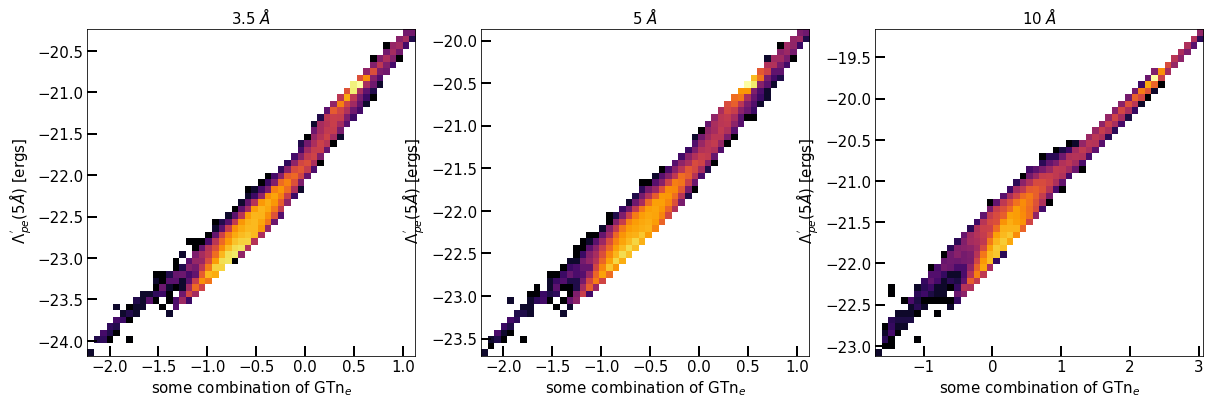

In [234]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(131)

GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(0.5)*(GTn3)**(0.2)

ax.hist2d(np.log10(BTfit3),np.log10(Cooling3AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("3.5 $\AA$", fontsize=15)

ax = fig.add_subplot(132)

GTn5 = (cdist5["G"]+cdist5["G_CR"])*np.sqrt(cdist5["temp"])/cdist5["new_ne"]
BTfit5 = cdist5["new_ne"]*cdist5["temp"]**(0.5)*(GTn5)**(0.2)

ax.hist2d(np.log10(BTfit5),np.log10(Cooling5AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("5 $\AA$", fontsize=15)

ax = fig.add_subplot(133)

GTn10 = (cdist10["G"]+cdist10["G_CR"])*np.sqrt(cdist10["temp"])/cdist10["new_ne"]
BTfit10 = cdist10["new_ne"]*cdist10["temp"]**(0.4)*(GTn10)**(0.2)

ax.hist2d(np.log10(BTfit10), np.log10(Cooling10AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("10 $\AA$", fontsize=15)


fig.show()

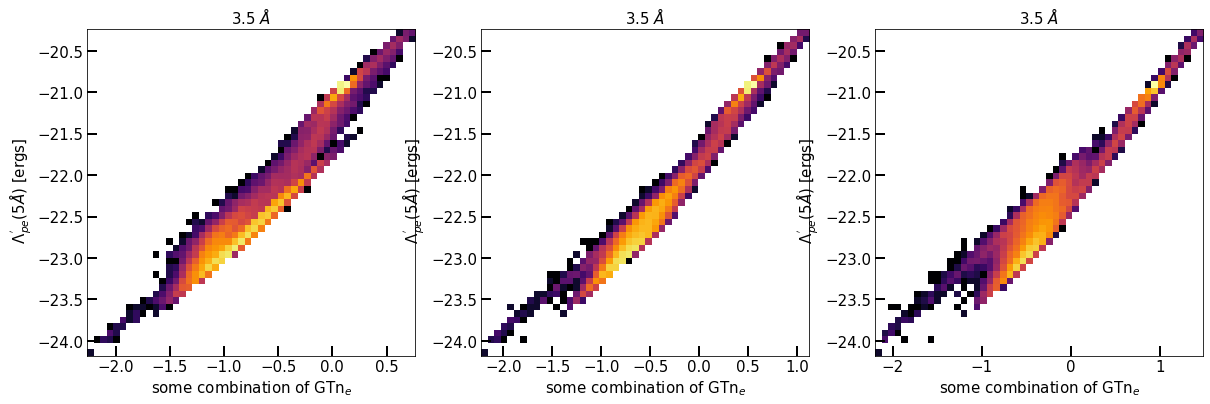

In [238]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(131)

GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(0.5)*(GTn3)**(0.2)

ax.hist2d(np.log10(BTfit3),np.log10(Cooling3AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("3.5 $\AA$", fontsize=15)


ax = fig.add_subplot(132)


GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(0.5)*(GTn3)**(0.2)

ax.hist2d(np.log10(BTfit3),np.log10(Cooling3AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("3.5 $\AA$", fontsize=15)

ax = fig.add_subplot(133)


GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(0.5)*(GTn3)**(0.2)

ax.hist2d(np.log10(BTfit3),np.log10(Cooling3AA), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("3.5 $\AA$", fontsize=15)

fig.show()

In [344]:
import MCMCFit as mcmc

In [345]:
GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(0.5)*(GTn3)**(0.2)

GTn5 = (cdist5["G"]+cdist5["G_CR"])*np.sqrt(cdist5["temp"])/cdist5["new_ne"]
BTfit5 = cdist5["new_ne"]*cdist5["temp"]**(0.5)*(GTn5)**(0.2)

GTn10 = (cdist10["G"]+cdist10["G_CR"])*np.sqrt(cdist10["temp"])/cdist10["new_ne"]
BTfit10 = cdist10["new_ne"]*cdist10["temp"]**(0.5)*(GTn10)**(0.2)

GTn50 = (cdist50["G"]+cdist50["G_CR"])*np.sqrt(cdist50["temp"])/cdist50["new_ne"]
BTfit50 = cdist50["new_ne"]*cdist50["temp"]**(0.5)*(GTn50)**(0.2)

GTn100 = (cdist100["G"]+cdist100["G_CR"])*np.sqrt(cdist100["temp"])/cdist100["new_ne"]
BTfit100 = cdist100["new_ne"]*cdist100["temp"]**(0.5)*(GTn100)**(0.2)

In [346]:
x3 = np.log10(BTfit3)
y3 = np.log10(Cooling3AA)

x5 = np.log10(BTfit5)
y5 = np.log10(Cooling5AA)

x10 = np.log10(BTfit10)
y10 = np.log10(Cooling10AA)

x50 = np.log10(BTfit50)
y50 = np.log10(Cooling50AA)

x100 = np.log10(BTfit100)
y100 = np.log10(Cooling100AA)

In [347]:
from scipy.optimize import curve_fit

In [348]:
def function(x, m, b):

    y = m*x[:] + b
    
    return y

In [349]:
popt_3AA, pcov_3AA    = curve_fit(function, x3, y3)
popt_5AA, pcov_5AA    = curve_fit(function, x5, y5)
popt_10AA, pcov_10AA  = curve_fit(function, x10, y10)
popt_50AA, pcov_50AA  = curve_fit(function, x50, y50)
popt_100AA, pcov_100AA  = curve_fit(function, x100, y100)

In [350]:
print(popt_3AA)
print(popt_5AA)
print(popt_10AA)
print(popt_50AA)
print(popt_100AA)

[  1.49671099 -21.76167167]
[  1.45071835 -21.31179113]
[  1.48828557 -20.63834211]
[  1.44962322 -19.08928128]
[  1.38714099 -18.44906603]


In [351]:
mm = [popt_3AA[0], popt_5AA[0], popt_10AA[0],  popt_50AA[0],  popt_100AA[0]]
bb = [popt_3AA[1], popt_5AA[1], popt_10AA[1], popt_50AA[1], popt_100AA[1]]
aa = [3.5, 5., 10., 50., 100.]

In [352]:
print(np.average(mm))

1.4544958228


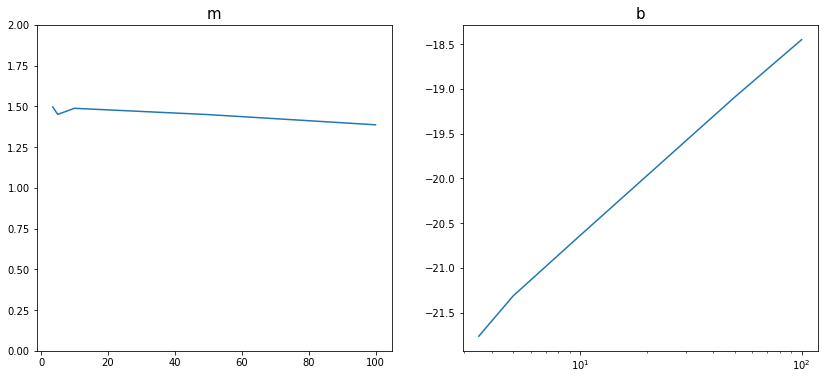

In [353]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)

ax.plot(aa, mm)
ax.set_ylim(0, 2)

ax.set_title("m", fontsize=15)

ax = fig.add_subplot(122)

ax.plot(aa, bb)
ax.set_title("b", fontsize=15)

ax.set_xscale("log")

fig.show()

In [355]:
xsize = np.log10(aa)

In [356]:
popt_all, pcov_all    = curve_fit(function, xsize, bb)

In [357]:
print(popt_all)

[  2.24973538 -22.9236196 ]


In [358]:
newb = 10**(popt_all[1])
print(newb)

1.19228588884e-23


y = mx + b

log10(Cool0) = m*(log10 (a)) + b

cool0 = a^(m)*10^(b)

In [359]:
cool5 = 5**(popt_all[0])*10**(popt_all[1])
print(cool5)

4.45531026545e-22


## Cooling:

$$ \Lambda(a) = \Lambda_{0}(a)*(BT94)^{1.17747369697}$$

where:
 
$$ \Lambda_{0}(a) = 4.455\times 10^{-22} \left( \frac{a}{5 AA} \right)^{2.25} $$
 
Where BT94 is:

$$ BT94 = n_{e}*T^{1/2}*(G_{tot}T^{1/2}n_{e}^{-1})^{0.2}$$



In [360]:
def Cooling_par(asize, Gtot, T, ne):
    """
    Parametric cooling function.
    
    returns cooling rate in:
        erg s-1
    """
    import numpy as np
    
    Lambda0 = 4.455e-22 * (asize/5.0)**(2.24973538)
    psi     = ne * np.sqrt(T) * (Gtot*np.sqrt(T)/ne)**(0.2)
    
    coolhere = Lambda0 * psi**(1.17747369697)
    
    return coolhere

In [363]:
def Cooling_par_BTin(asize, BT94):
    """
    Parametric cooling function.
    
    returns cooling rate in:
        erg s-1
    """
    import numpy as np
    
    Lambda0 = 4.4552e-22 * (asize/5.0)**(2.24973538)
    
    #BT94 = ne * np.sqrt(T) * (Gtot*np.sqrt(T)/ne)**(0.2)
    
    coolhere = Lambda0 * BT94**(1.17747369697)
    
    return coolhere

In [364]:
Gtot3 = cdist3["G"] + cdist3["G_CR"]
temp3 = cdist3["temp"]
ne3   = cdist3["new_ne"]

GTn3 = (cdist3["G"]+cdist3["G_CR"])*np.sqrt(cdist3["temp"])/cdist3["new_ne"]
BTfit3 = cdist3["new_ne"]*cdist3["temp"]**(0.5)*(GTn3)**(0.2)


parCool3 = Cooling_par(3.5, Gtot3, temp3, ne3)
parCoolBT = Cooling_par_BTin(3.5,  BTfit3)

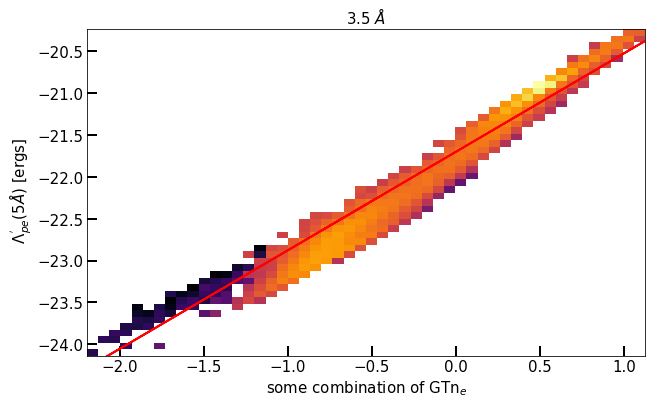

In [365]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


ax.hist2d(np.log10(BTfit3),np.log10(Cooling3AA), bins=50, norm=LogNorm(), cmap="inferno", normed=True, weights=GTn3)
ax.plot(np.log10(BTfit3), np.log10(parCoolBT), "-r", linewidth=2)

#ax.hist2d((BTfit3),np.log10(Cooling3AA), bins=50, norm=LogNorm(), cmap="inferno", normed=True, weights=GTn3)
#ax.scatter(BTfit3, np.log10(parCoolBT))


ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(5 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("3.5 $\AA$", fontsize=15)

fig.show()

In [366]:
Gtot10 = cdist10["G"] + cdist10["G_CR"]
temp10 = cdist10["temp"]
ne10   = cdist10["new_ne"]

GTn10 = (Gtot10)*np.sqrt(temp10)/ne10
BTfit10 = ne10*temp10**(0.5)*(GTn10)**(0.2)


parCool10 = Cooling_par(10,  Gtot10, temp10, ne10)
parCoolBT10 = Cooling_par_BTin(10,  BTfit10)

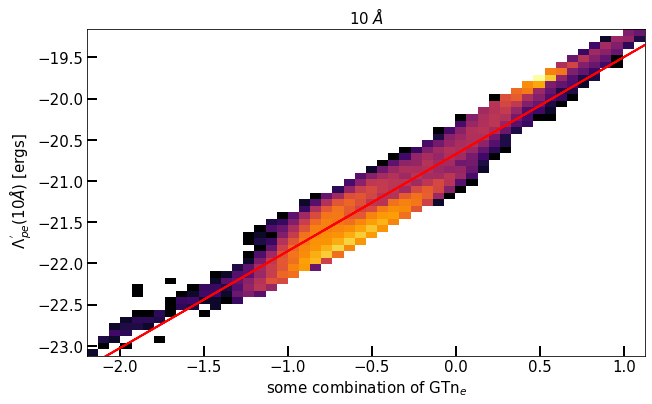

In [368]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


ax.hist2d(np.log10(BTfit10),np.log10(Cooling10AA), bins=50, norm=LogNorm(), cmap="inferno", normed=True)
ax.plot(np.log10(BTfit10), np.log10(parCoolBT10), "-r", linewidth=2)

#ax.hist2d((BTfit10),np.log10(Cooling10AA), bins=50, norm=LogNorm(), cmap="inferno", normed=True, weights=GTn10)
#ax.scatter(BTfit10, np.log10(parCoolBT10))


ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(10 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("10 $\AA$", fontsize=15)

fig.show()

In [372]:
Gtot100 = cdist100["G"] + cdist100["G_CR"]
temp100 = cdist100["temp"]
ne100   = cdist100["new_ne"]

GTn100 = (Gtot100)*np.sqrt(temp100)/ne100
BTfit100 = ne100*temp100**(0.5)*(GTn100)**(0.5)


#parCool100 = Cooling_par(100,  Gtot100, temp100, ne100)
#parCoolBT100 = Cooling_par_BTin(100,  BTfit100)

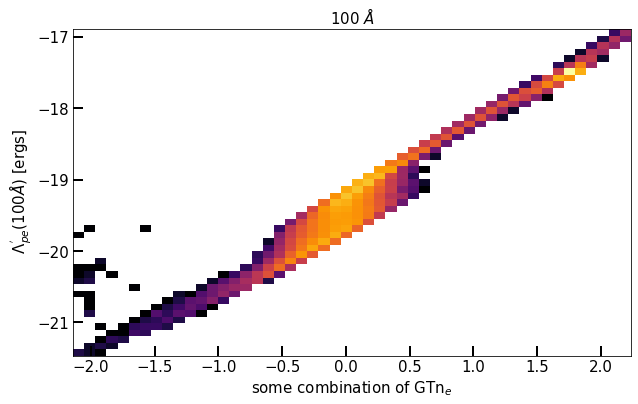

In [373]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


ax.hist2d(np.log10(BTfit100),np.log10(Cooling100AA), bins=50, norm=LogNorm(), cmap="inferno", normed=True)
#ax.plot(np.log10(BTfit100), np.log10(parCoolBT100), "-r", linewidth=2)

#ax.hist2d((BTfit10),np.log10(Cooling10AA), bins=50, norm=LogNorm(), cmap="inferno", normed=True, weights=GTn10)
#ax.scatter(BTfit10, np.log10(parCoolBT10))


ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(100 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("100 $\AA$", fontsize=15)

fig.show()

---

I need to check if this is still valid for carbonaceous grains. I think it should, they use the same equations and there was no distinction between grains in Draine & Sutin 1987.

In [283]:
Gtot = Gtot10
ne = ne10
T = temp10

In [301]:
bestfit = True

# Initial guess
alpha = 0.2
beta = 0.8
gamma = 0.7

GTn_comb = Gtot**(alpha)*ne**(beta)*T**(gamma)

logarr = np.logspace(np.log10(np.min(GTn_comb)), np.log10(np.max(GTn_comb)), num=10)

mean = np.zeros_like(logarr, dtype=np.float)
std  = np.zeros_like(logarr, dtype=np.float)

for i in range(len(logarr)-1):
#for i in range(2):
    mask = np.where((GTn_comb >= logarr[i]) & (GTn_comb < logarr[i+1]))
    GTnhere = GTn_comb[mask]
    #print(logarr[i], logarr[i+1])
    #print(len(GTnhere), np.min(GTnhere), np.max(GTnhere))
    mean[i] = np.average(GTnhere)
    std[i] = np.std(GTnhere)
    
mean[-1] = mean[-2]
std[-1] = std[-2]

if bestfit:
    alphabest = alpha
    betabest=beta
    gammabest=gamma
    bestfit = False

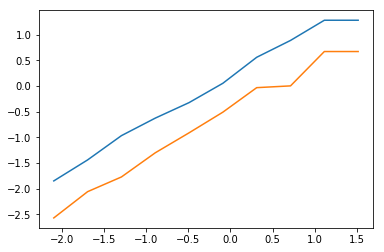

In [303]:
plt.plot(np.log10(logarr), np.log10(mean))
plt.plot(np.log10(logarr), np.log10(std))

In [323]:
bestfit = True

# Initial guess
alpha = 1.0974368543429029 # 0.2
beta = 0.8
gamma = 0.7

counter = 0

while counter < 500:

    GTn_comb = Gtot**(alpha)*ne**(beta)*T**(gamma)

    logarr = np.logspace(np.log10(np.min(GTn_comb)), np.log10(np.max(GTn_comb)), num=10)

    mean = np.zeros_like(logarr, dtype=np.float)
    std  = np.zeros_like(logarr, dtype=np.float)

    for i in range(len(logarr)-1):
        mask = np.where((GTn_comb >= logarr[i]) & (GTn_comb < logarr[i+1]))
        GTnhere = GTn_comb[mask]
        mean[i] = np.average(GTnhere)
        std[i] = np.std(GTnhere)

    mean[-1] = mean[-2]
    std[-1] = std[-2]

    if bestfit == False:
        if np.average(std) < np.average(beststd):
            bestfit = True
            print("Found a better combination of parameters that minimizes the scatter:")
            print("alpha=", alpha, "beta=", beta, "gamma=", gamma)
        
    if bestfit:
        alphabest = alpha
        betabest=beta
        gammabest=gamma
        
        bestmean= mean
        beststd = std
        
        bestfit = False
        
    # SHould test both positie and negative!!
    #alpha = alpha - 0.1*np.random.rand(1)[0]
    #beta = beta + 0.1*np.random.rand(1)[0]
    gamma = gamma - 0.1*np.random.rand(1)[0]
    
    counter+=1

Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', 0.62416343608646629)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', 0.57245806026300239)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', 0.53867904414706935)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', 0.50958779878245919)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', 0.47992766012966454)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', 0.47919183014525135)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', 0.40376016820

Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -2.8765143167034095)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -2.952885356280329)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -3.0130422624362008)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -3.0282656944439252)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -3.1268817711634345)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -3.1871390326971092)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -3.24606686833

Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -6.1794483073136908)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -6.2757861534488839)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -6.361154087747674)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -6.3823164033303055)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -6.4518307704809059)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -6.5179618883574983)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -6.56330150463

Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -9.2509220531381775)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -9.2848079342667784)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -9.3549585202410093)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -9.3926607381106422)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -9.444030526082237)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -9.5182797229437401)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -9.55093718719

Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -13.015601282921153)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -13.081165086363118)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -13.106287149792566)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -13.149320527784345)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -13.169929997827611)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -13.206074122650787)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -13.277276266

Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -16.667309712281057)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -16.761662541139998)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -16.784318236773672)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -16.858848666895202)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -16.988154212298056)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -17.088057577529565)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -17.106775143

Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -20.900320013122585)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -21.054724508629302)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -21.07244269234727)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -21.143792493617081)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -21.196977129073911)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -21.218285371702049)
Found a better combination of parameters that minimizes the scatter:
('alpha=', 1.097436854342903, 'beta=', 0.8, 'gamma=', -21.3070658365